In [ ]:
import os
os.chdir(r"Q:/sachuriga/Sachuriga_Python/quattrocolo-nwb4fp/src")


import pandas as pd
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap_ax,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd

animal = '63383'
day = '2024-07-28'
ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'

ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'
# df = pd.read_csv(rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults\MatchTable.csv')
df = pd.read_csv(r'/Volumes/ntnu/mh-kin/quattrocolo/crhip/Sachuriga/Ephys_Recording/CR_CA1/63383/63383_2024-07-28_unitmatchResults/MatchTable.csv')

df1 = df[df['Matches']==1]
df1 


<>:37: DeprecationWarning: invalid escape sequence '\S'
<>:39: DeprecationWarning: invalid escape sequence '\S'
<>:37: DeprecationWarning: invalid escape sequence '\S'
<>:39: DeprecationWarning: invalid escape sequence '\S'
C:\Users\sachur\AppData\Local\Temp\ipykernel_3228\2717359669.py:37: DeprecationWarning: invalid escape sequence '\S'
  ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'
C:\Users\sachur\AppData\Local\Temp\ipykernel_3228\2717359669.py:39: DeprecationWarning: invalid escape sequence '\S'
  ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'


ID1  ID2  RecSes 1  RecSes 2  Matches  UM Probabilities  TotalScore  \
0        0    0         1         1        1          0.994747    0.836907   
38       0    0         2         1        1          0.848342    0.740254   
181     10    1         2         1        1          0.897339    0.765403   
268      2    2         1         1        1          0.942101    0.794239   
277     11    2         1         1        1          0.973451    0.797654   
278     12    2         1         1        1          0.994721    0.817023   
315     11    2         2         1        1          0.985266    0.840752   
317     13    2         2         1        1          0.994234    0.857770   
354      8    2         3         1        1          0.976527    0.822309   
402      3    3         1         1        1          0.999900    0.918021   
416     17    3         1         1        1          0.902738    0.768568   
456     19    3         2         1        1          0.999910    0.923367   
501     22    3         3         1        1          0.999842    0.902099   
504     25    3         3         1        1          0.980295    0.790588   
536      4    4         1         1        1          0.950293    0.791496   
670      5    5         1         1        1          0.999734    0.924977   
671      6    5         1         1        1          0.828150    0.753526   
705      2    5         2         1        1          0.992222    0.873870   
706      3    5         2         1        1          0.518425    0.721165   
803      5    6         1         1        1          0.624602    0.742701   
938      7    7         1         1        1          0.993362    0.838392   
1072     8    8         1         1        1          0.994350    0.848208   
1106     4    8         2         1        1          0.990640    0.815544   
1108     6    8         2         1        1          0.651189    0.769434   
1149     5    8         3         1        1          0.978924    0.791562   
1206     9    9         1         1        1          0.987078    0.812093   
1241     6    9         2         1        1          0.998540    0.872663   
1340    10   10         1         1        1          0.999418    0.887764   
1465     2   11         1         1        1          0.651513    0.716235   
1474    11   11         1         1        1          0.999821    0.934680   
1475    12   11         1         1        1          0.982086    0.806665   
1512    11   11         2         1        1          0.999495    0.876871   
1514    13   11         2         1        1          0.999640    0.908702   
1551     8   11         3         1        1          0.765609    0.739860   
1598     2   12         1         1        1          0.975633    0.779833   
1607    11   12         1         1        1          0.952394    0.792492   
1608    12   12         1         1        1          0.999741    0.923356   
1645    11   12         2         1        1          0.995565    0.837869   
1647    13   12         2         1        1          0.991153    0.854608   
1684     8   12         3         1        1          0.987811    0.813157   
2010    15   15         1         1        1          0.848250    0.754368   
2050    17   15         2         1        1          0.999511    0.906266   
2086    11   15         3         1        1          0.821938    0.759667   
2144    16   16         1         1        1          0.992906    0.852915   
2186    20   16         2         1        1          0.965356    0.828454   
2194    28   16         2         1        1          0.588635    0.716890   
2236    28   16         3         1        1          0.625821    0.681120   
2264     3   17         1         1        1          0.984491    0.834024   
2278    17   17         1         1        1          0.998790    0.856112   
2318    19   17         2         1        1          0.973988    0.807972   
2363    22   17         3    

In [10]:
import pandas as pd
from io import StringIO

# 假设你的数据存储在 'data.csv' 文件中，这里我直接使用你提供的文本
# 如果是文件，可以用 pd.read_csv('data.csv') 读取
# data = """
# ID1,ID2,RecSes 1,RecSes 2,Matches,UM Probabilities,TotalScore,amp_score,spatial_decay_score,centroid_overlord_score,centroid_dist,waveform_score,trajectory_score,UID1,UID2,UID Liberal 1,UID Liberal 2,UID int 1,UM UID int 2,UID Conservative 1,UID Conservative 2
# # 你的数据在这里...
# """  # 我这里只展示了结构，实际运行时会使用完整数据

# 创建DataFrame
df = pd.read_csv(rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults\MatchTable.csv')

# 1. 筛选出 Matches == 1 的行
matches_df = df[df['Matches'] == 1]

# 2. 找出 RecSes1 != RecSes2 的对子
diff_sessions_df = matches_df[matches_df['RecSes 1'] != matches_df['RecSes 2']]

# 3. 处理重复ID的情况，只保留 UM Probabilities 最大的那对
# 创建一个标识符来表示每对的唯一性（基于RecSes和ID组合）
diff_sessions_df['pair_id'] = diff_sessions_df.apply(
    lambda row: tuple(sorted([(row['RecSes 1'], row['ID1']), (row['RecSes 2'], row['ID2'])])),
    axis=1
)

# 按 pair_id 分组，保留 UM Probabilities 最大的行
result_df = diff_sessions_df.loc[
    diff_sessions_df.groupby('pair_id')['UM Probabilities'].idxmax()
]

# 删除临时的 pair_id 列
result_df = result_df.drop(columns=['pair_id'])

# 显示结果
print(result_df[['ID1', 'ID2', 'RecSes 1', 'RecSes 2', 'UM Probabilities']])

       ID1  ID2  RecSes 1  RecSes 2  UM Probabilities
5054     0    0         1         2          0.913973
6385     1   10         1         2          0.999855
11572    1    7         1         3          0.994935
315     11    2         2         1          0.985266
317     13    2         2         1          0.994234
11706    2    8         1         3          0.996793
456     19    3         2         1          0.999910
7850     3   21         1         2          0.978897
501     22    3         3         1          0.999842
13968    3   25         1         3          0.997478
5325     5    2         1         2          0.999229
5458     5    3         1         2          0.850832
5326     6    2         1         2          0.841416
5459     6    3         1         2          0.996625
5594     8    4         1         2          0.998776
1108     6    8         2         1          0.651189
1149     5    8         3         1          0.978924
1241     6    9         2   

C:\Users\sachur\AppData\Local\Temp\ipykernel_3228\2248788900.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_sessions_df['pair_id'] = diff_sessions_df.apply(


In [11]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath1 = r"S:/Sachuriga/nwb/test4neo/63383_2024-07-28_12-22-19_A_phy_k_manual.nwb"
npdata1 = nap.load_file(filepath1)
filepath2 = r"S:/Sachuriga/nwb/test4neo/63383_2024-07-28_12-49-40_B_phy_k_manual.nwb"
npdata2 = nap.load_file(filepath2)
filepath3 = r"S:/Sachuriga/nwb/test4neo/63383_2024-07-28_13-20-57_C_phy_k_manual.nwb"
npdata3 = nap.load_file(filepath3)

In [12]:
def plot_place_cells(npdata,unit_num,ax=None):
    ## Load data
    pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])

    ## filter speed
    raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                                pos_cord[:,1], # x
                                pos_cord[:,2], # y
                                filter_speed=True, 
                                min_speed = 0.05)

    ## filter spikes with speed
    raw_pos=combined_array
    # ## filter spikes with speed
    # spk = speed_filtered_spikes(spikes_time,
    #                             pos_cord[:,0], # times
    #                             mask)
    #for i in range(40):
    spikes_time = load_units_fromNWB(npdata['units'], unit_num = unit_num)
    spk = speed_filtered_spikes(spikes_time,
                                raw_pos[:,0])
    time_stemp = pos_cord[:,0]
    plot_ratemap_ax(raw_pos[:,1], # x
                raw_pos[:,2], # y
                raw_pos[:,0], # times
                spikes_time ,
                box_size=[1.0, 1.0], 
                bin_size=0.05,
                smoothing=0.1,ax=ax)

    x_input = npdata['units']['x'][unit_num]
    y_input = npdata['units']['y'][unit_num]

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


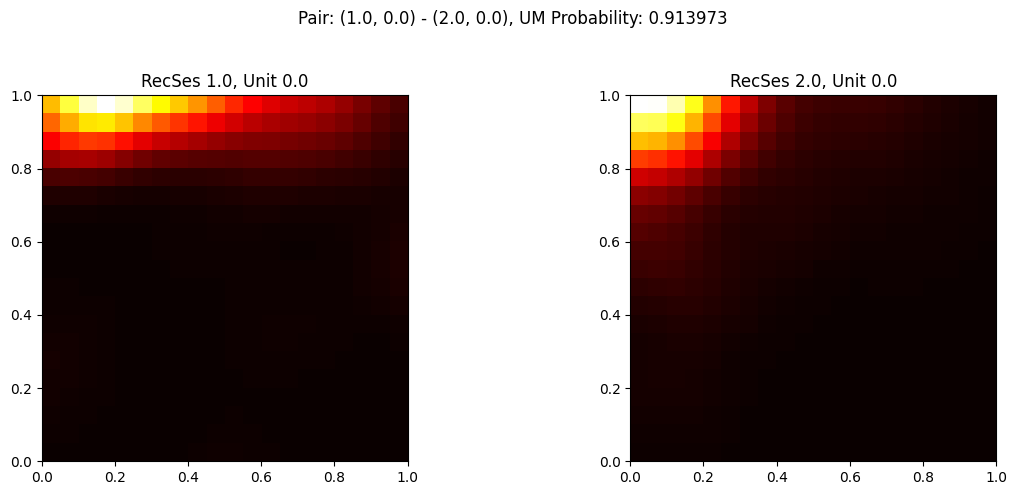

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


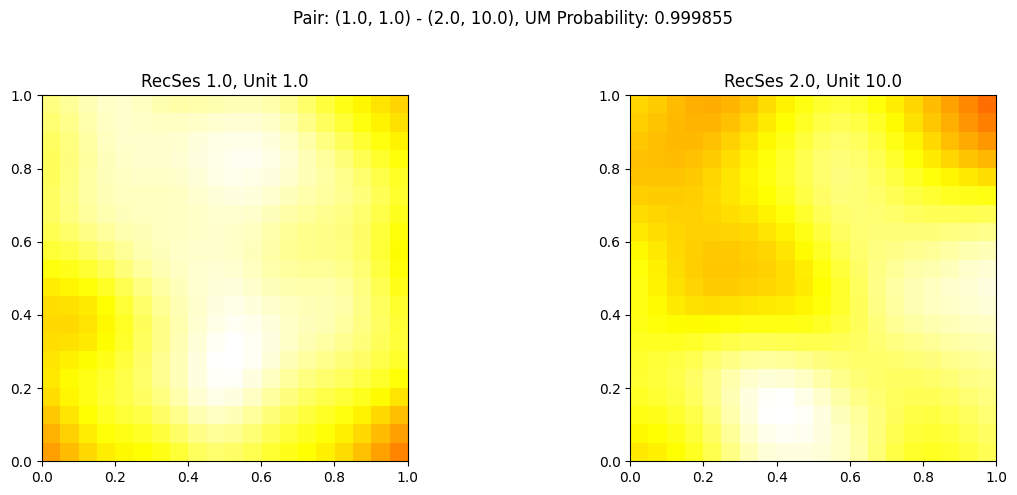

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarnin

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


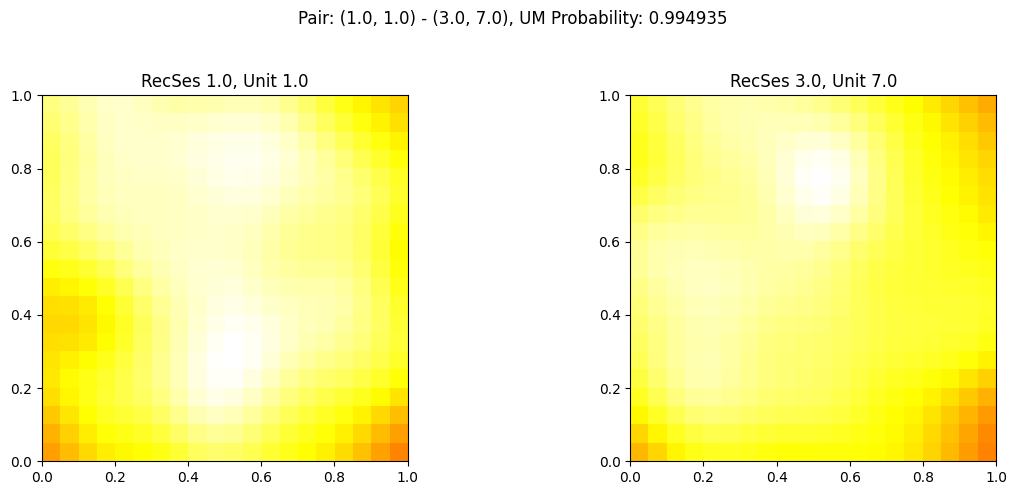

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


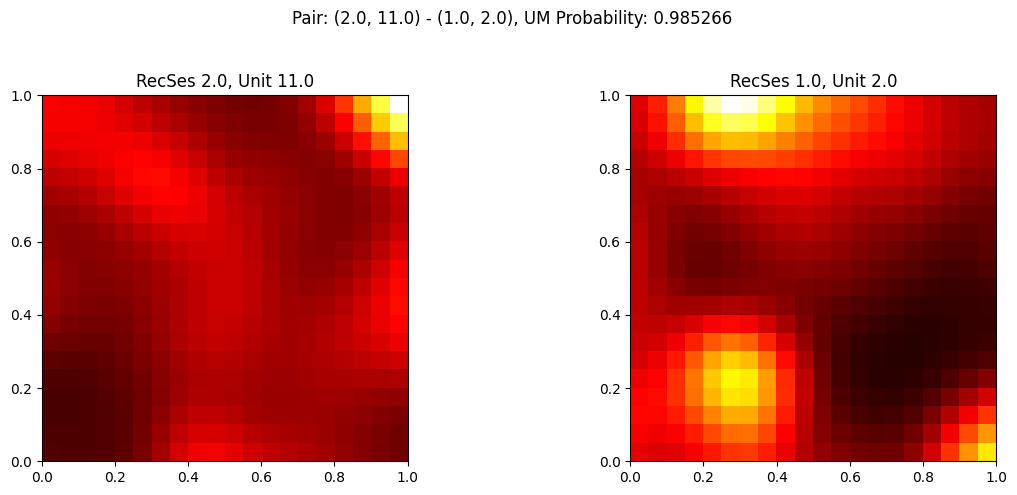

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


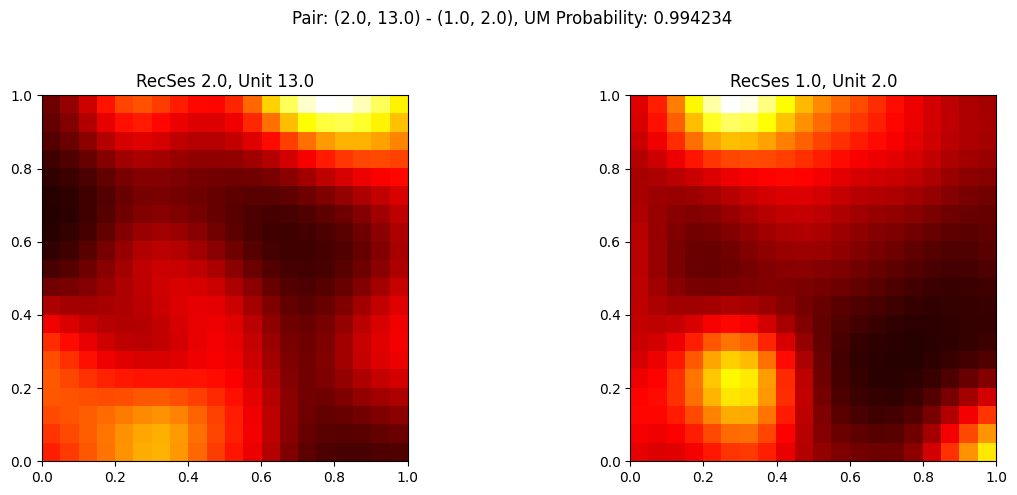

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


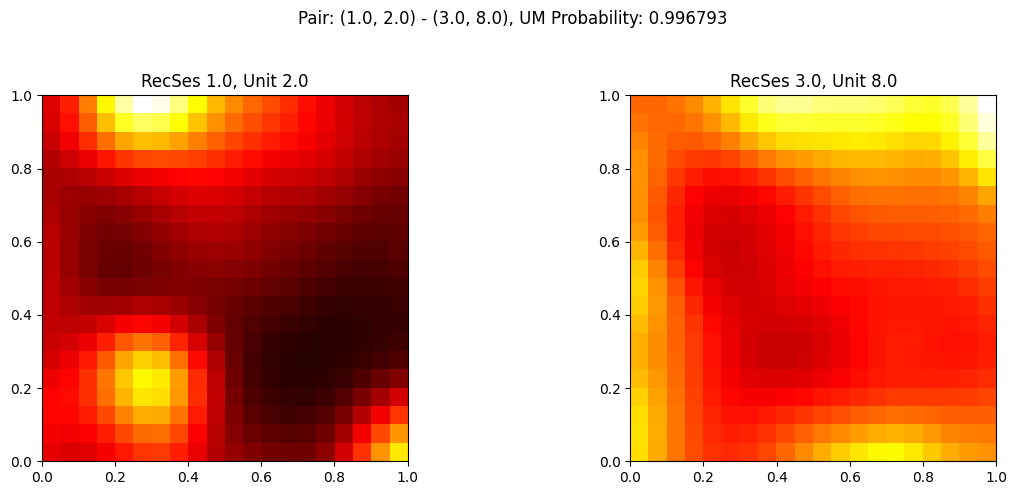

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


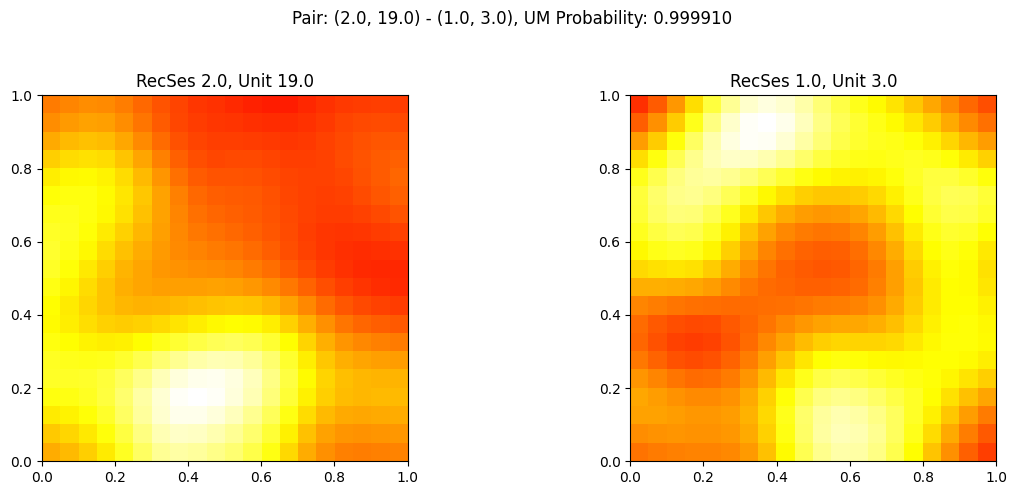

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


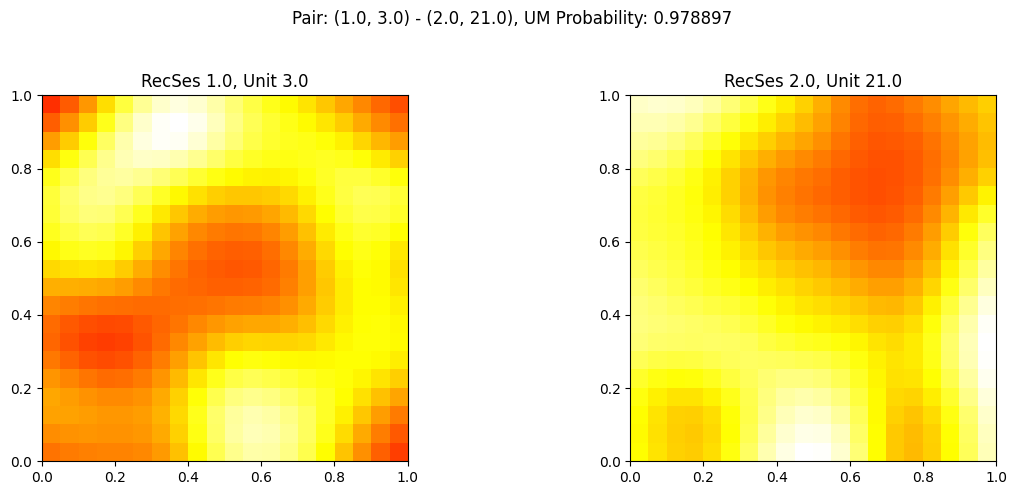

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


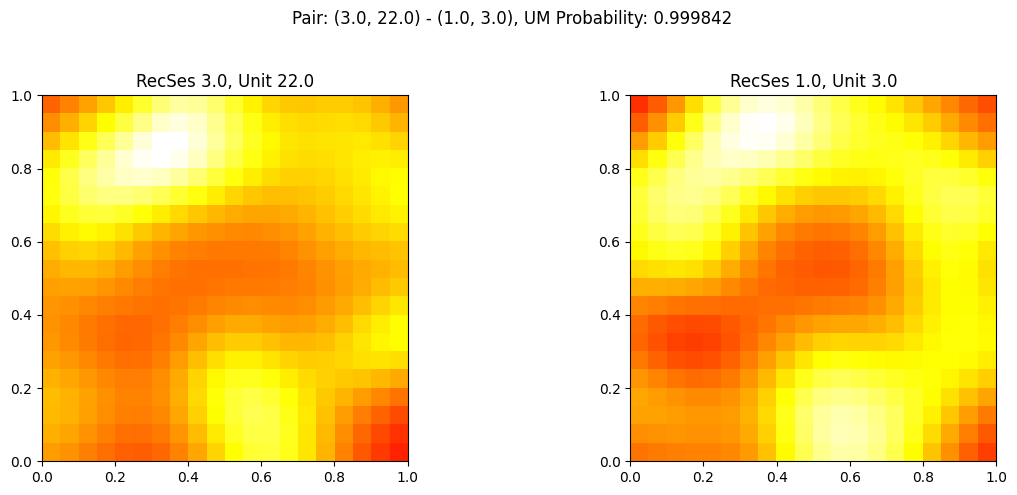

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


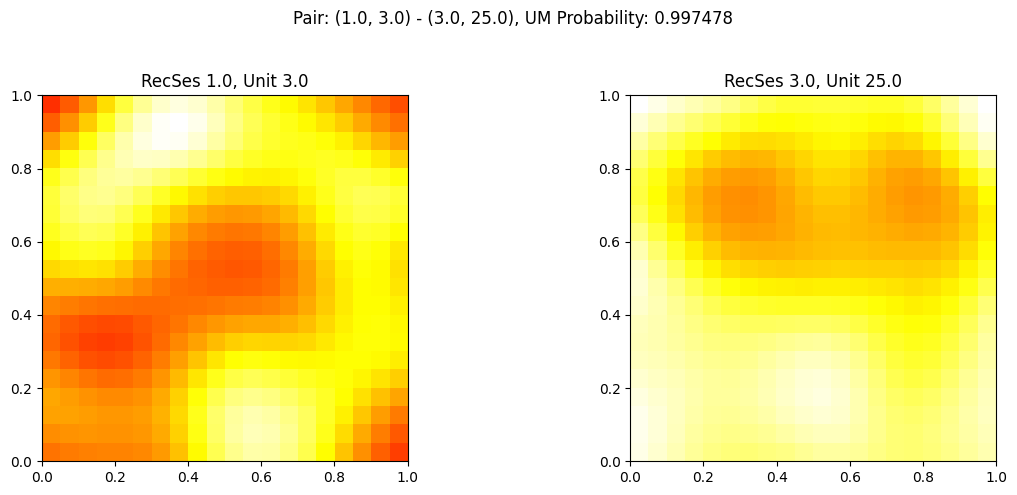

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


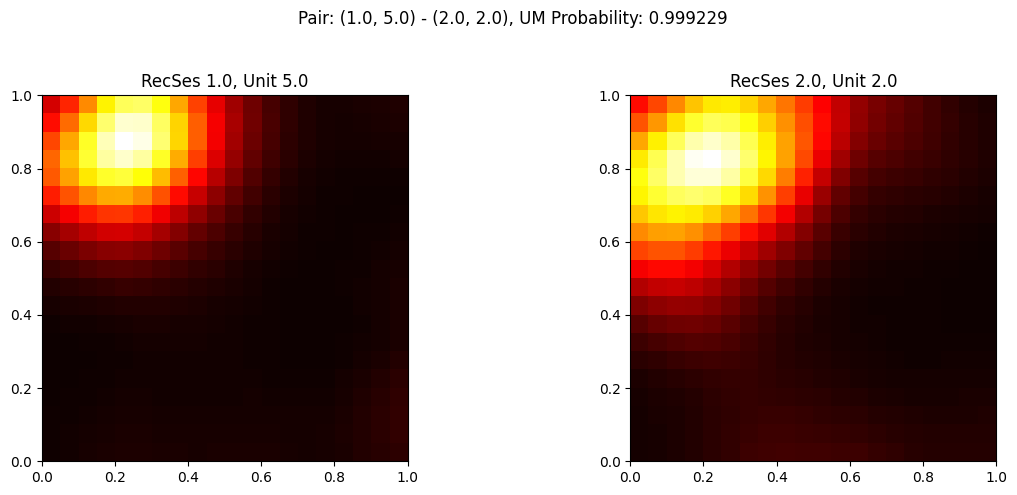

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


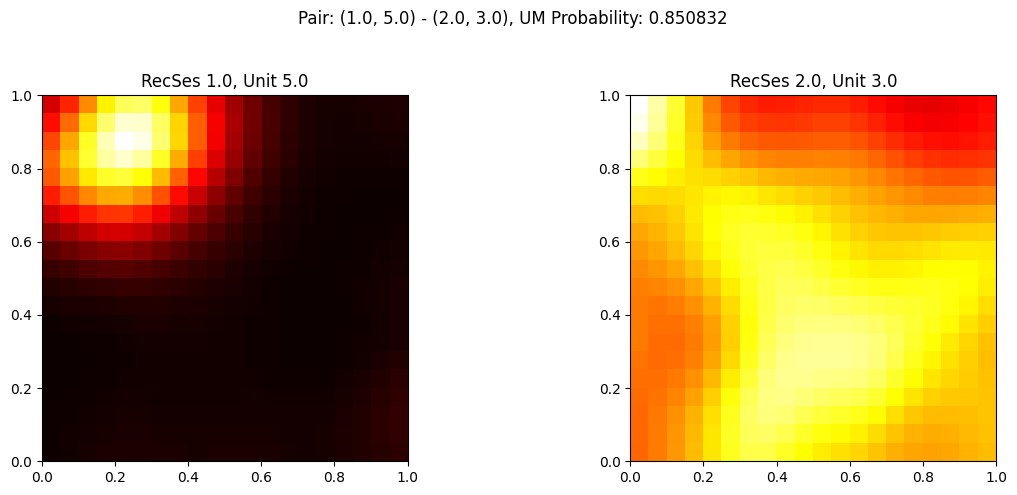

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


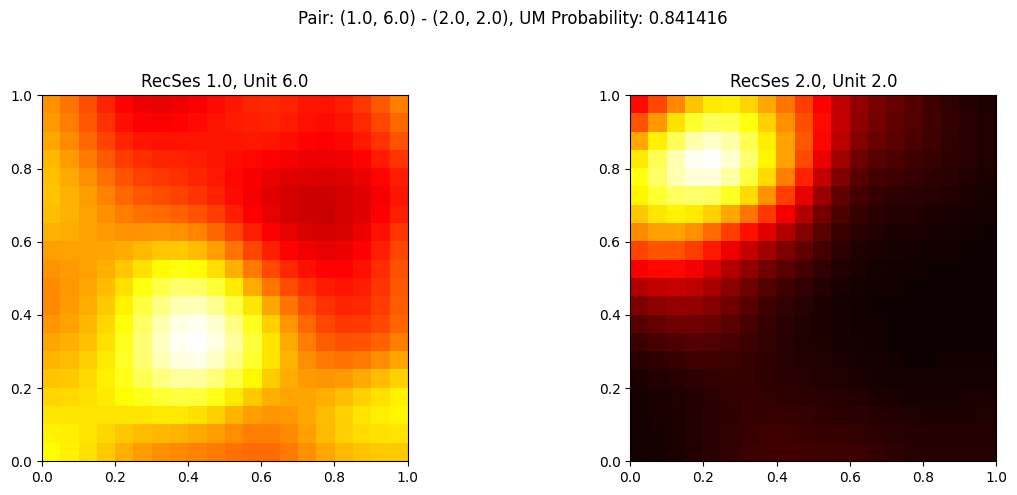

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


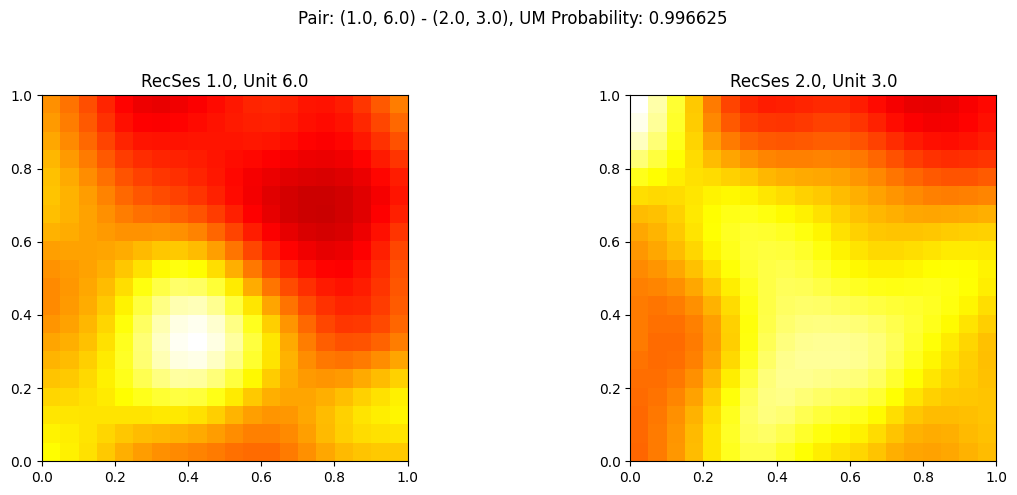

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


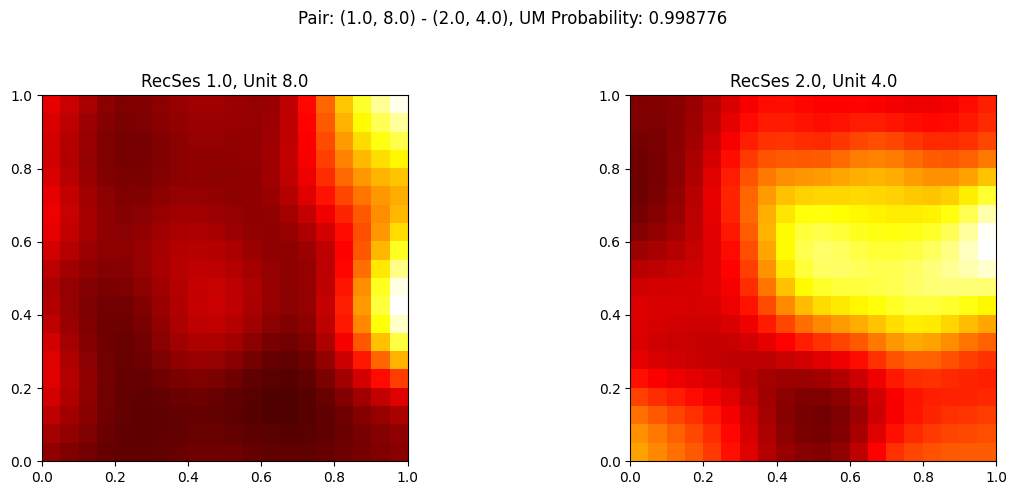

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


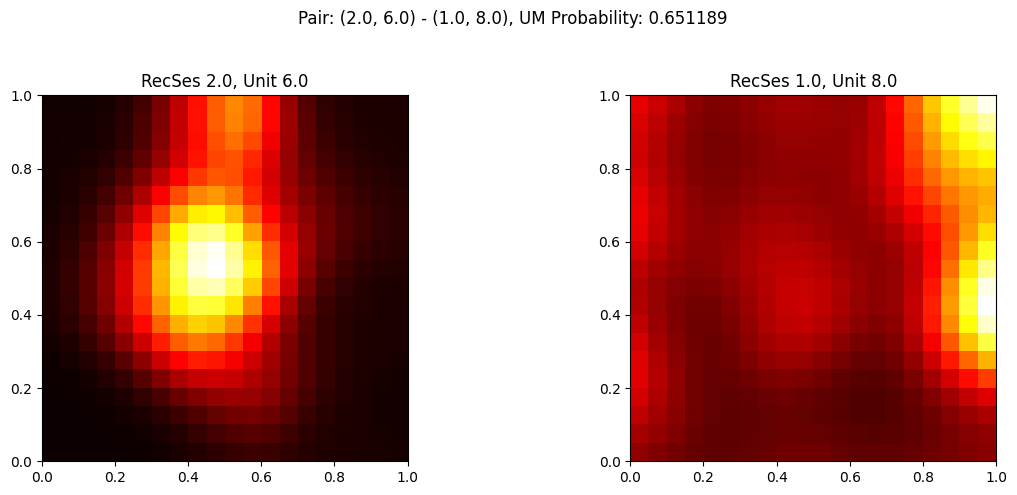

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


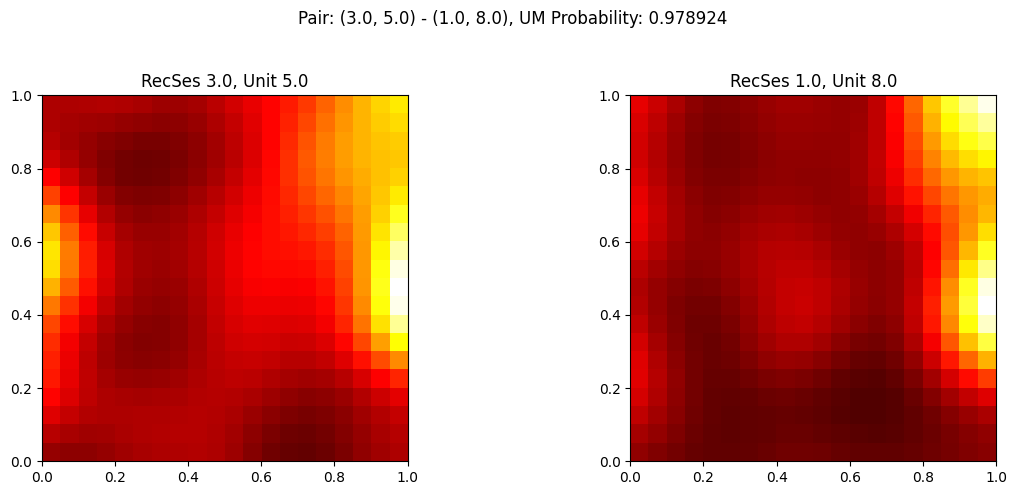

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


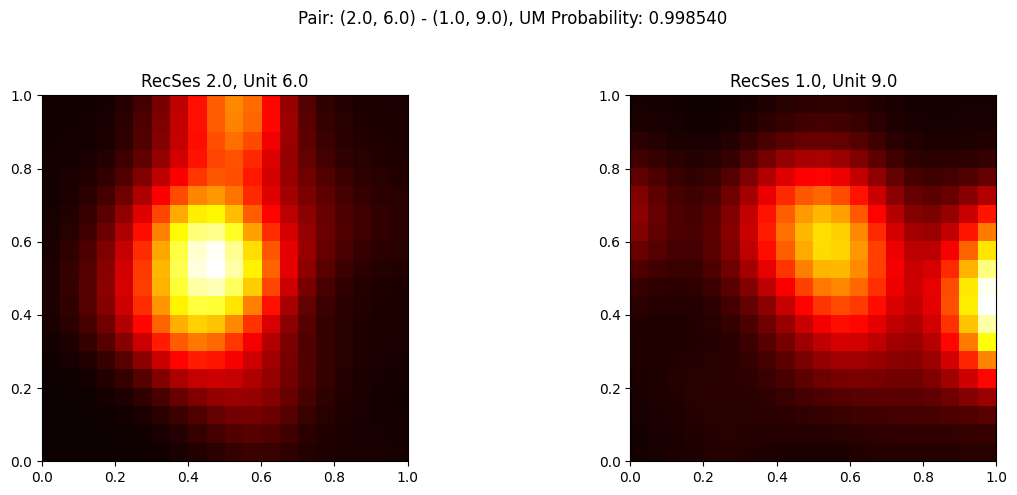

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


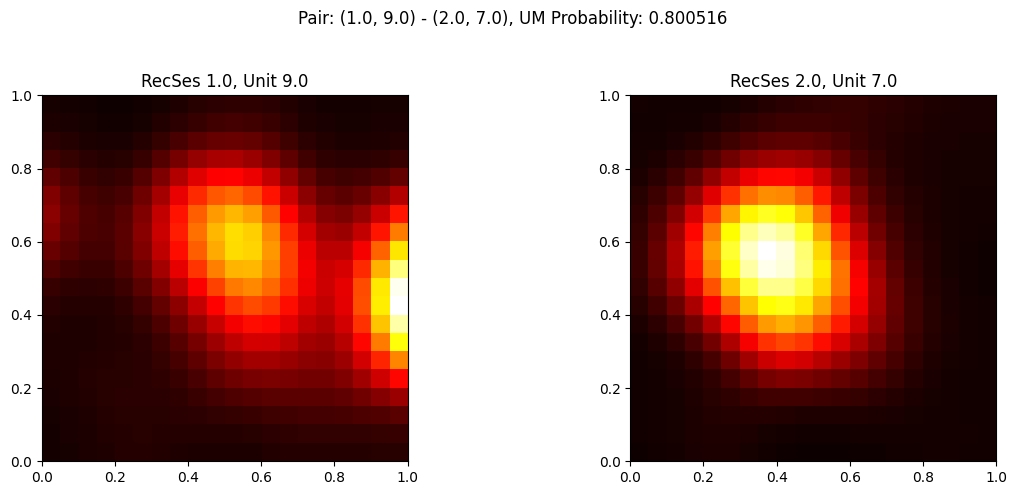

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


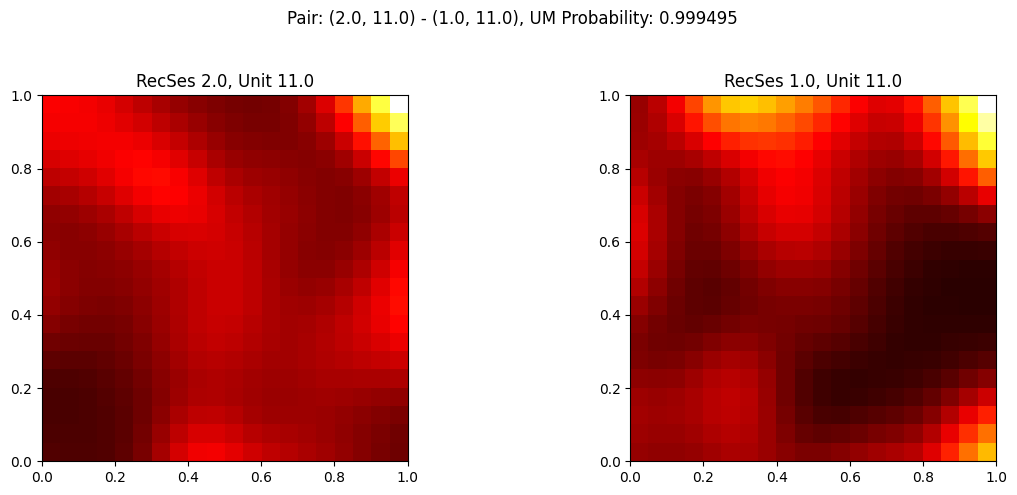

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


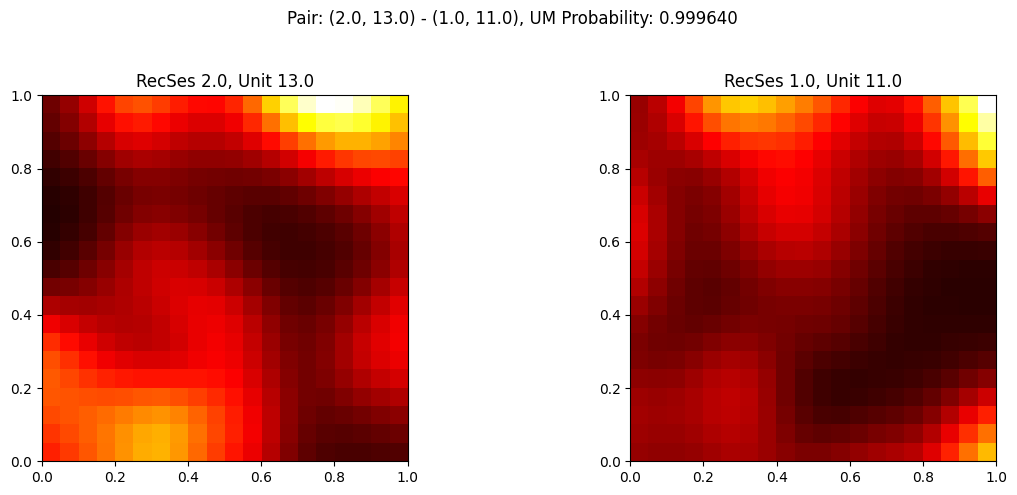

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


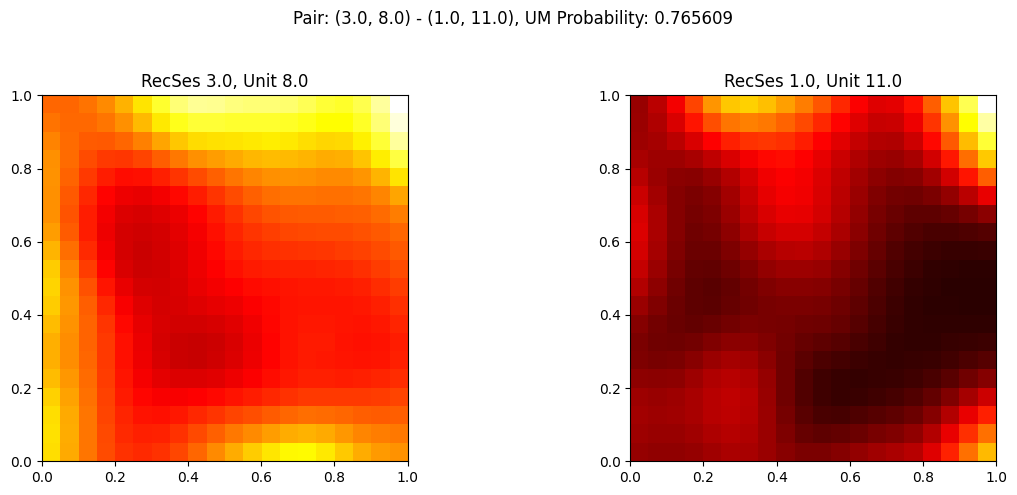

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


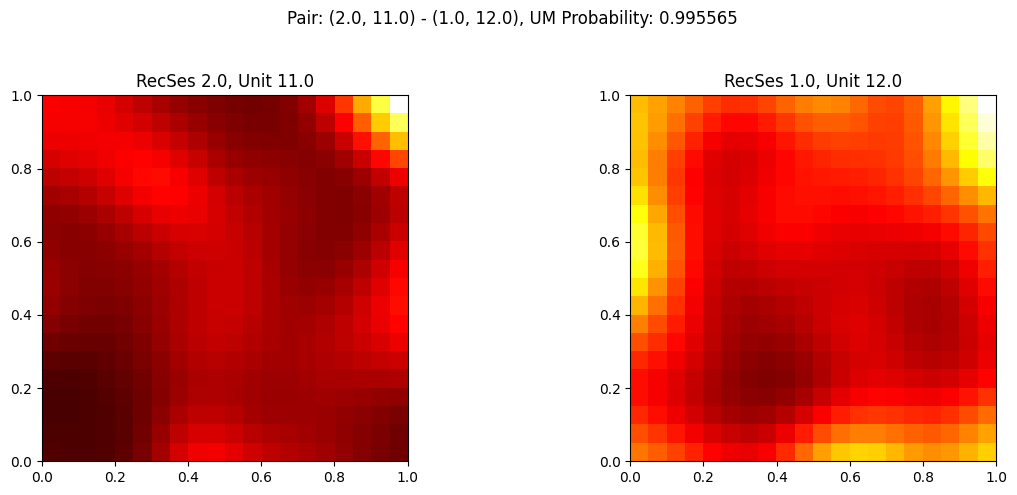

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


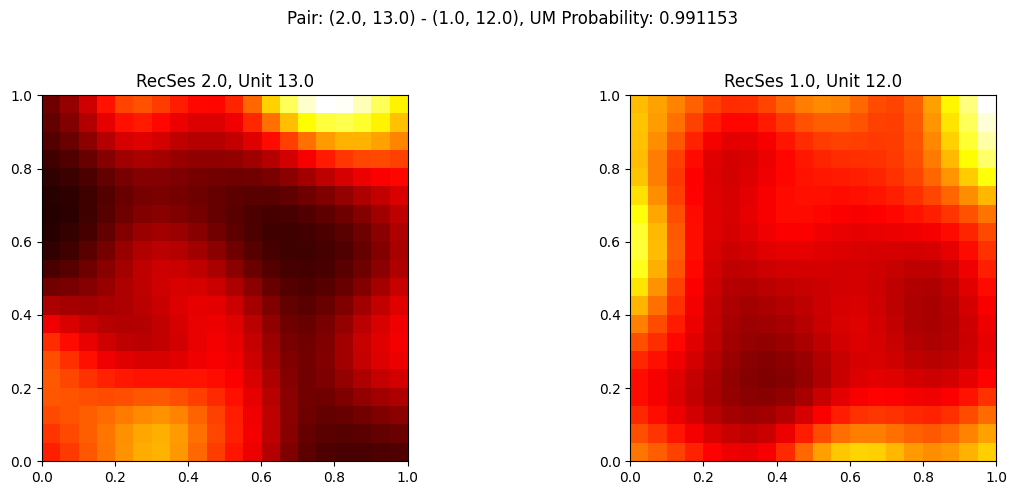

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


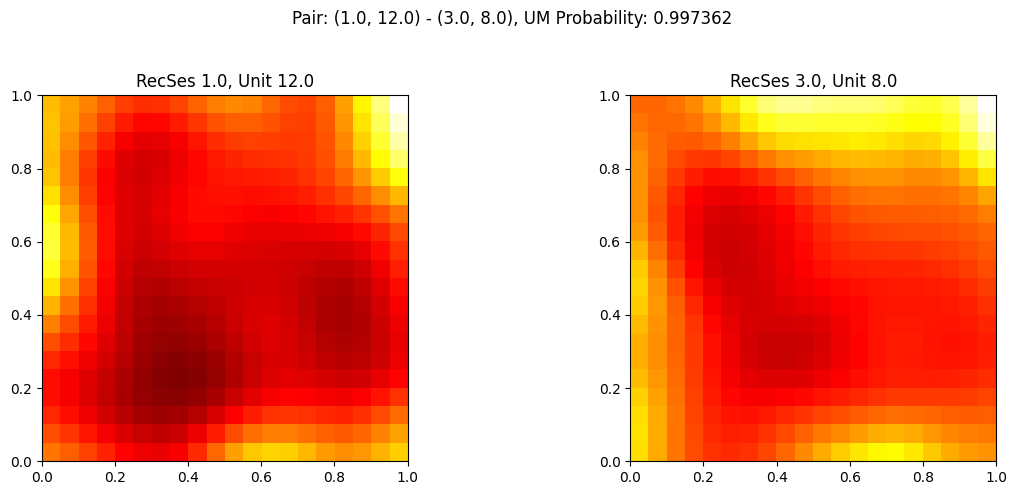

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


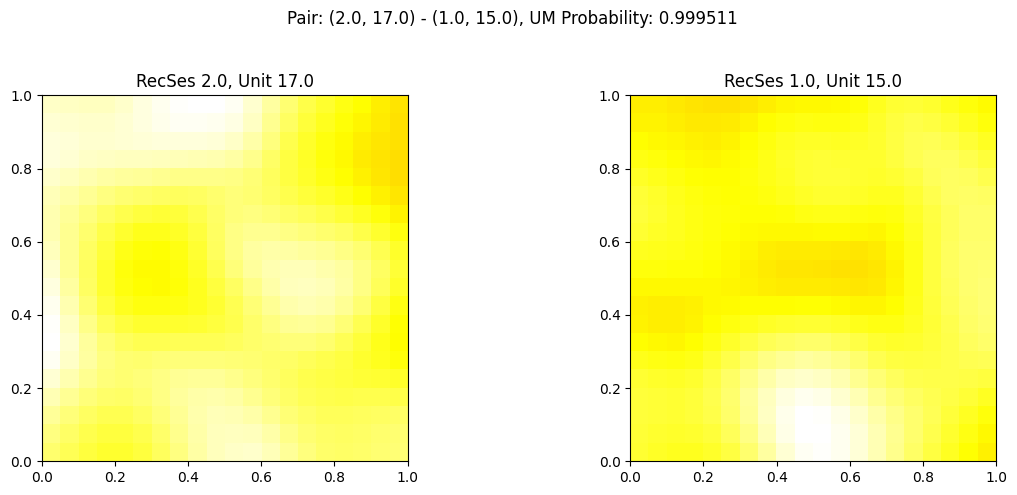

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


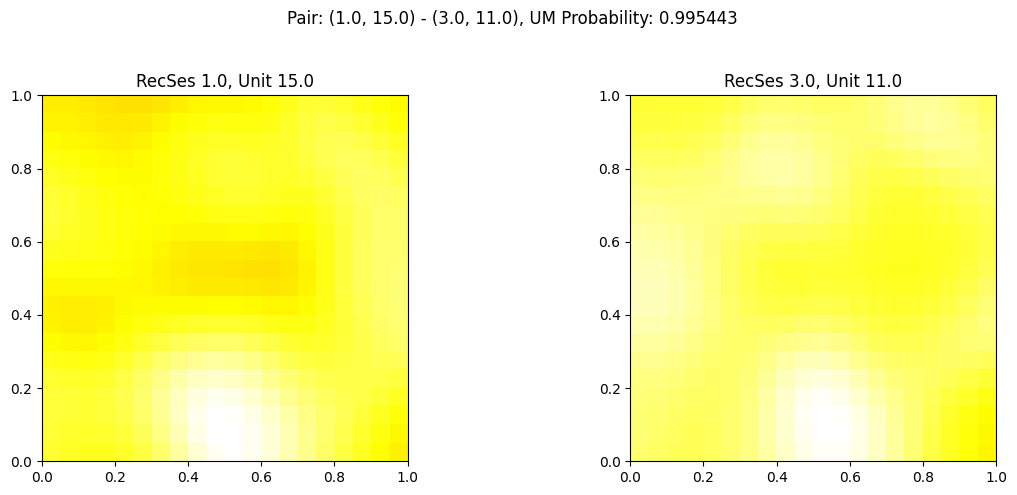

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


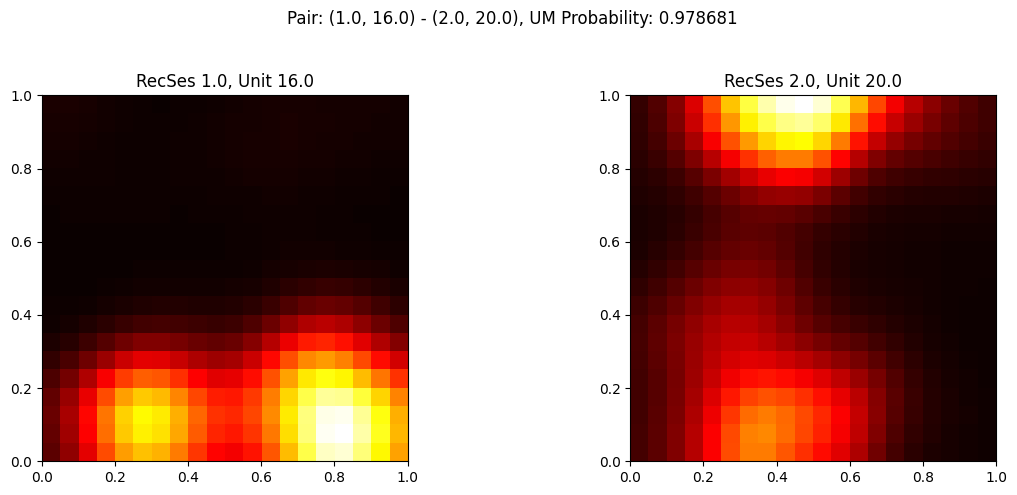

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


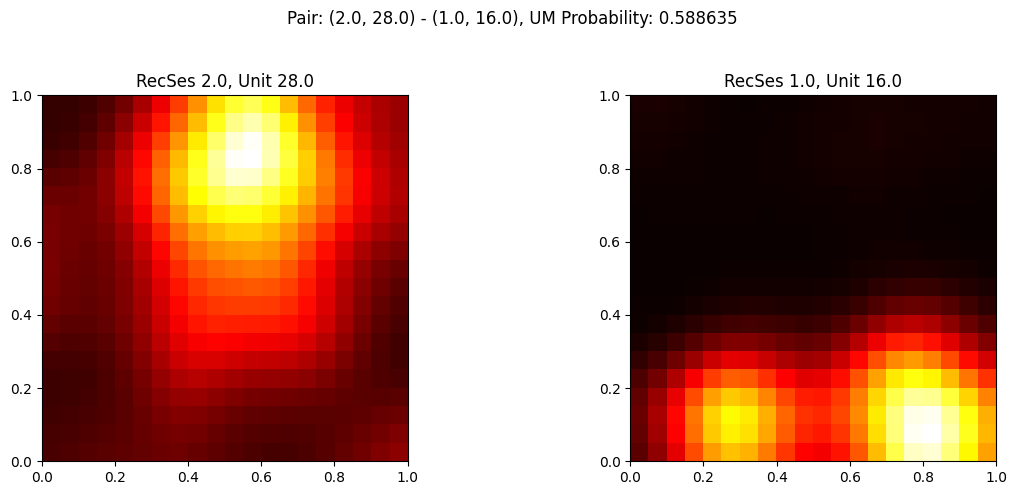

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


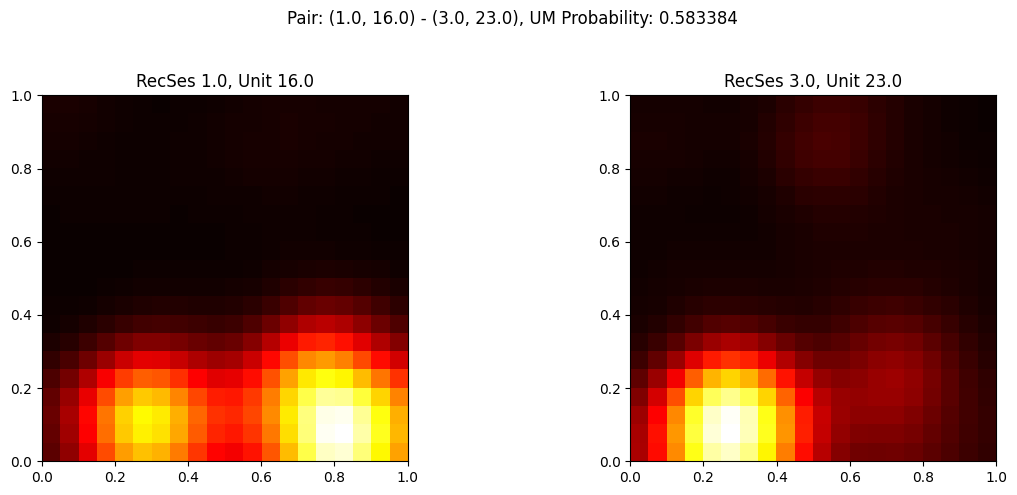

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


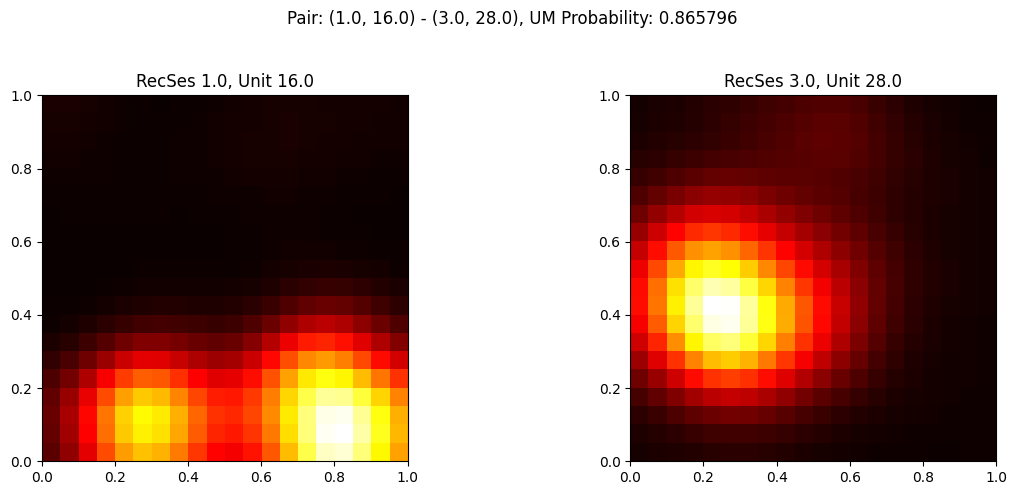

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


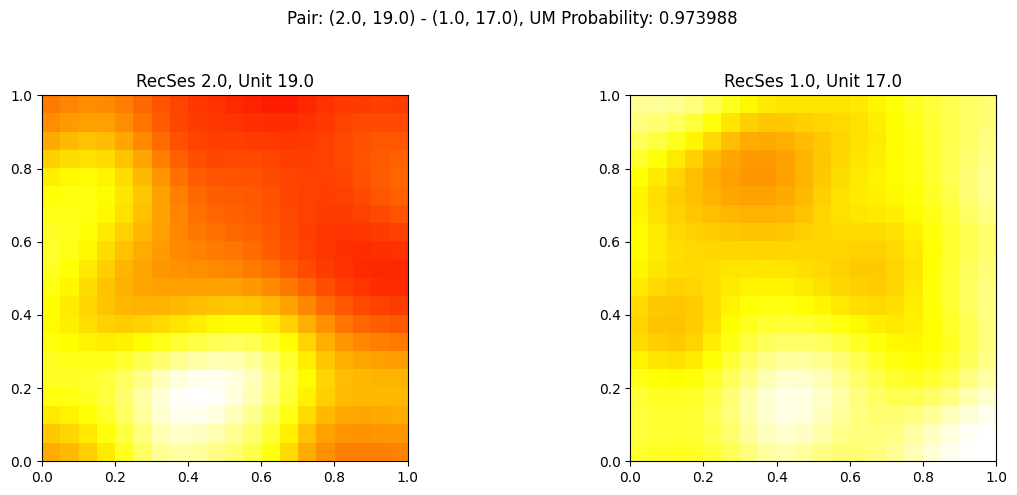

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


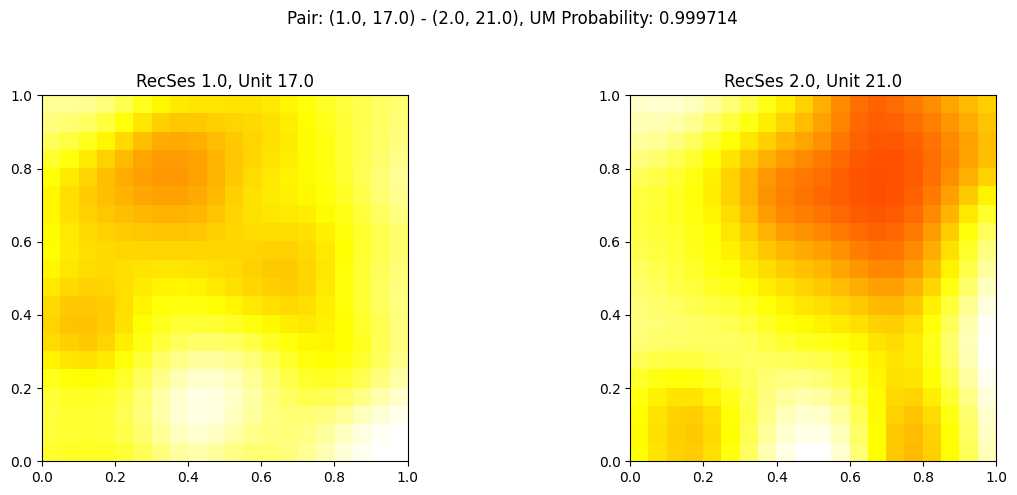

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


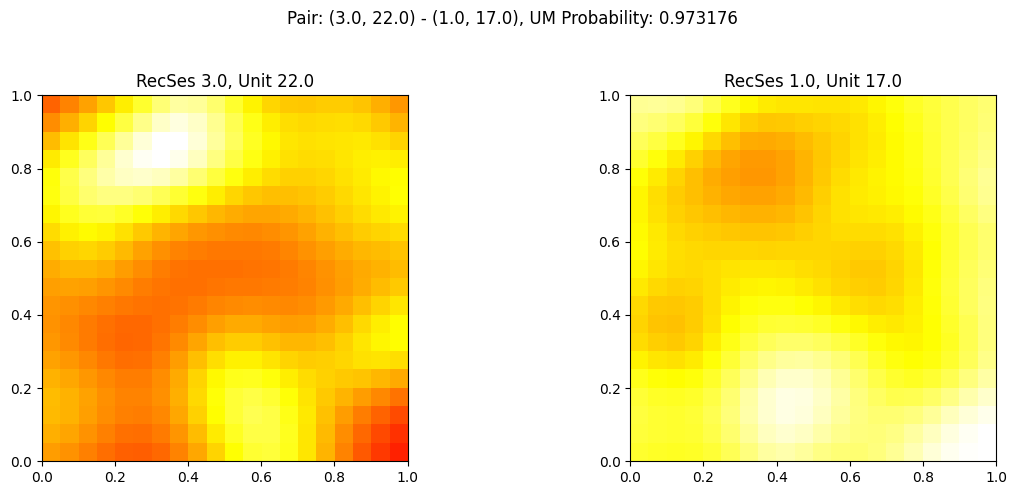

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


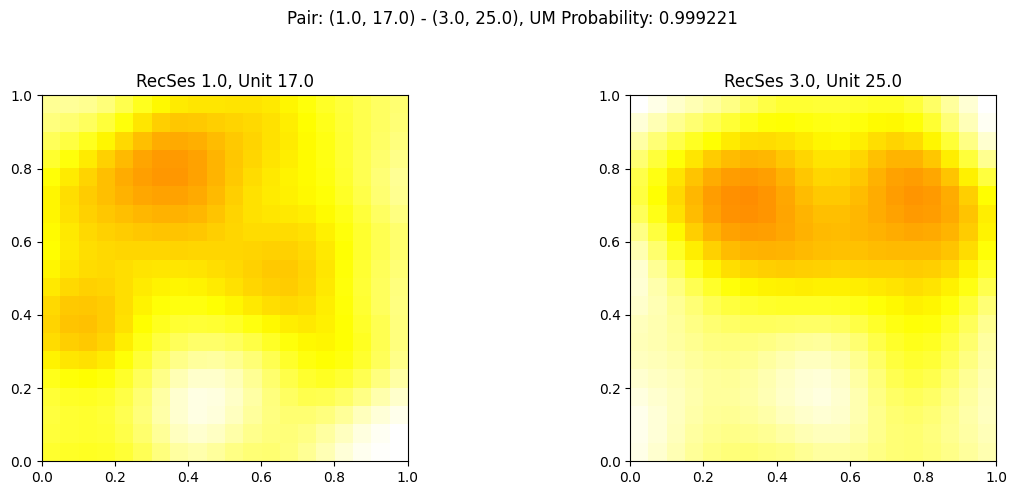

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


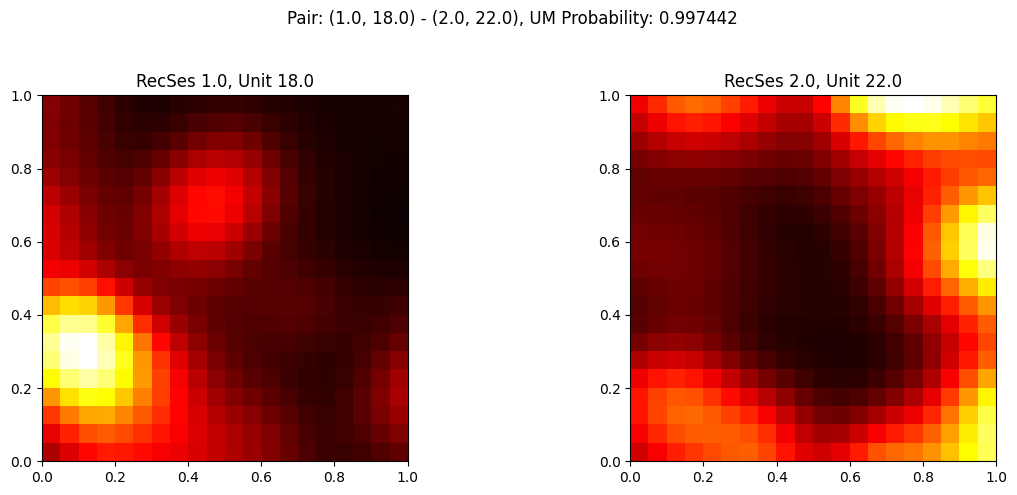

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


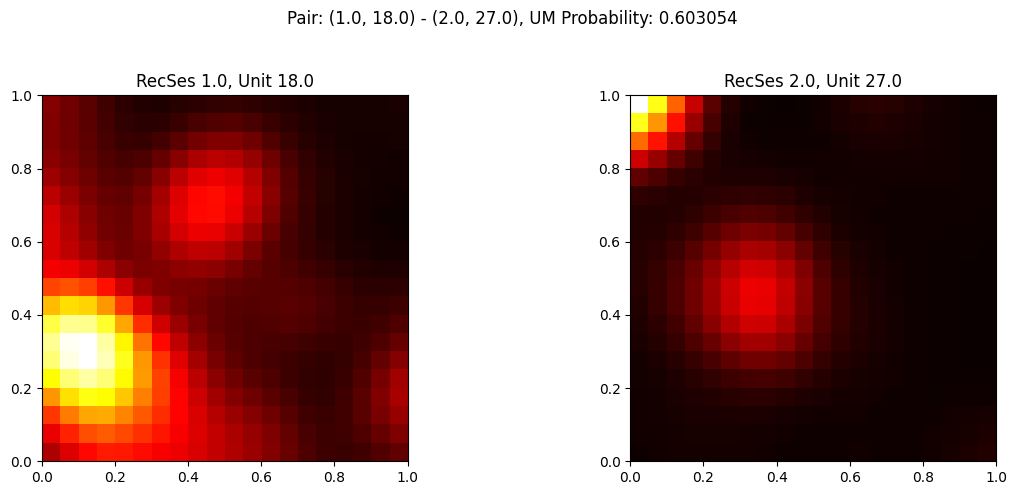

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


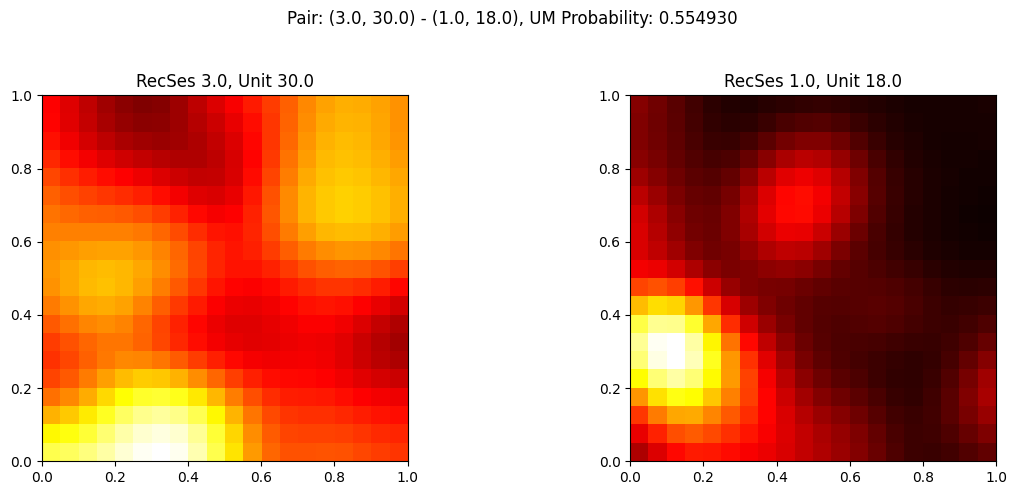

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


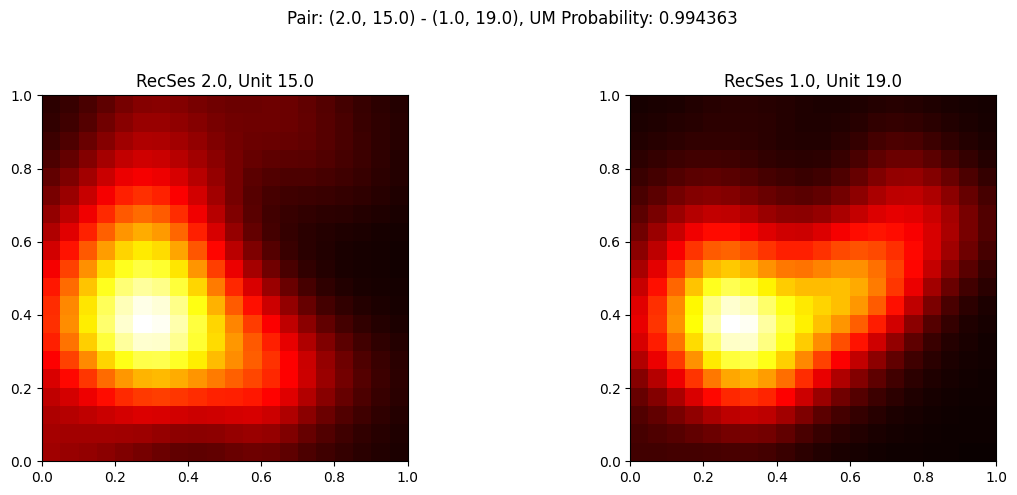

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


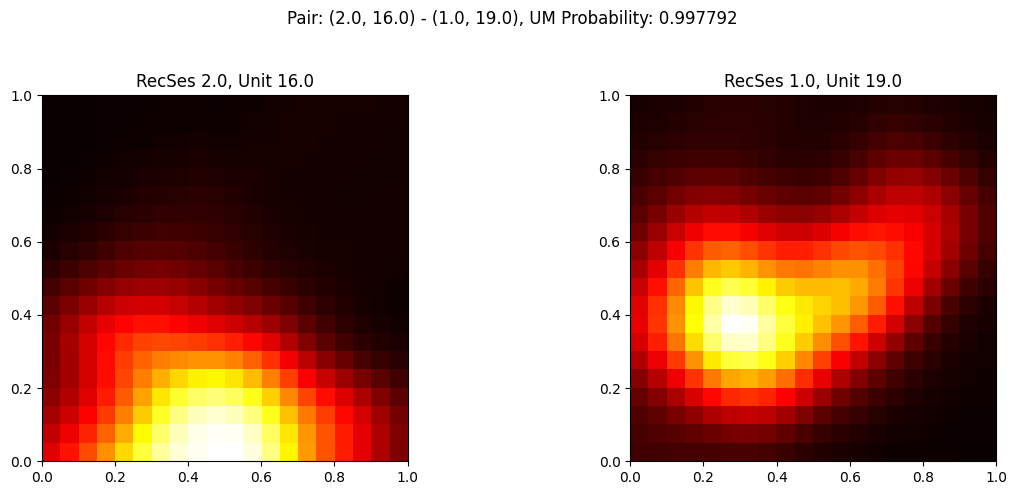

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


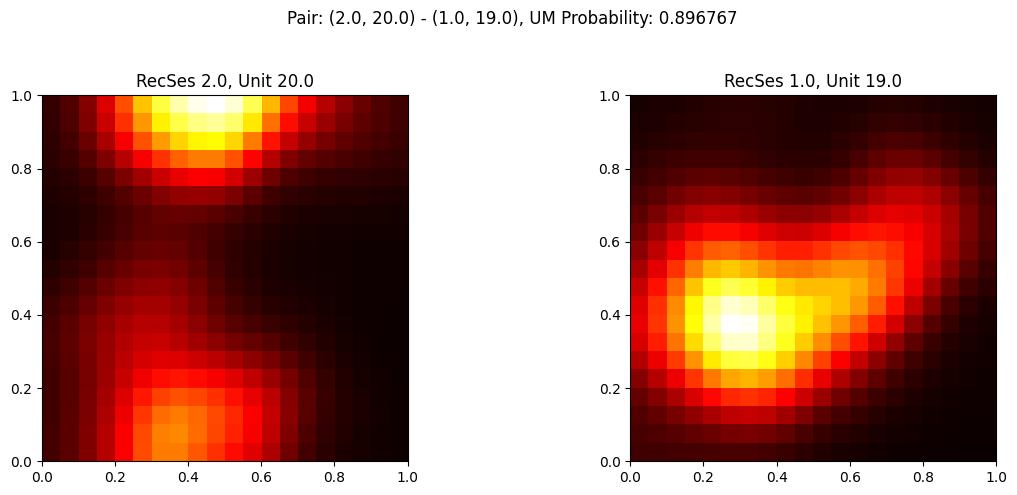

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


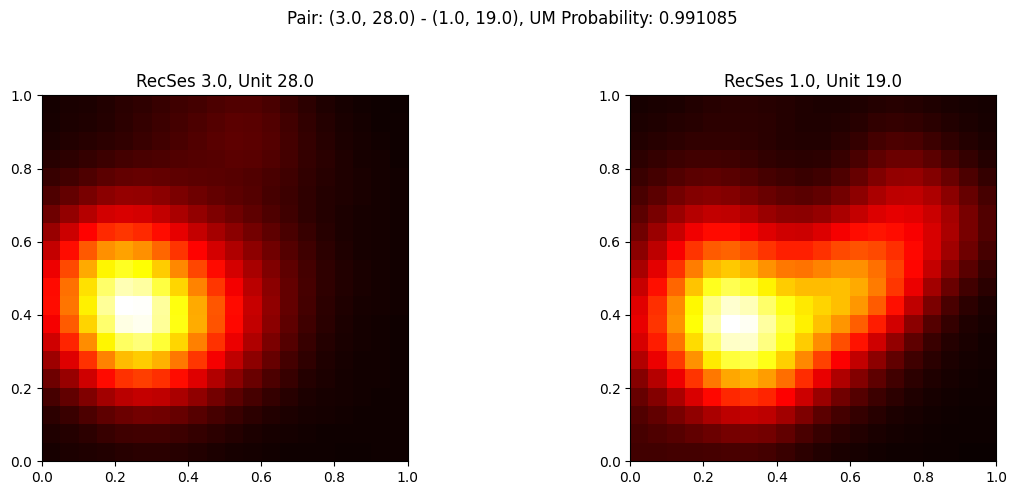

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


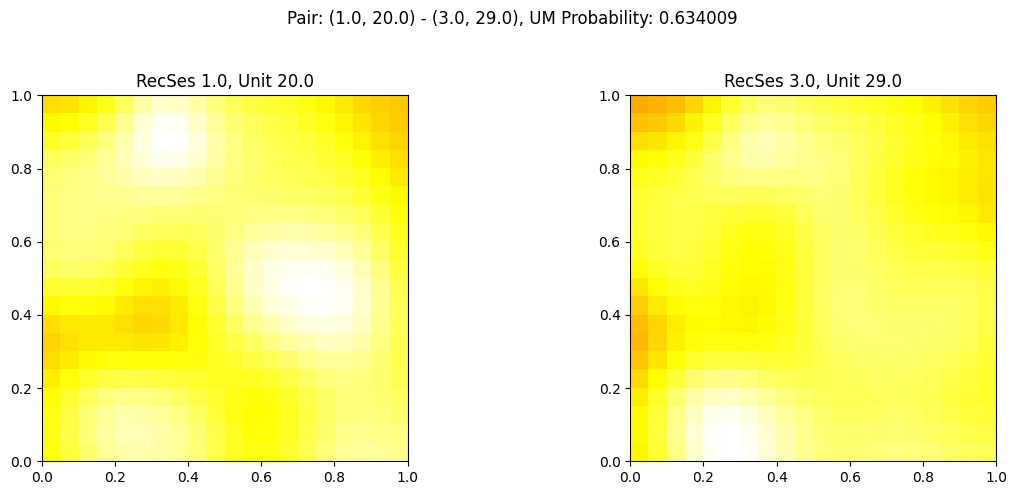

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


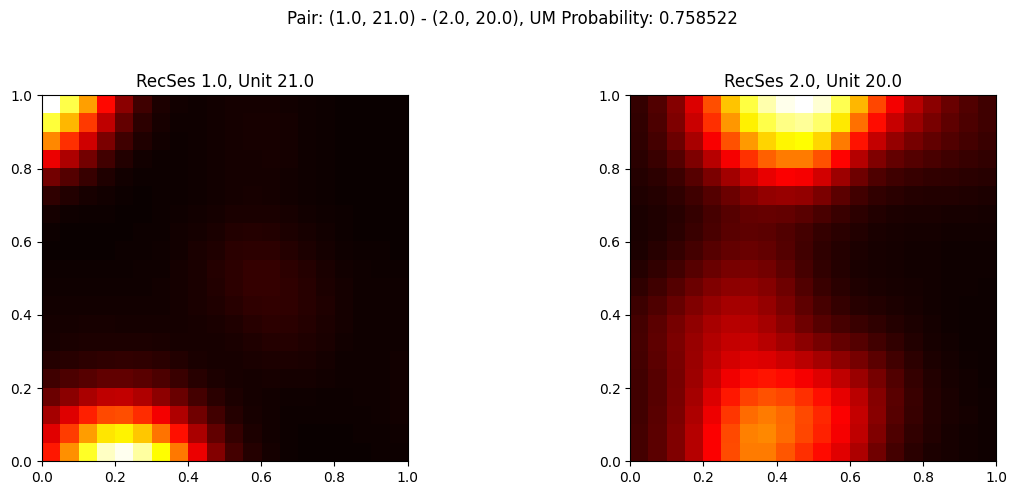

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


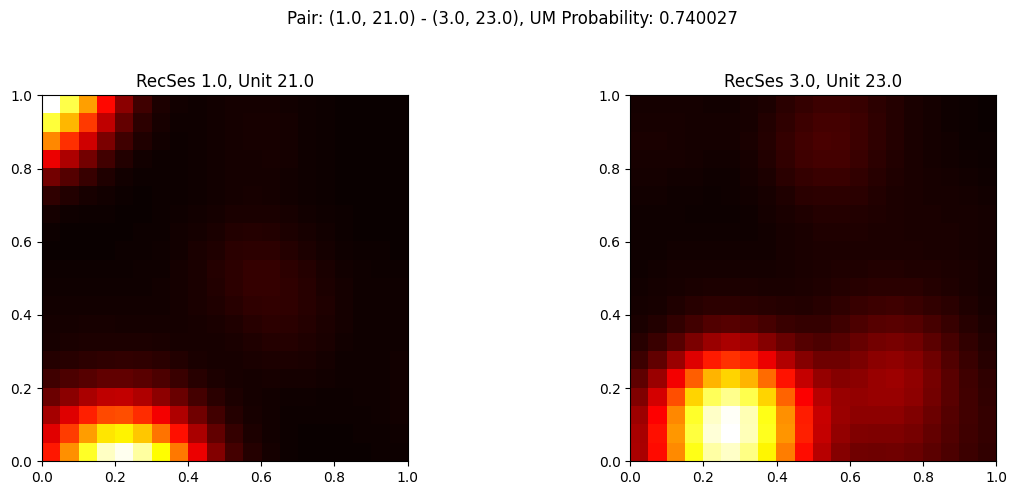

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


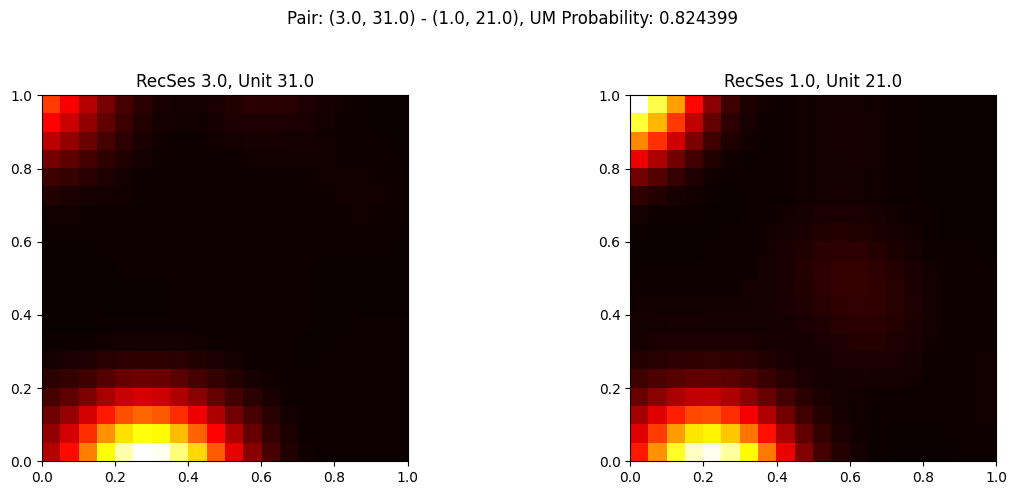

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


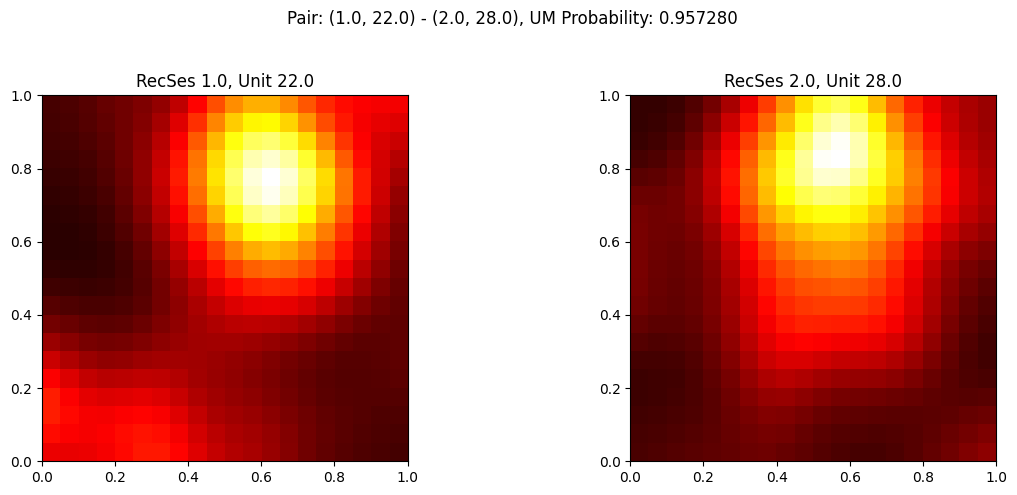

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


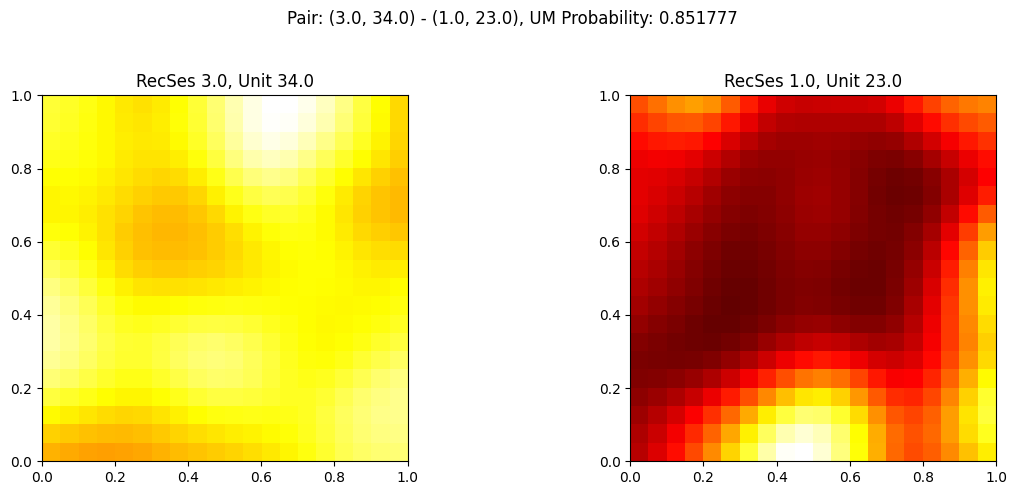

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


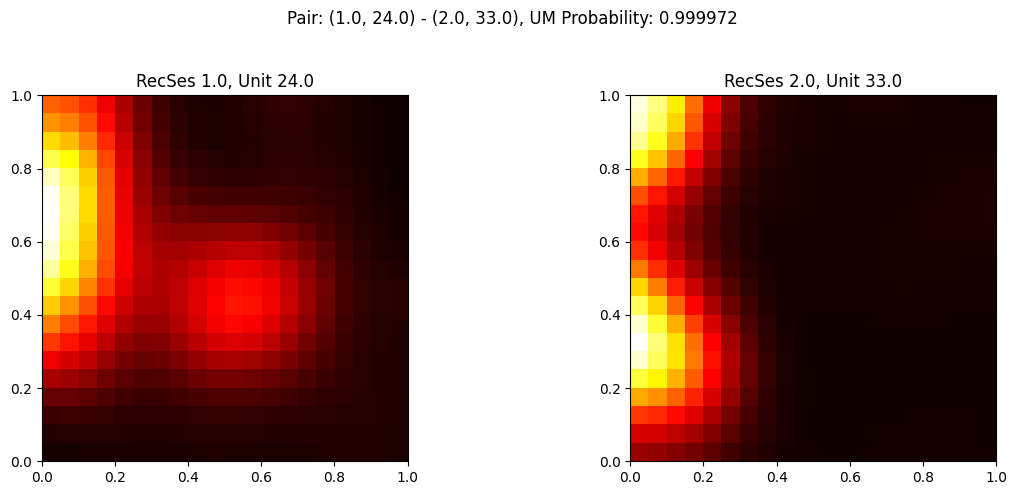

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


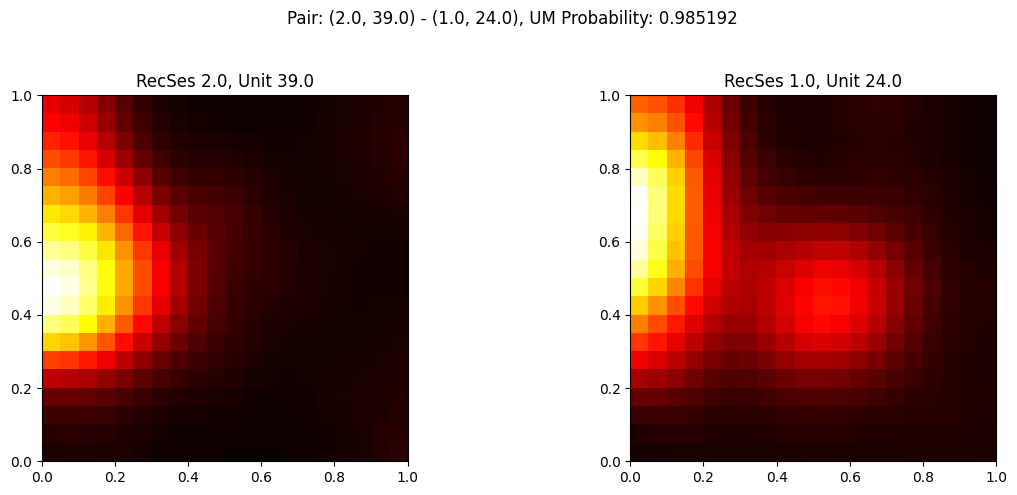

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


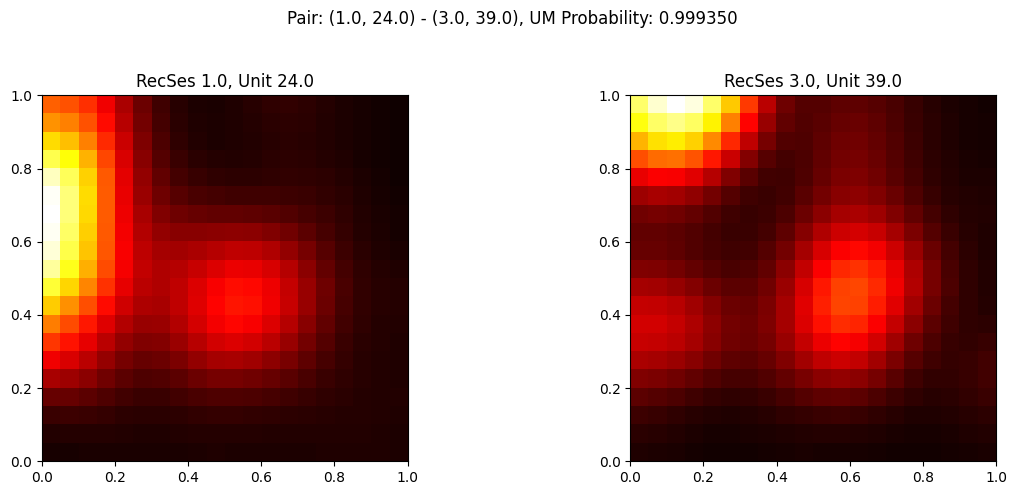

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


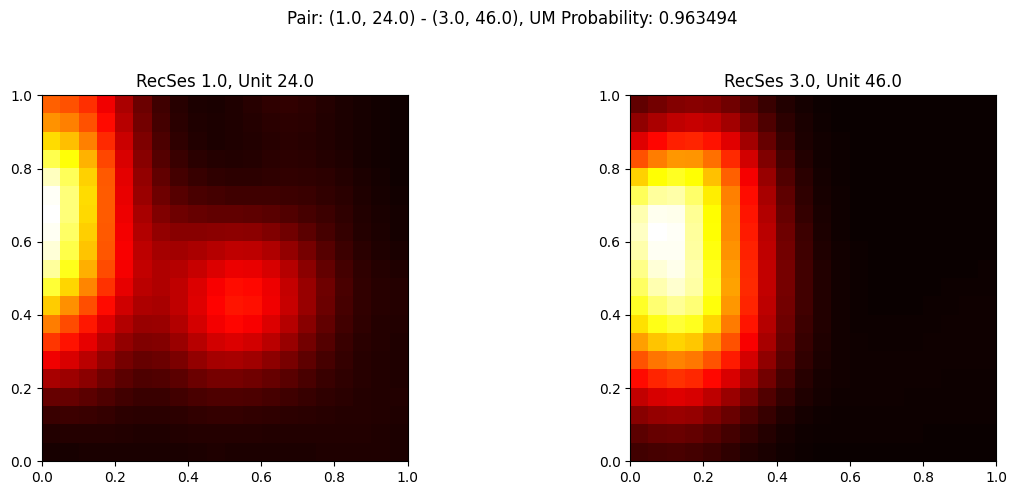

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


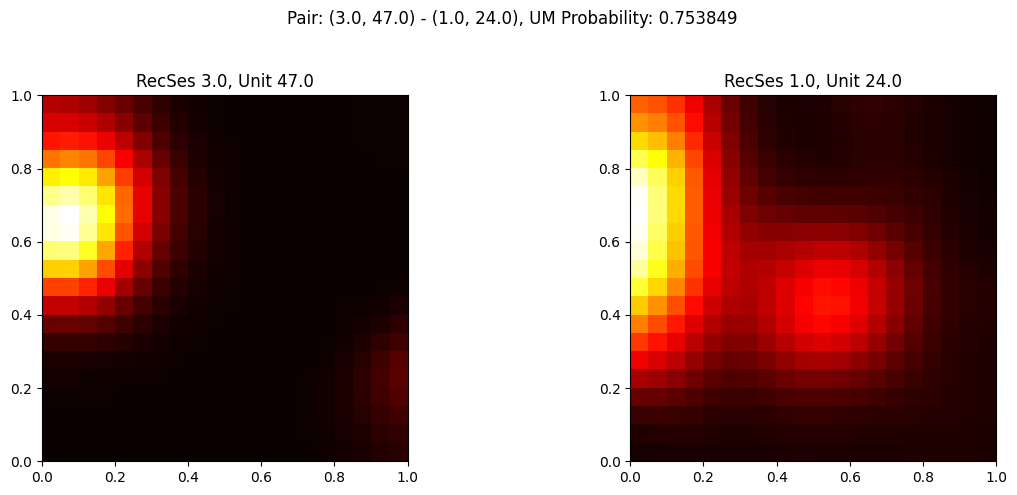

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


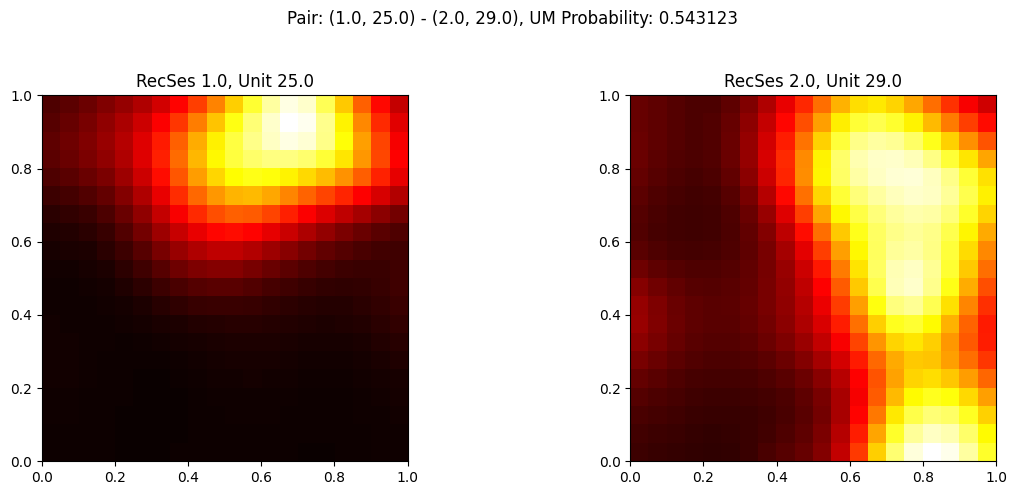

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


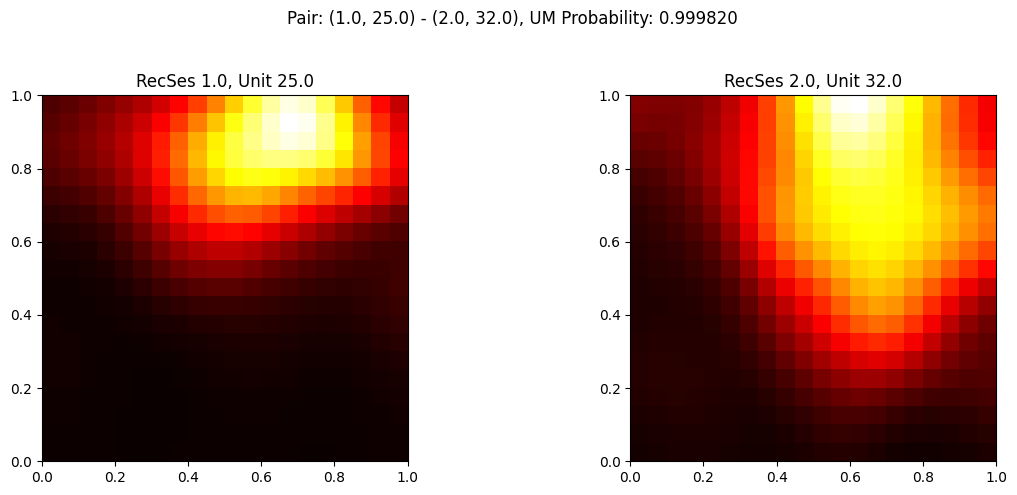

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


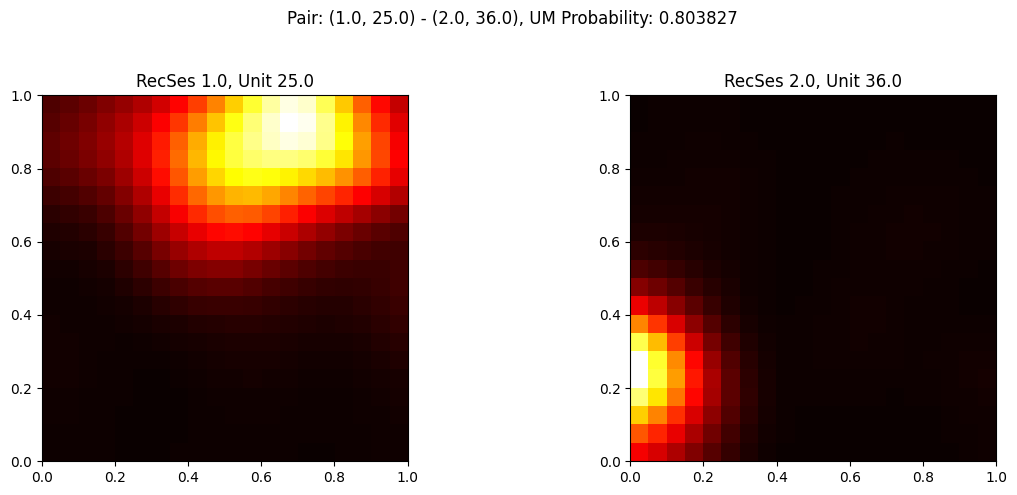

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


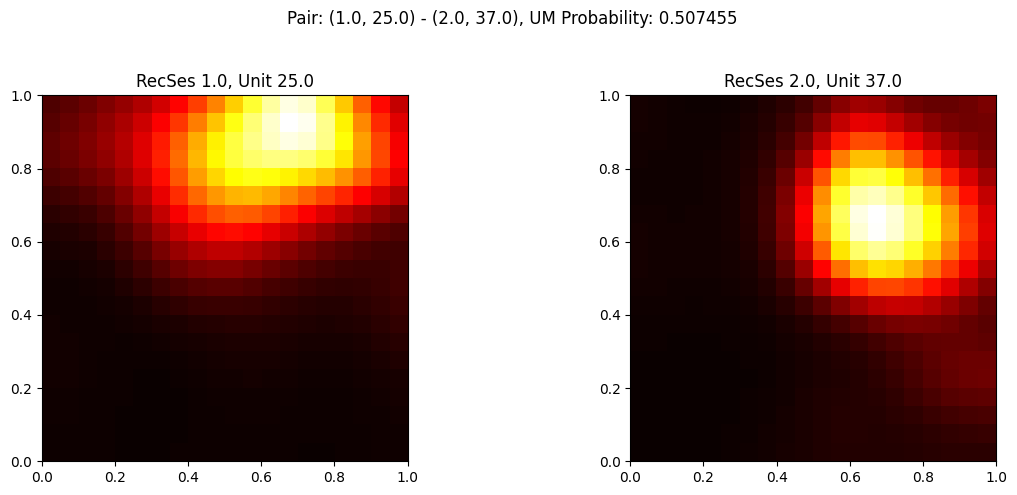

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


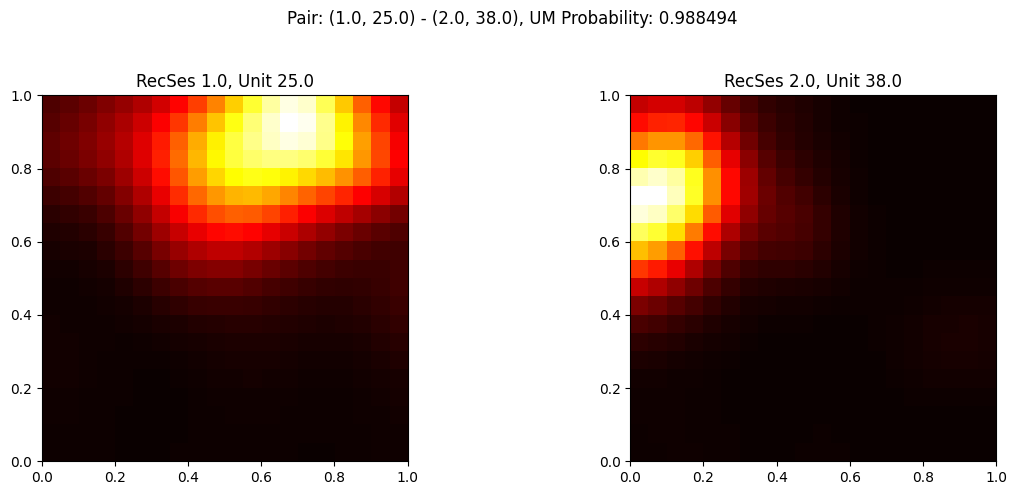

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


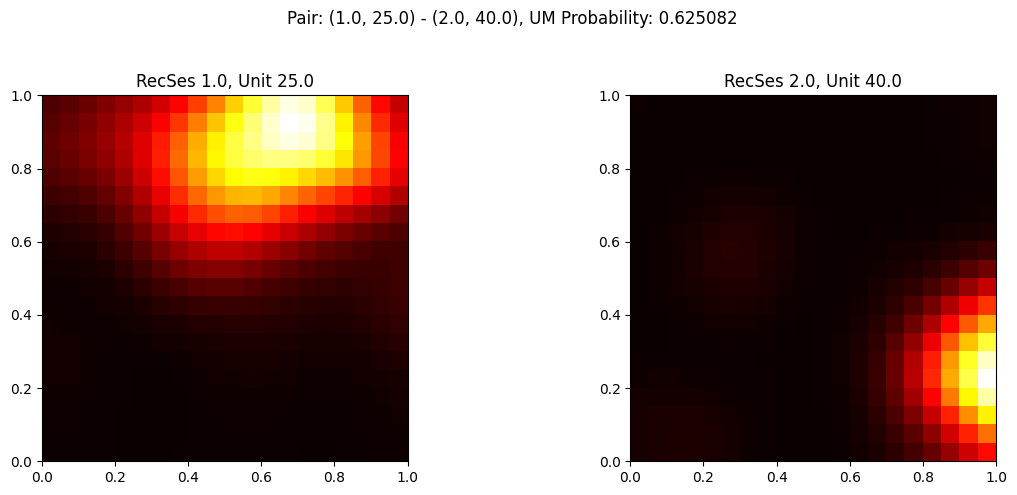

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


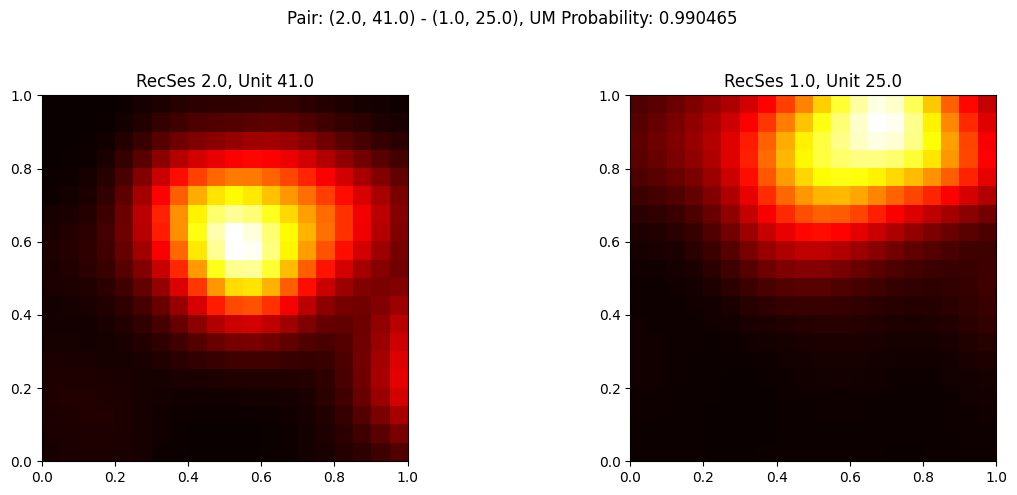

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


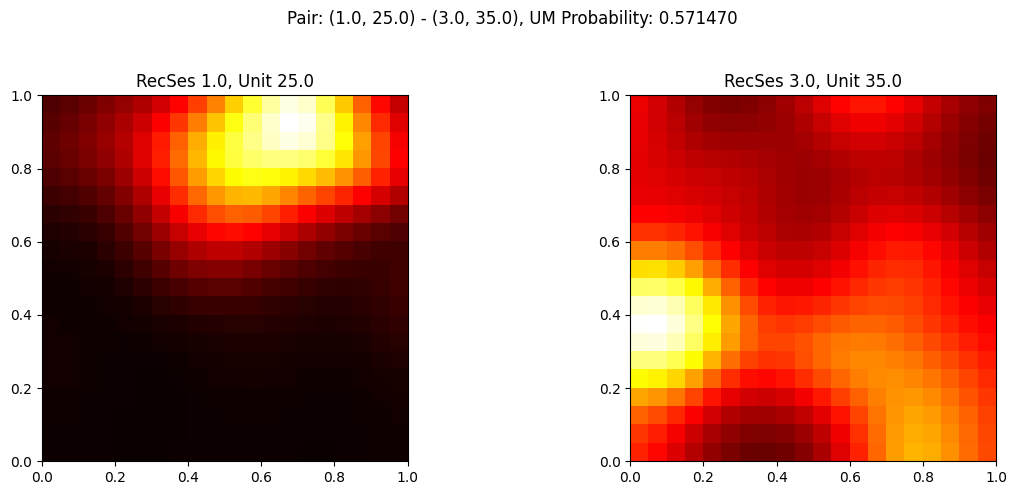

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


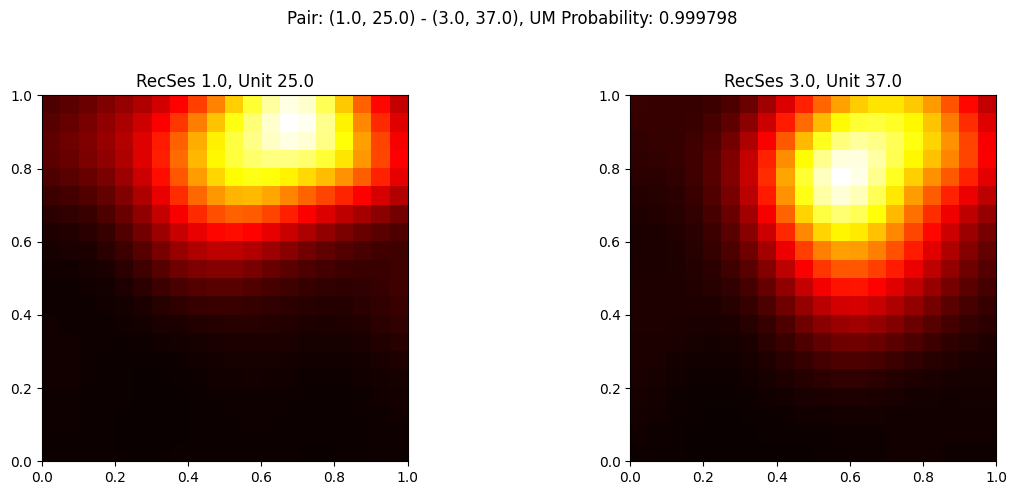

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


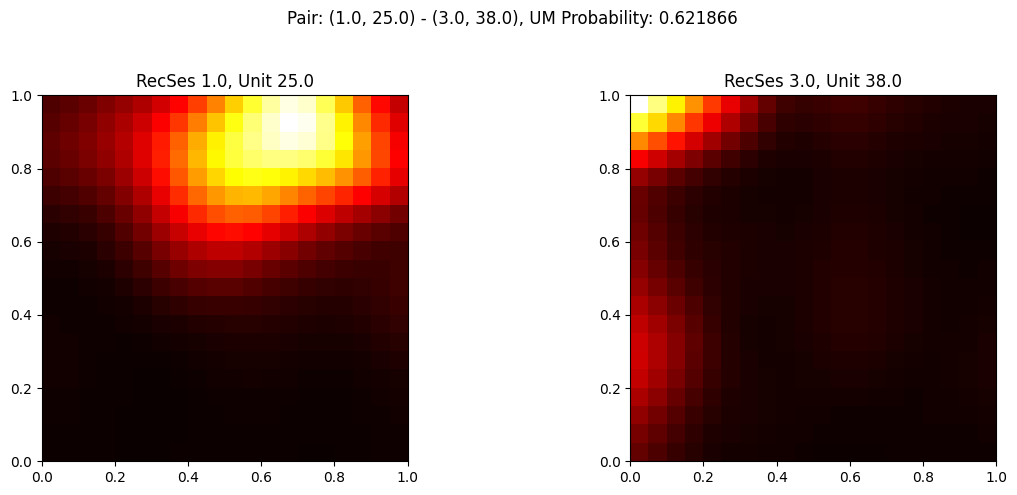

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


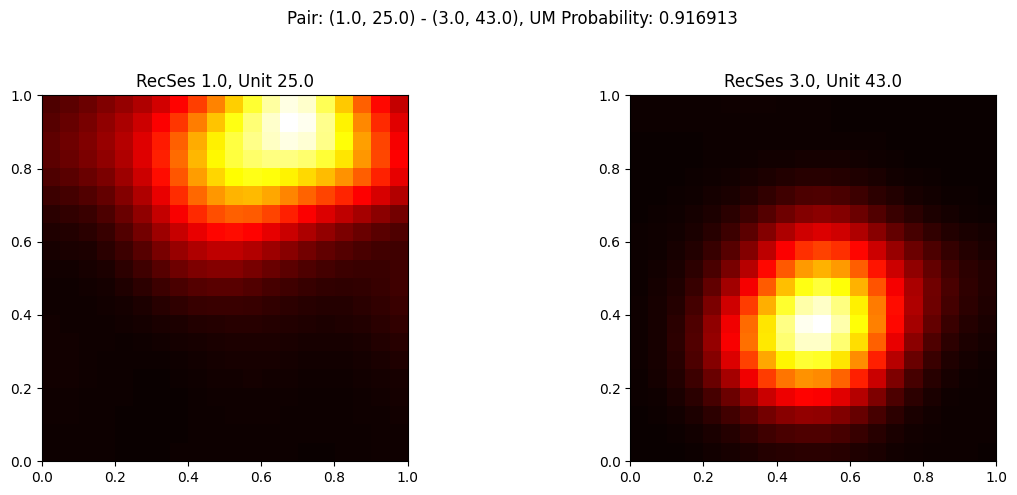

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


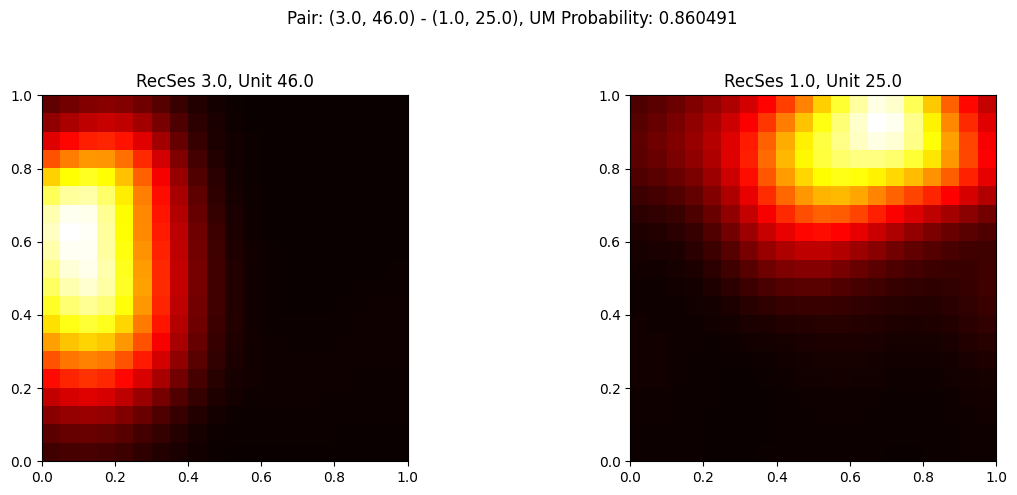

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


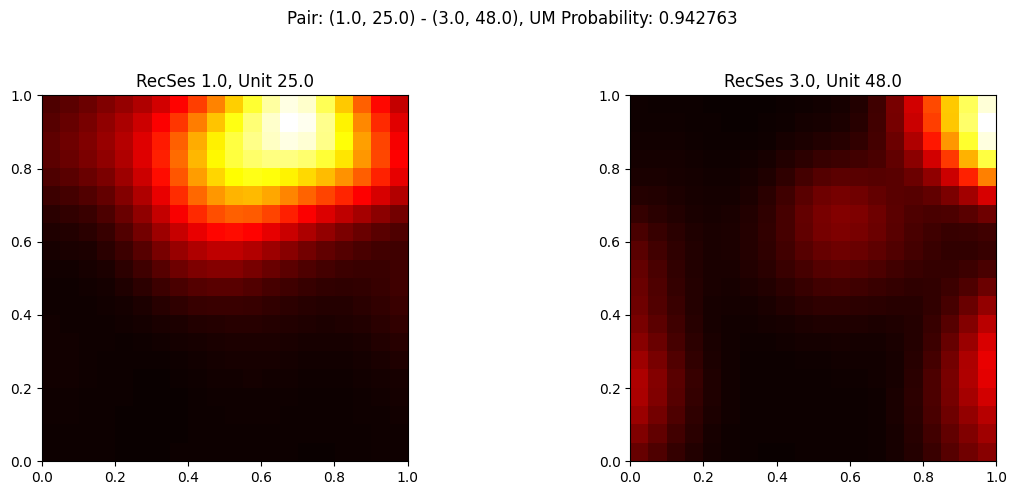

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


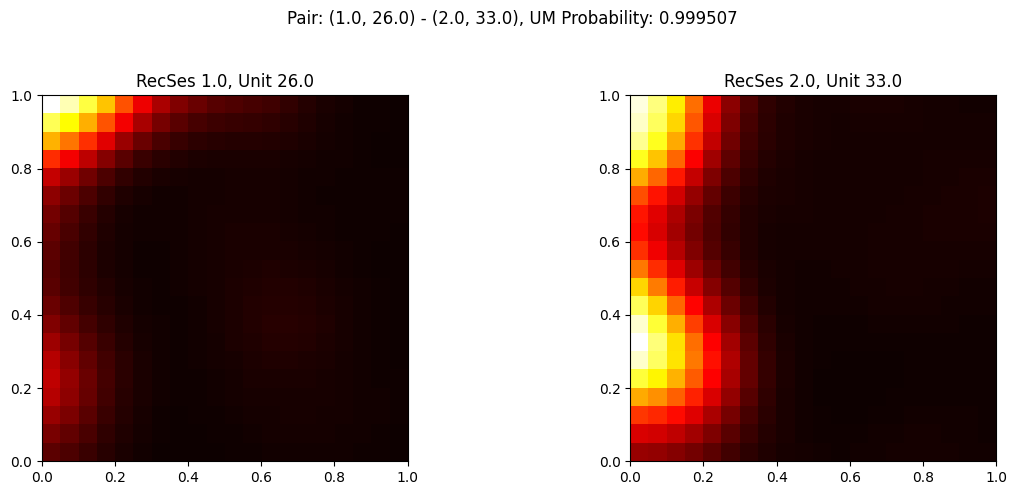

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


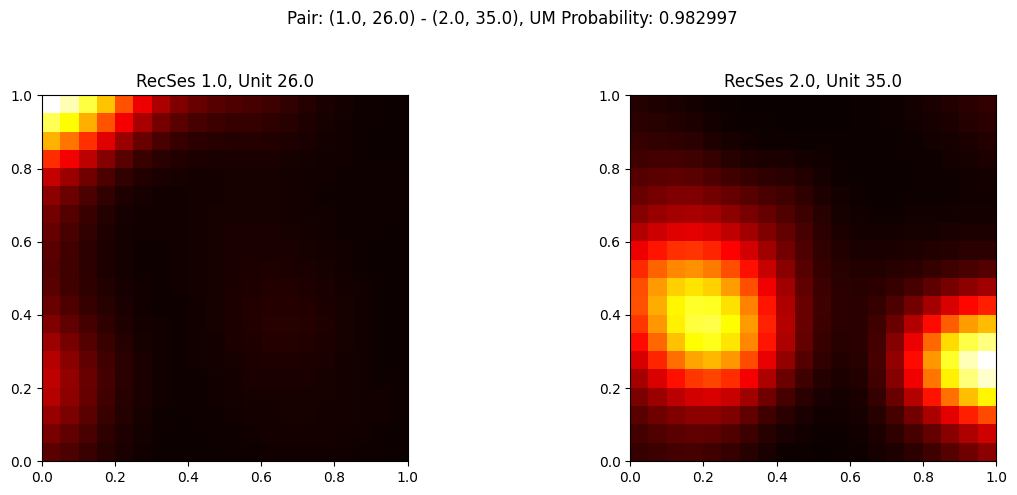

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


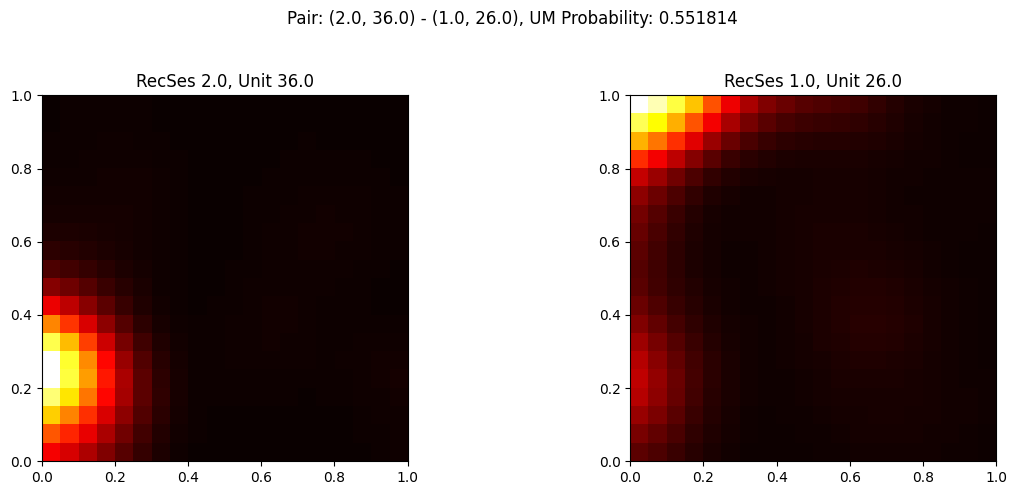

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


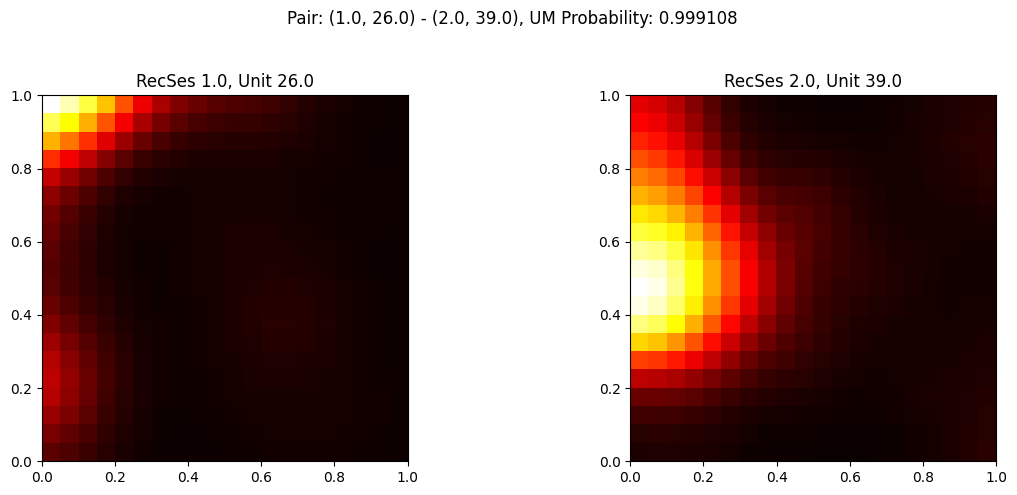

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


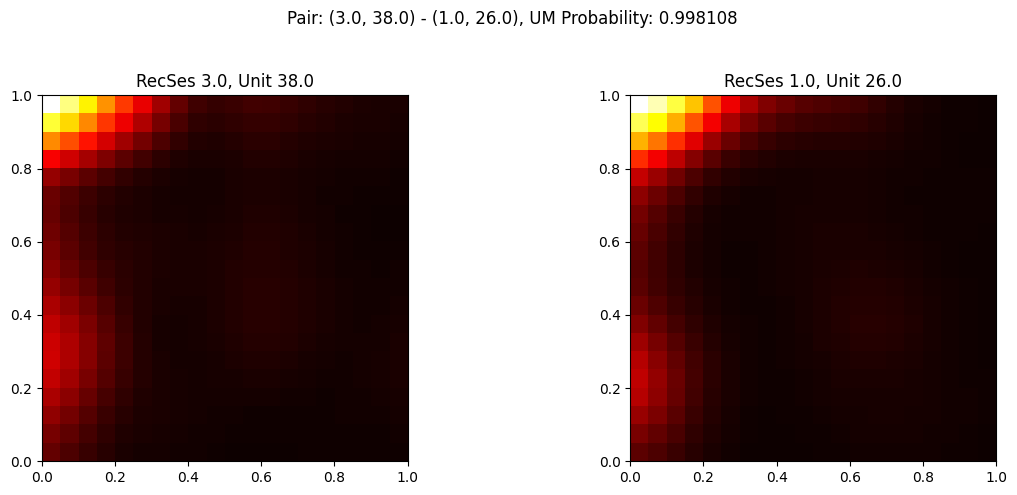

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


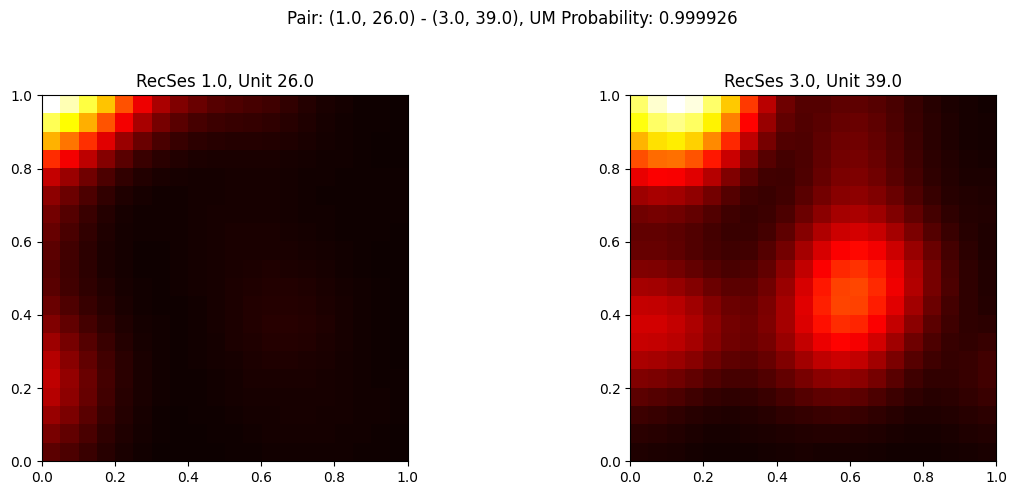

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


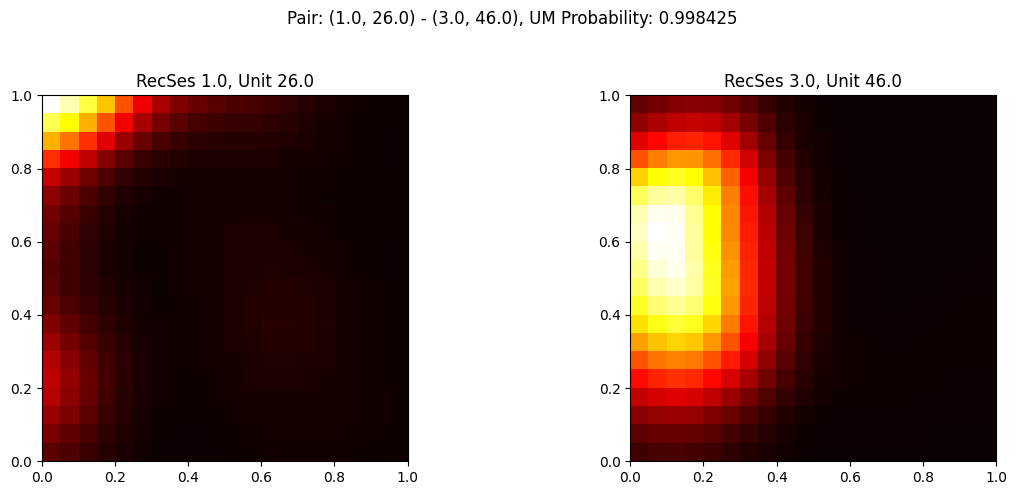

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


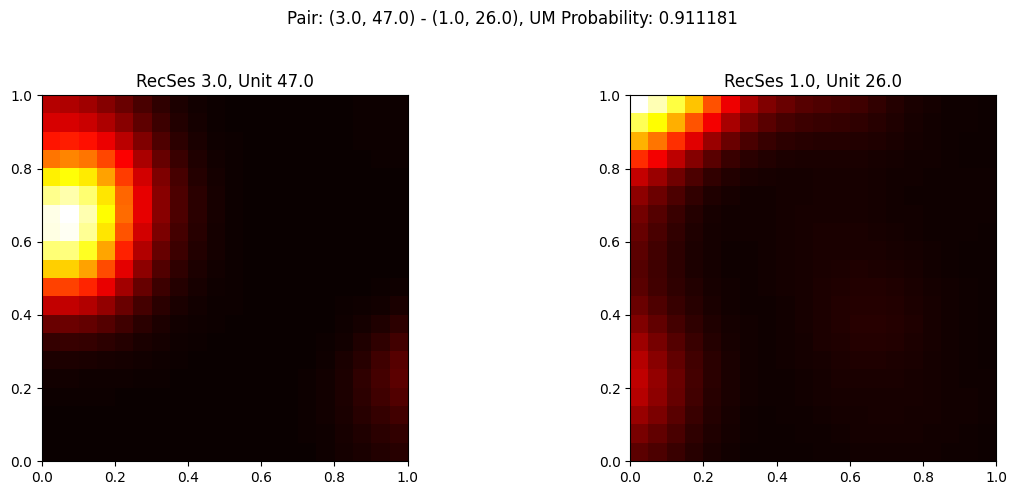

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


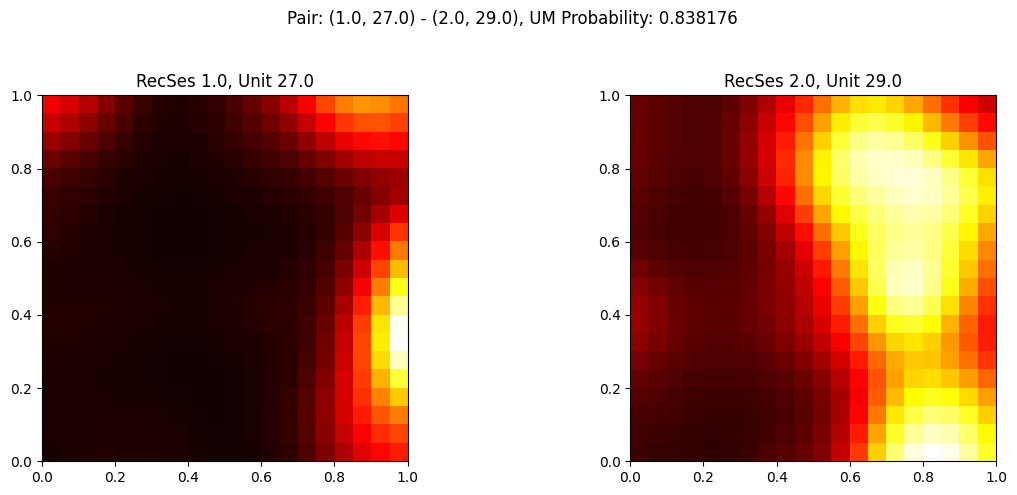

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


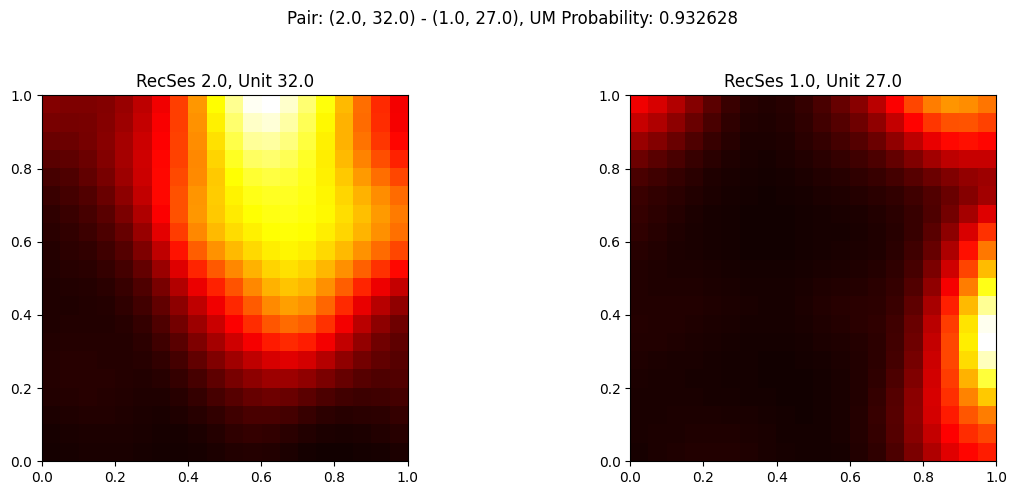

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


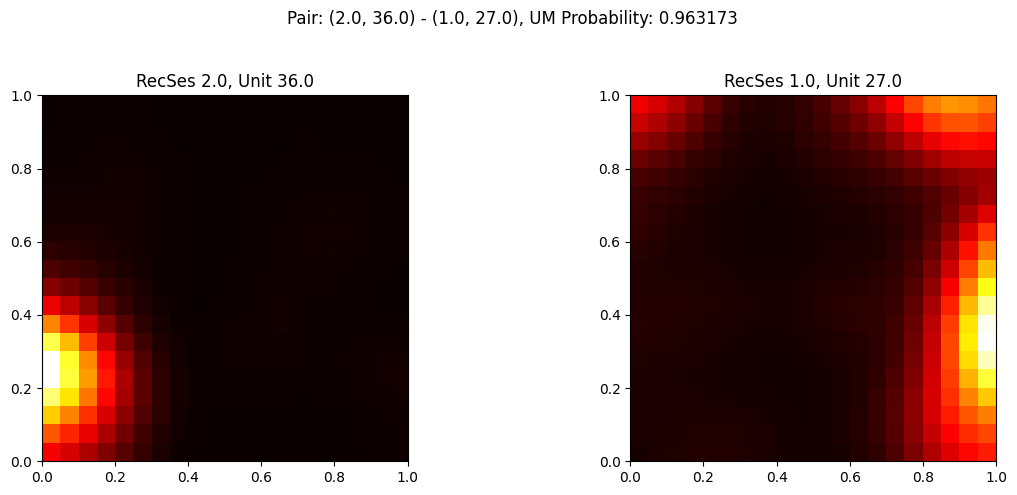

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


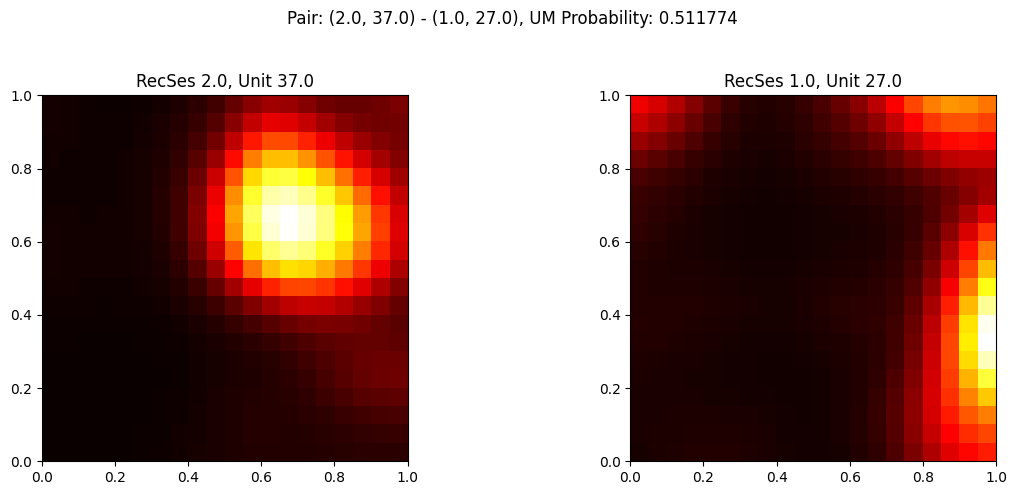

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


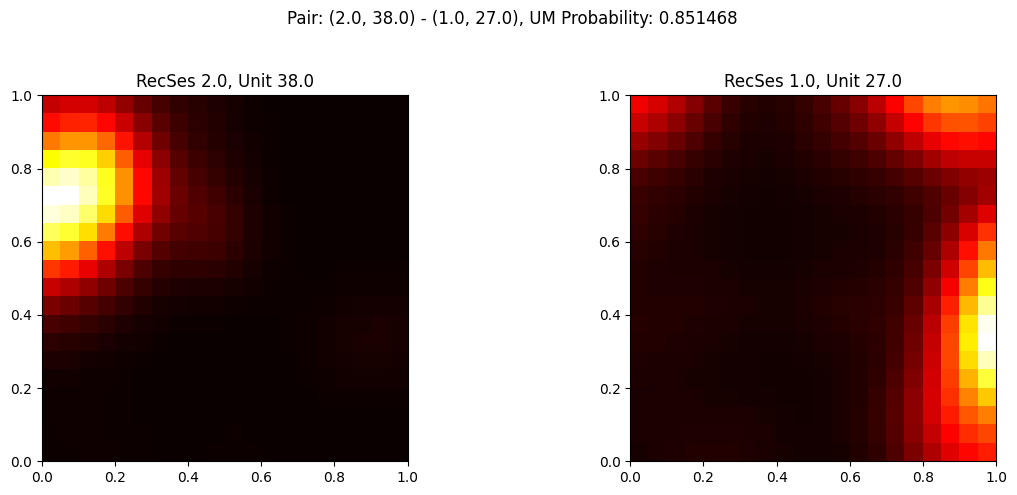

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


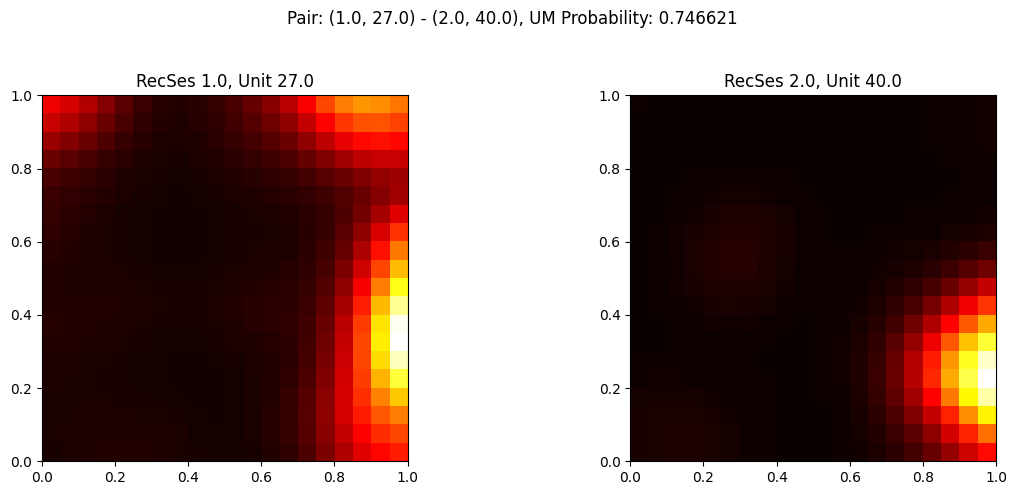

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


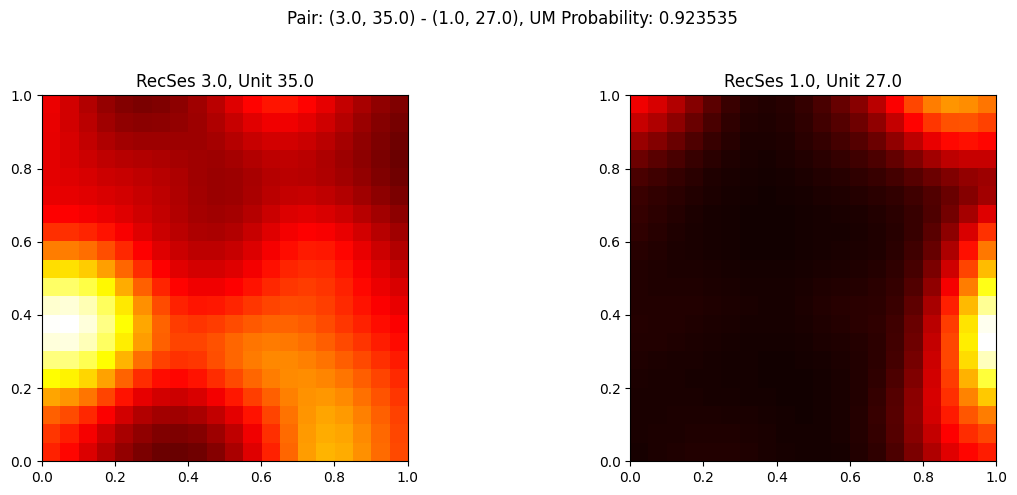

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


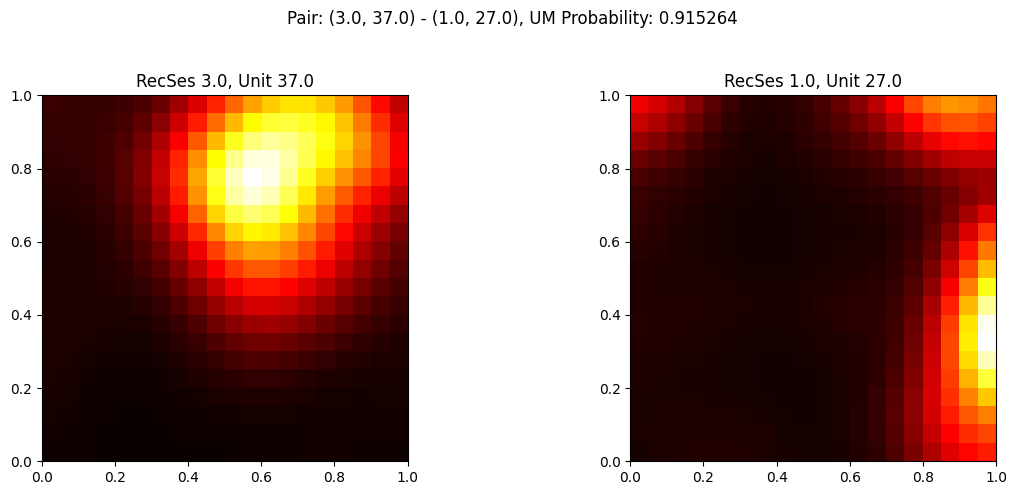

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


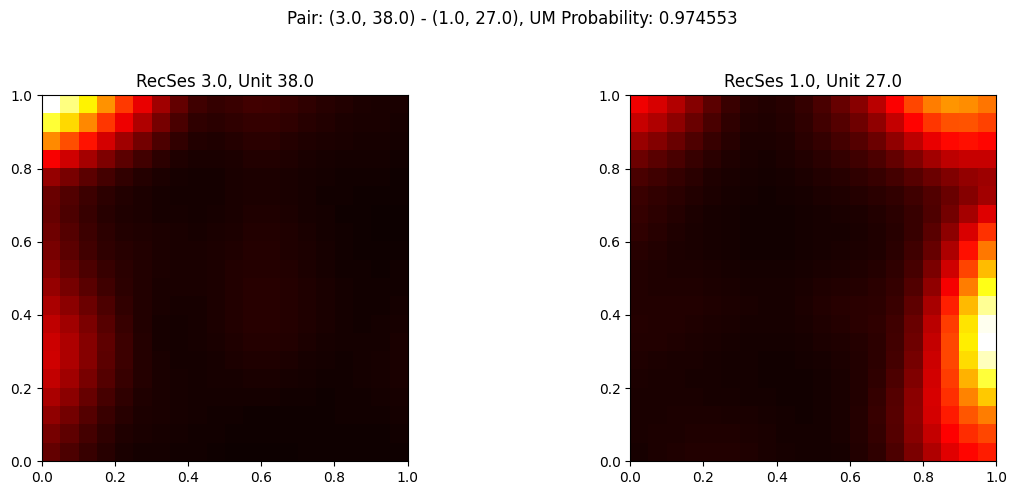

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


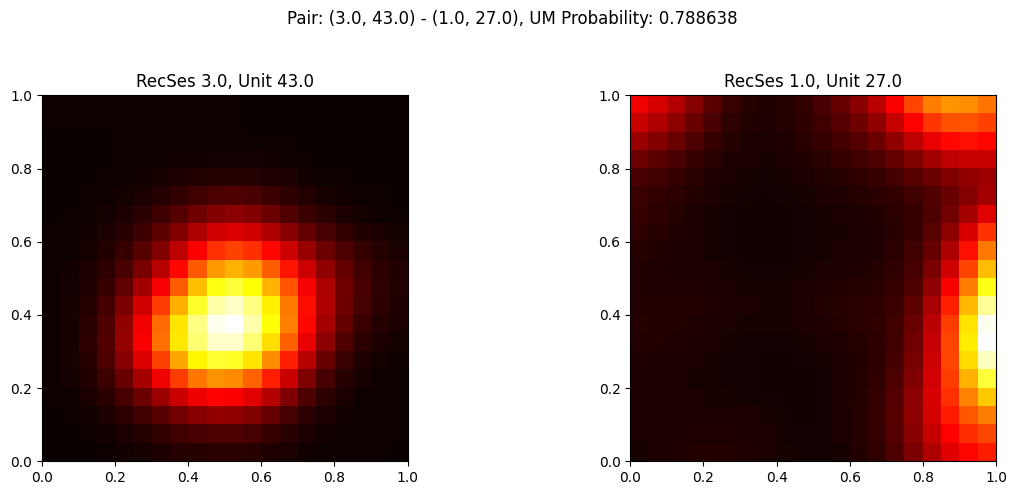

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


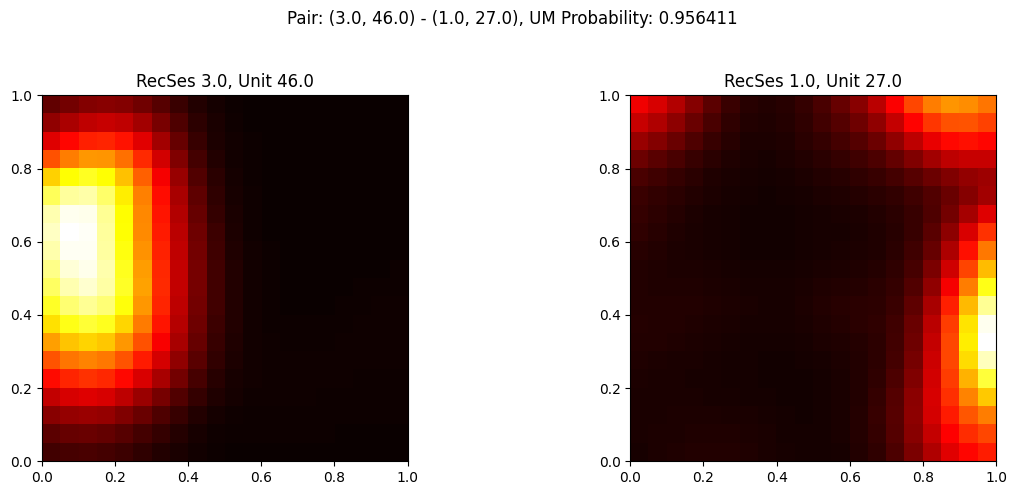

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


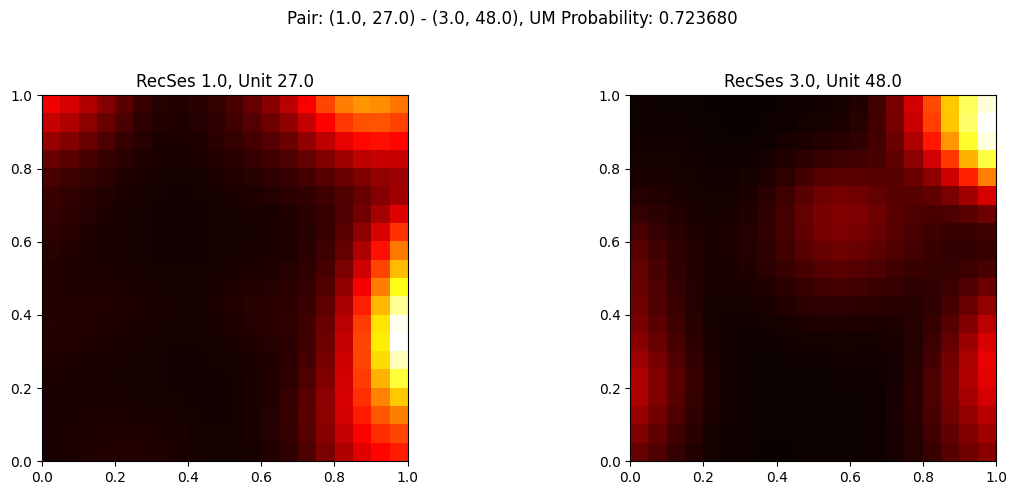

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


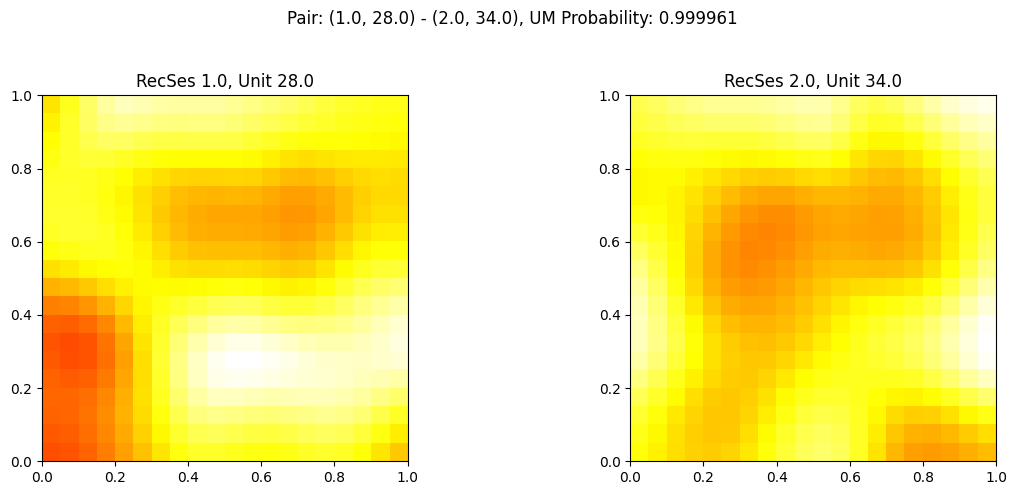

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


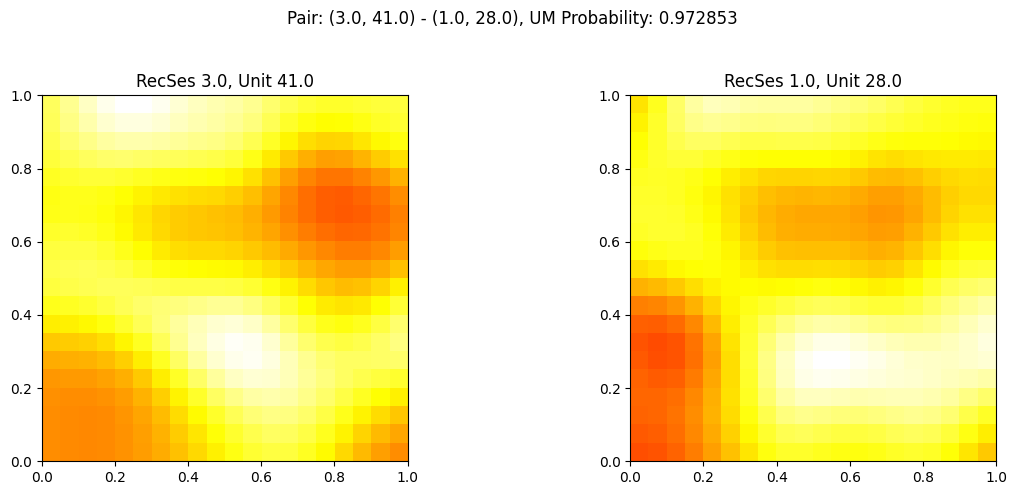

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


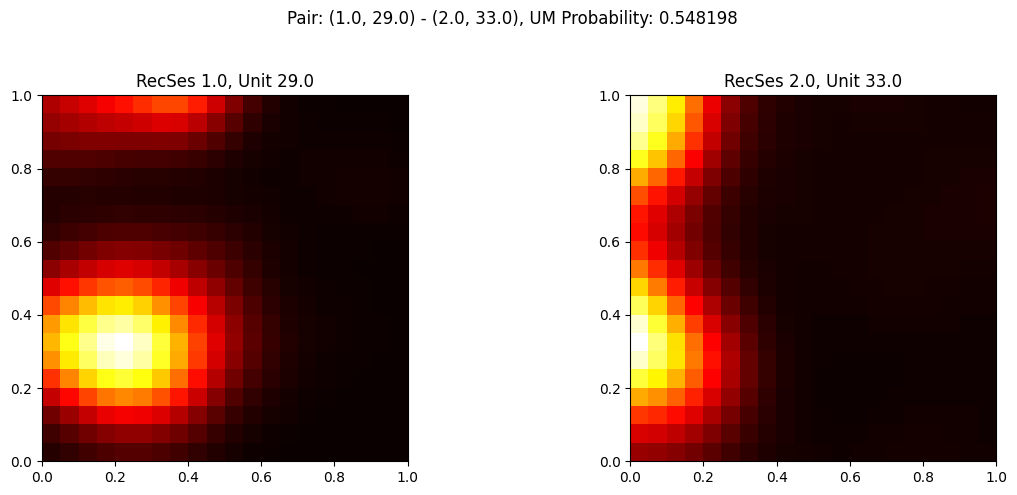

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


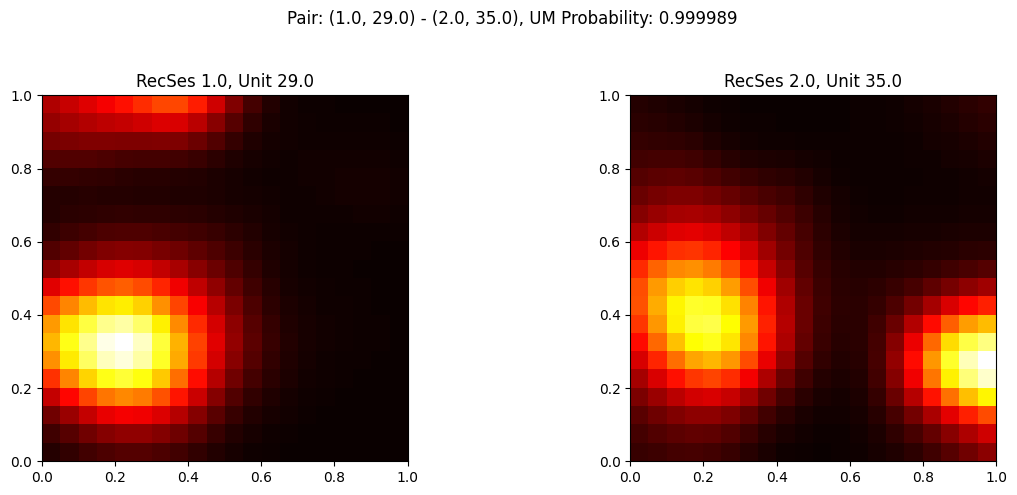

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


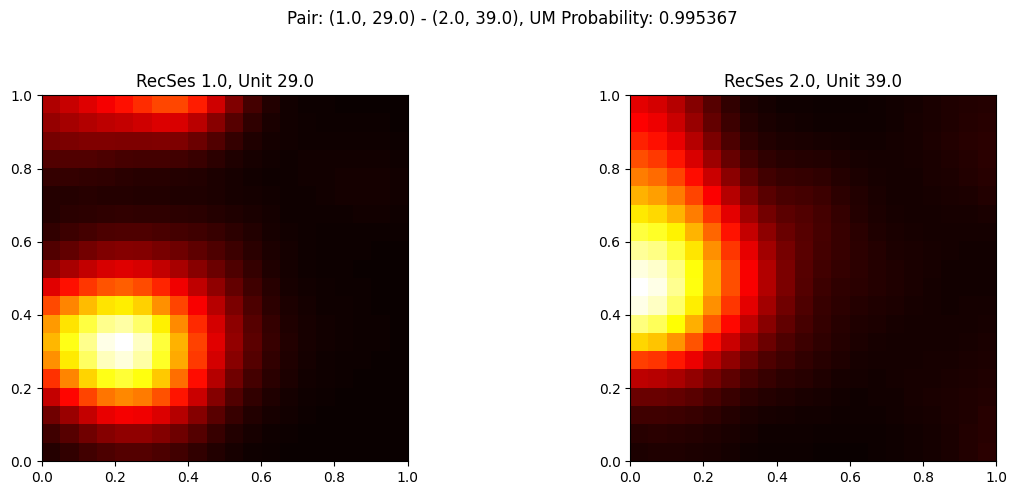

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


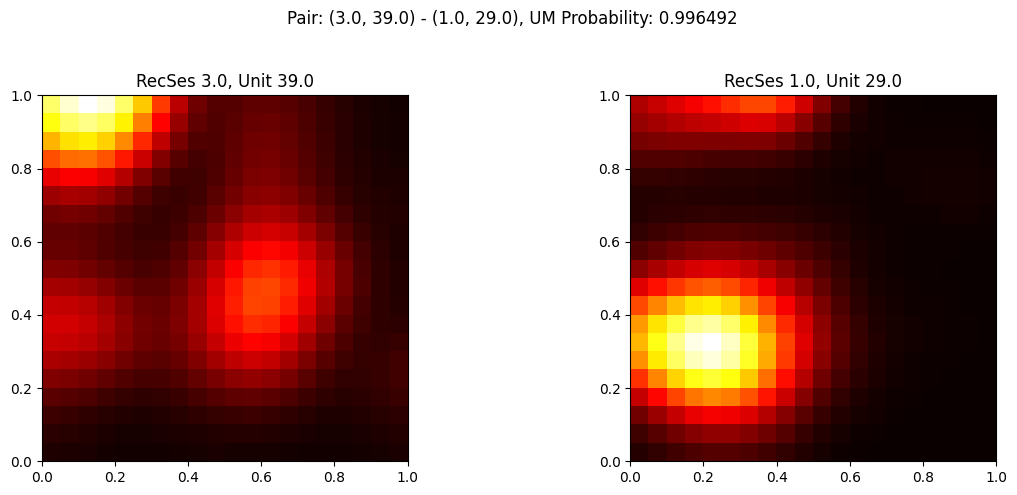

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


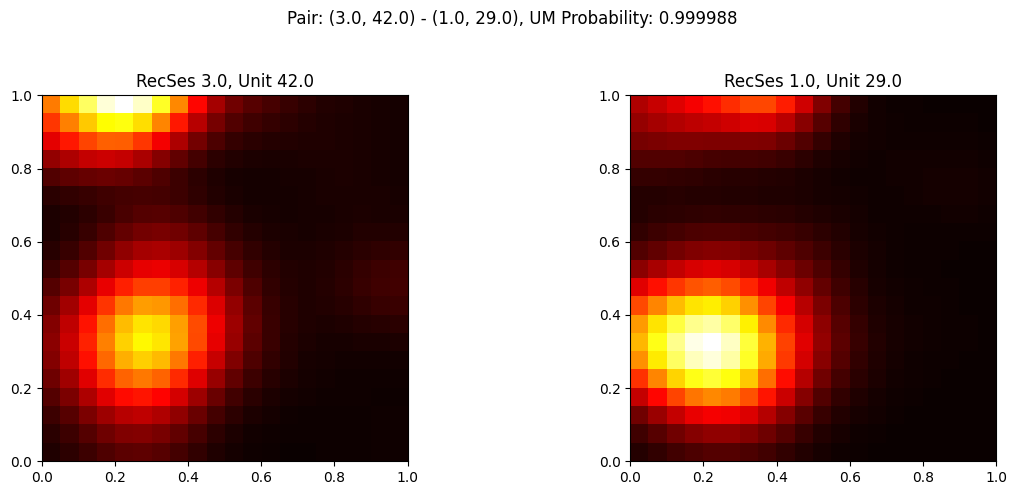

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


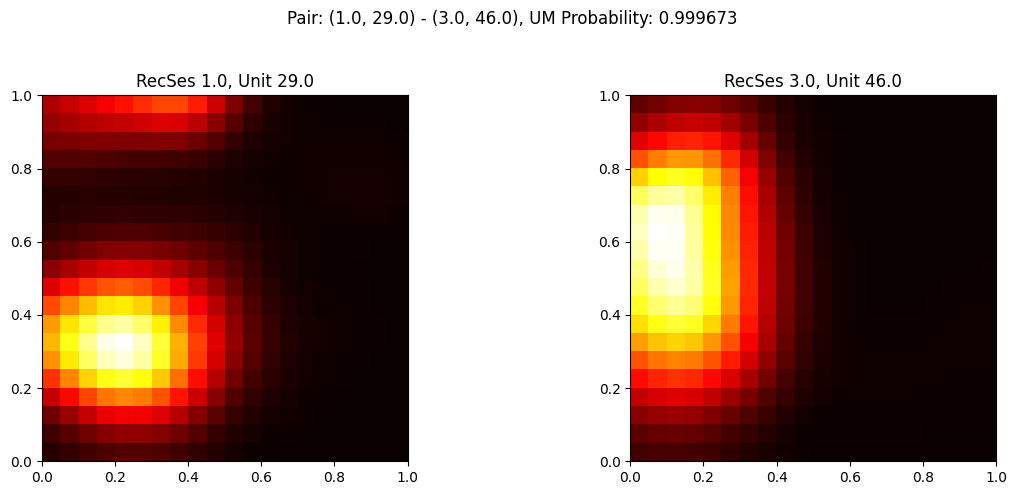

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


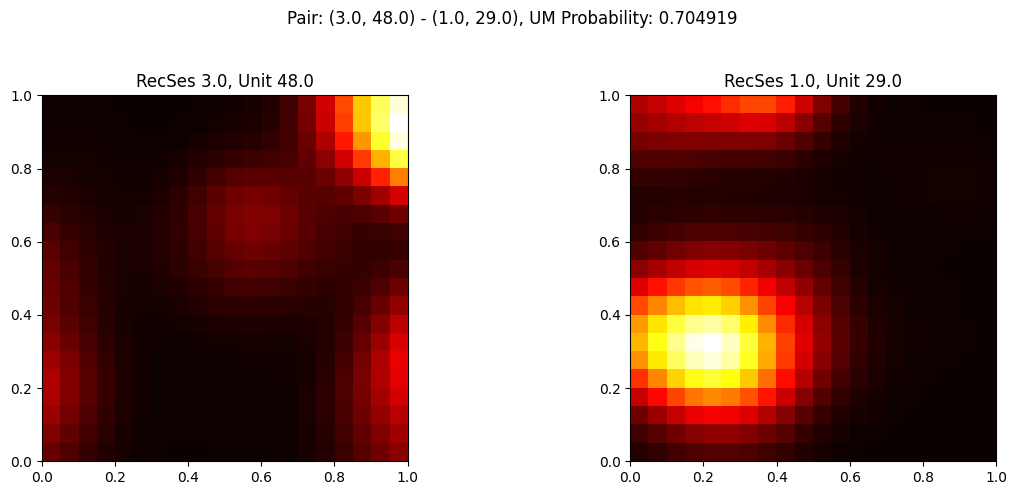

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


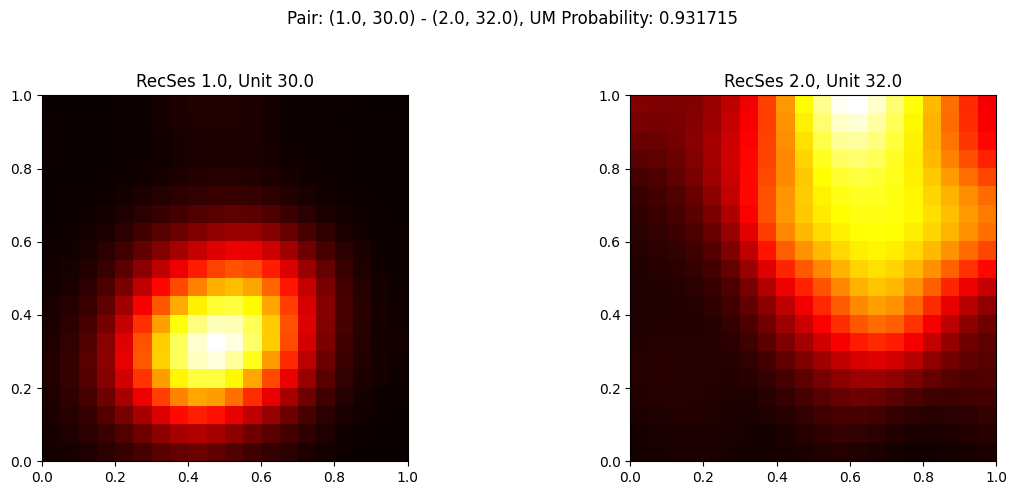

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


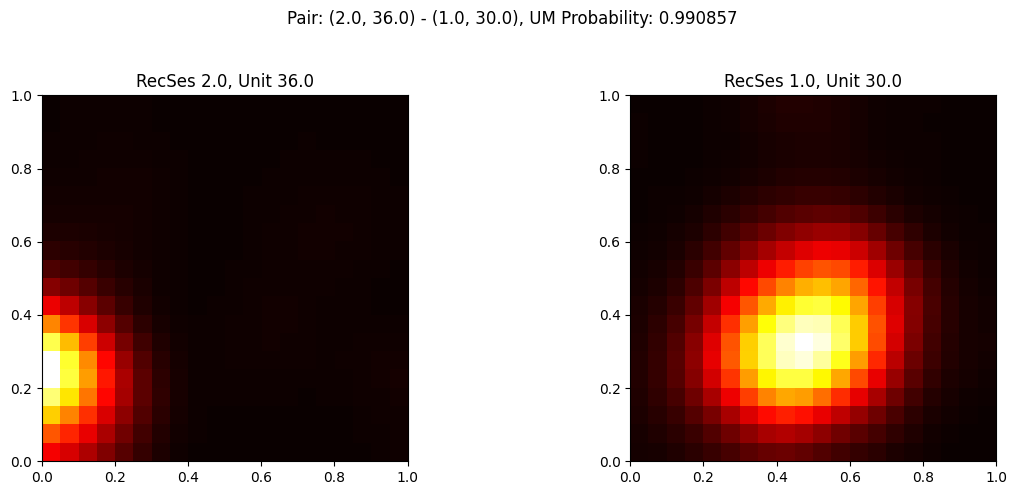

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


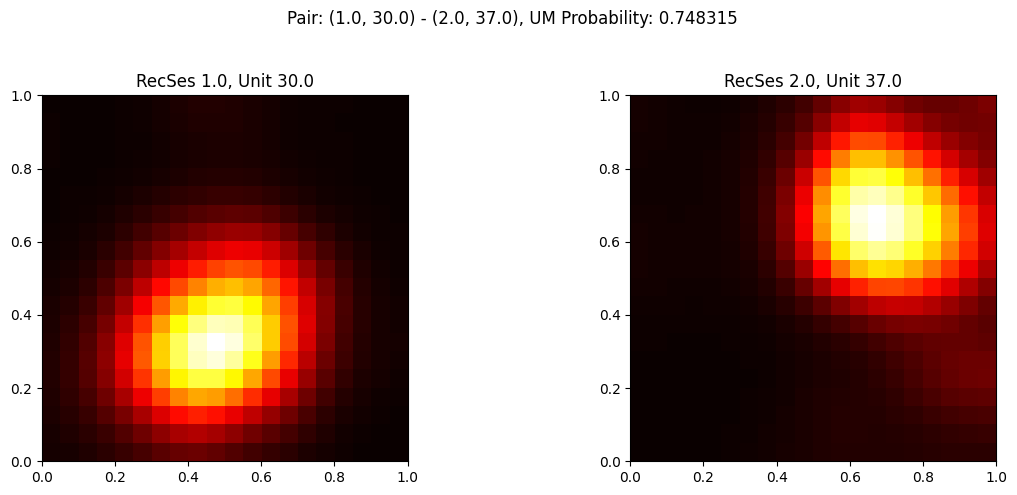

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


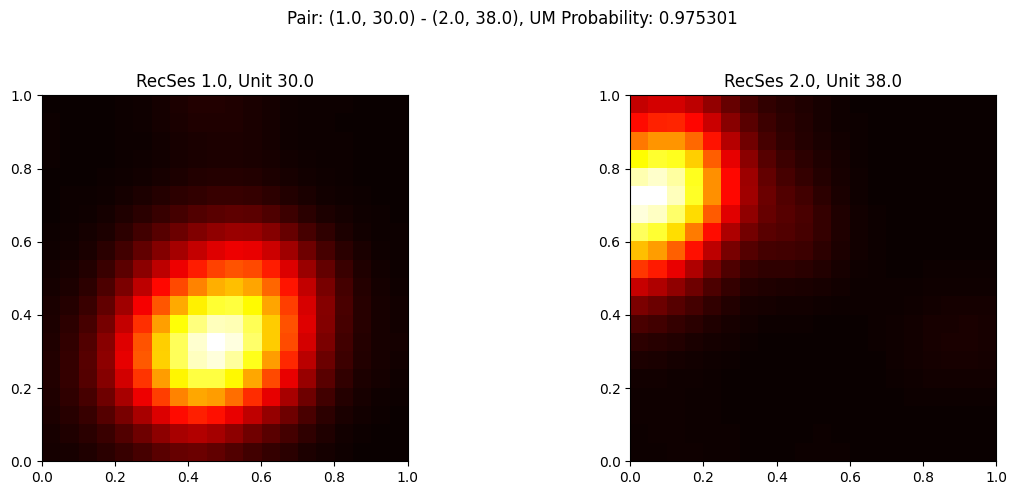

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


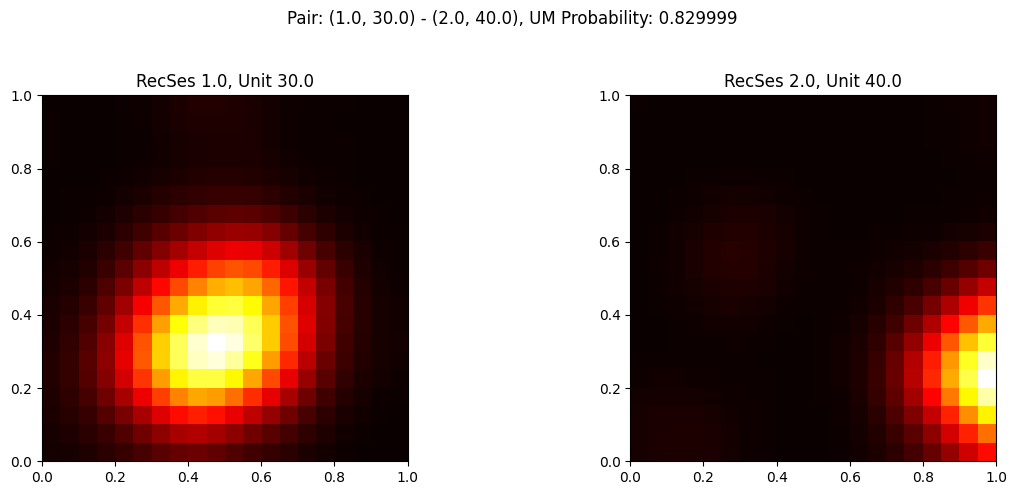

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


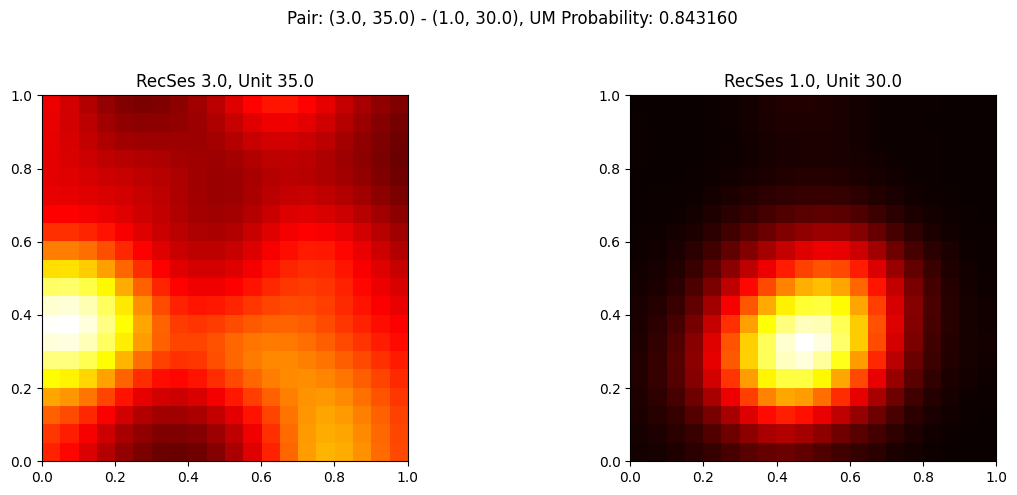

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


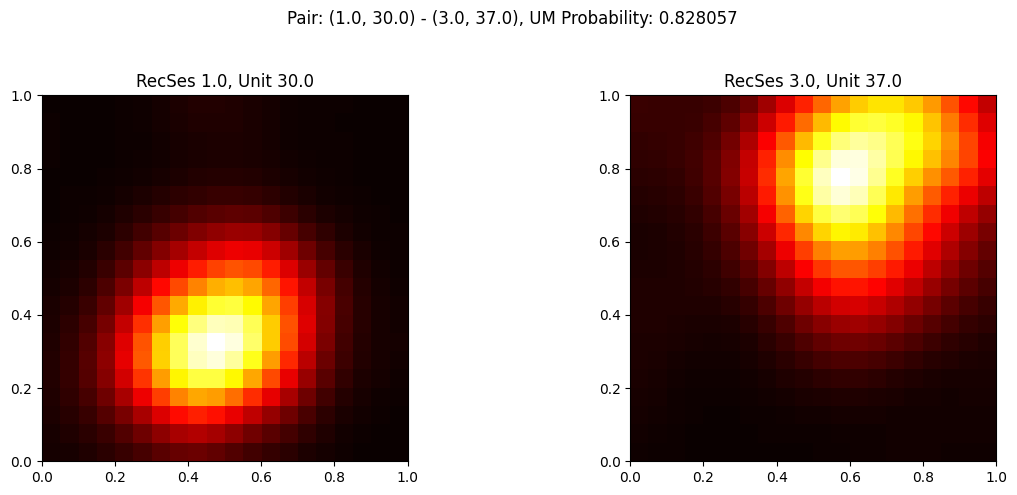

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


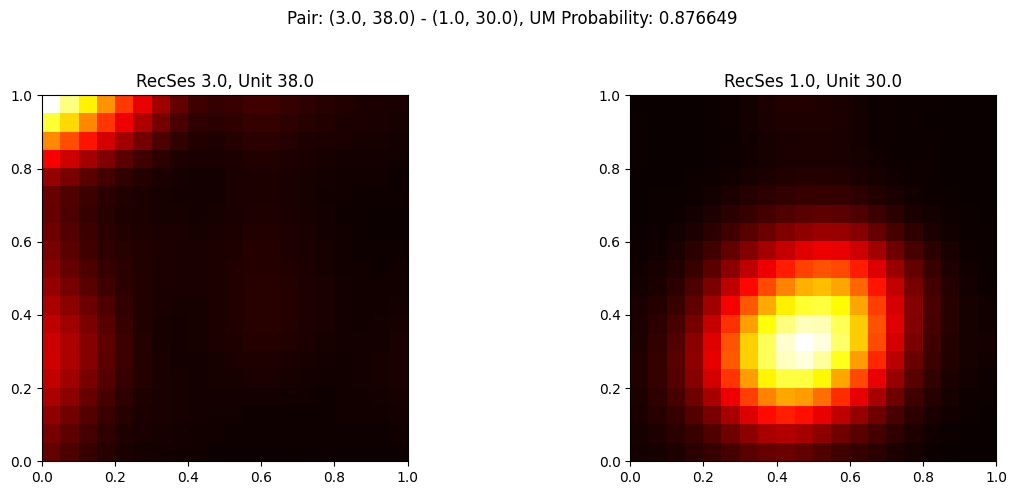

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


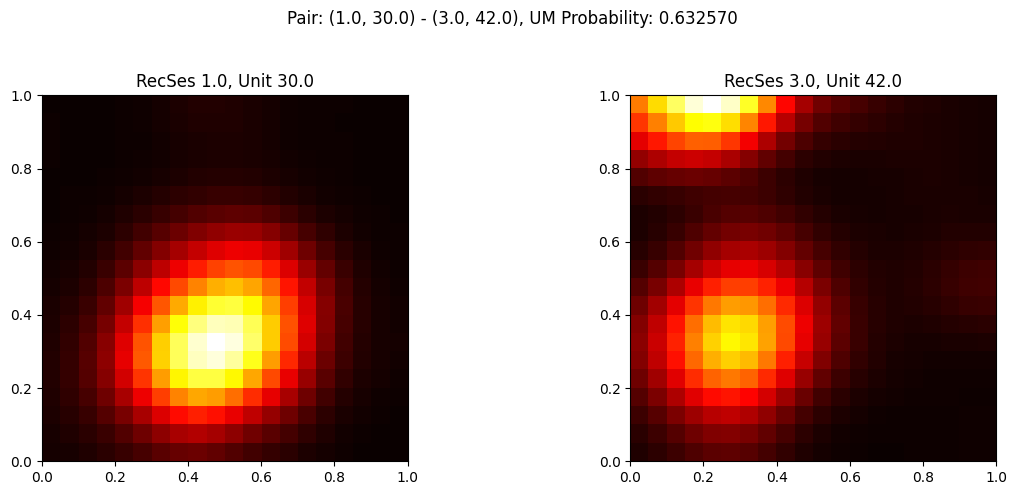

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


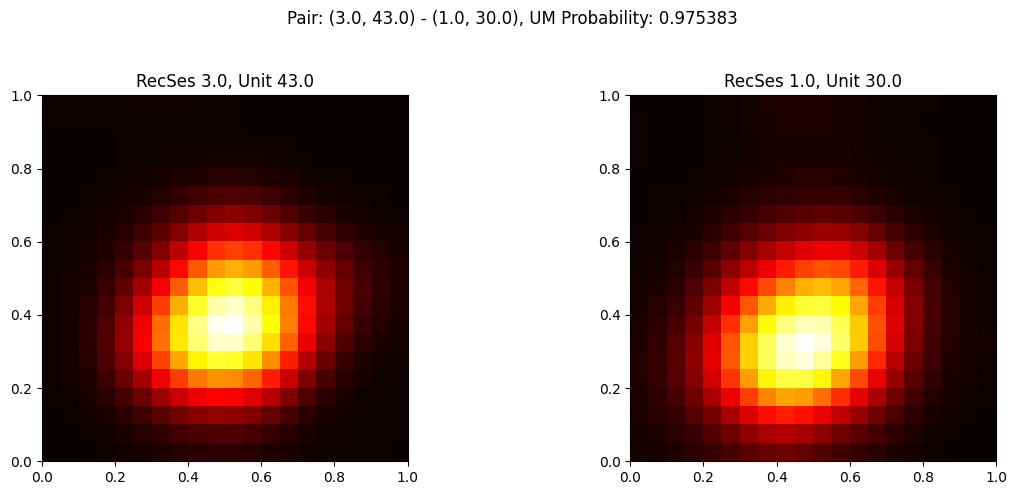

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


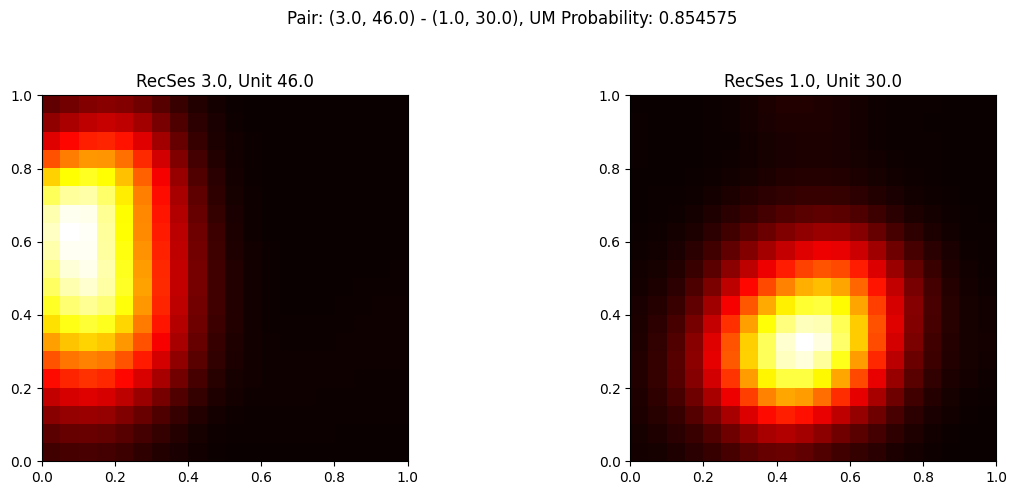

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


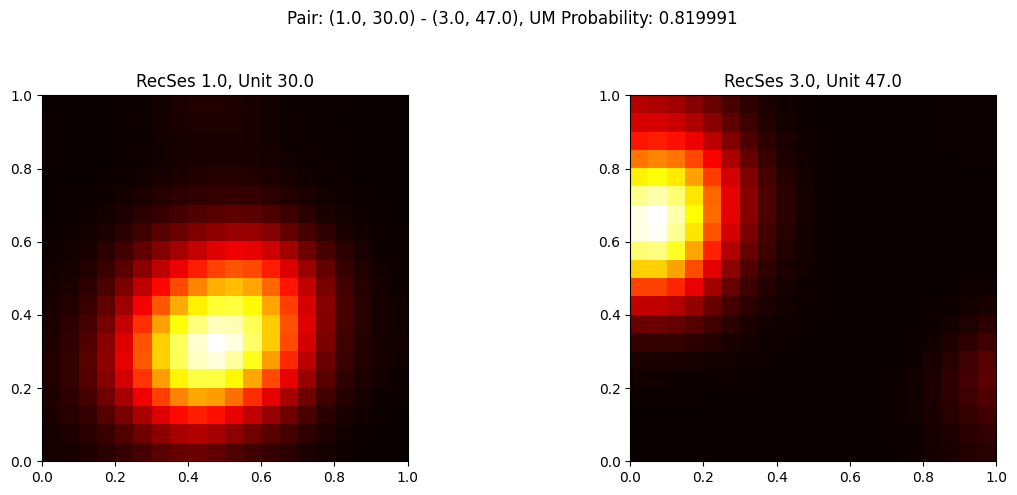

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


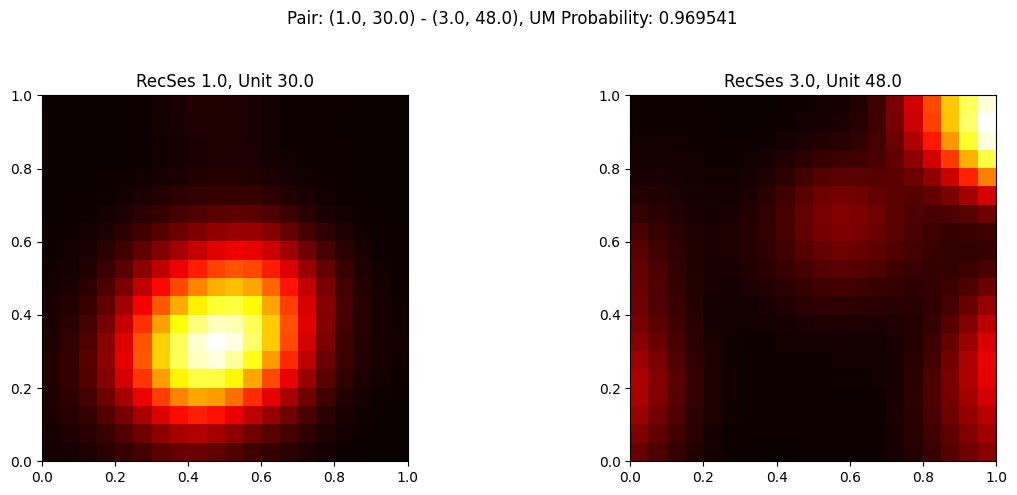

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


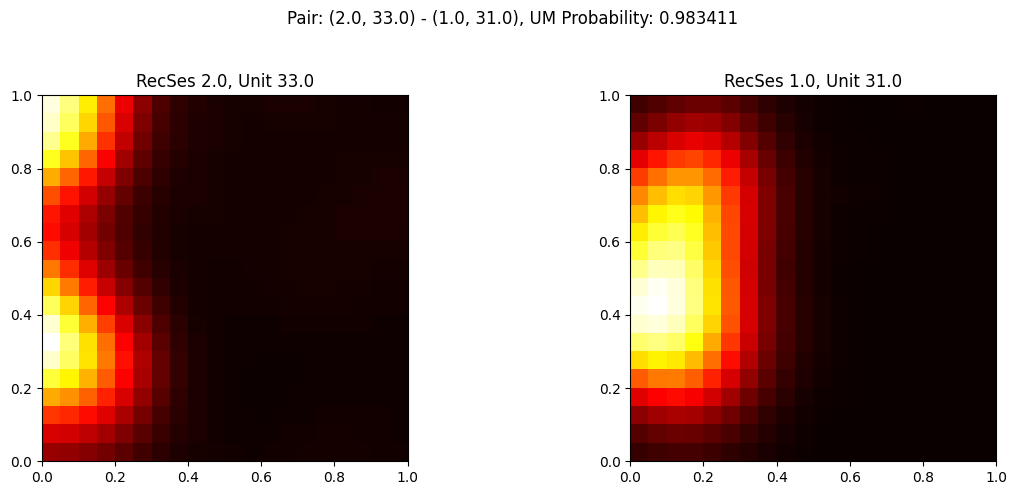

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


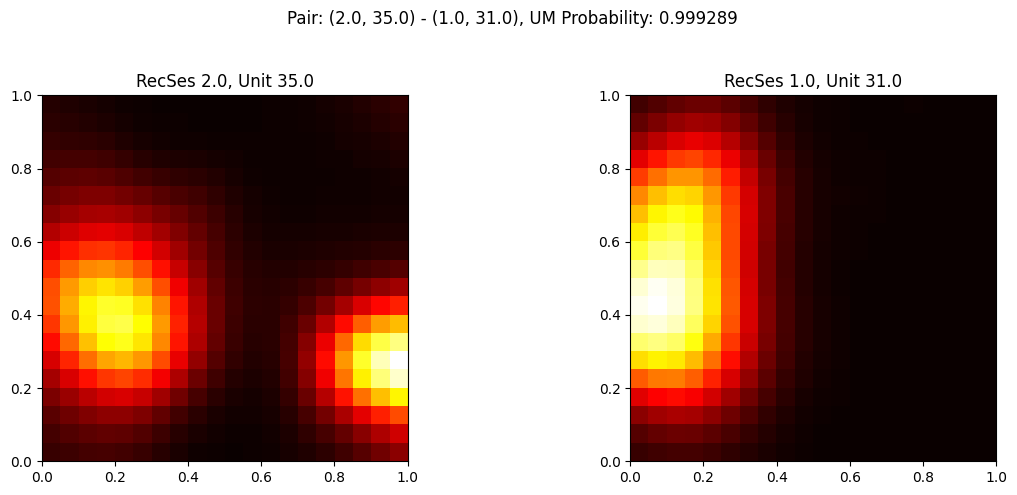

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


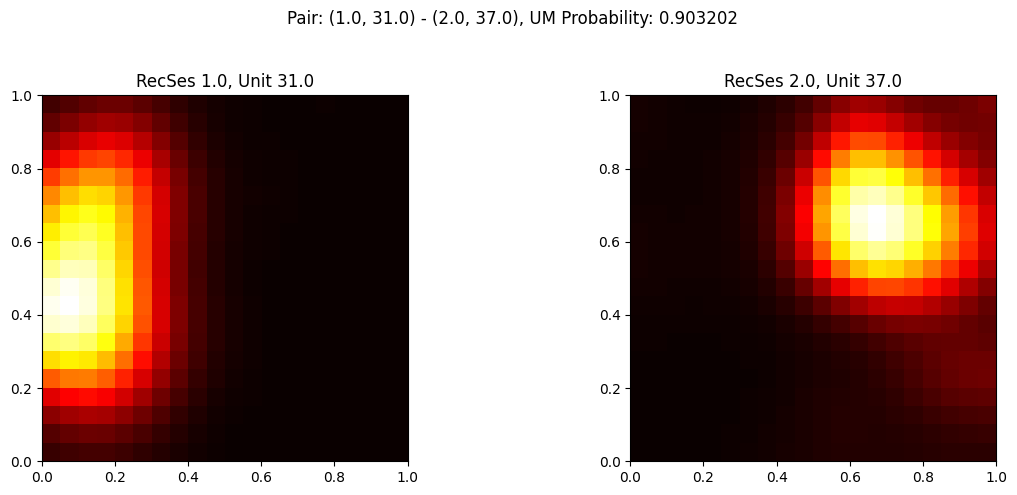

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


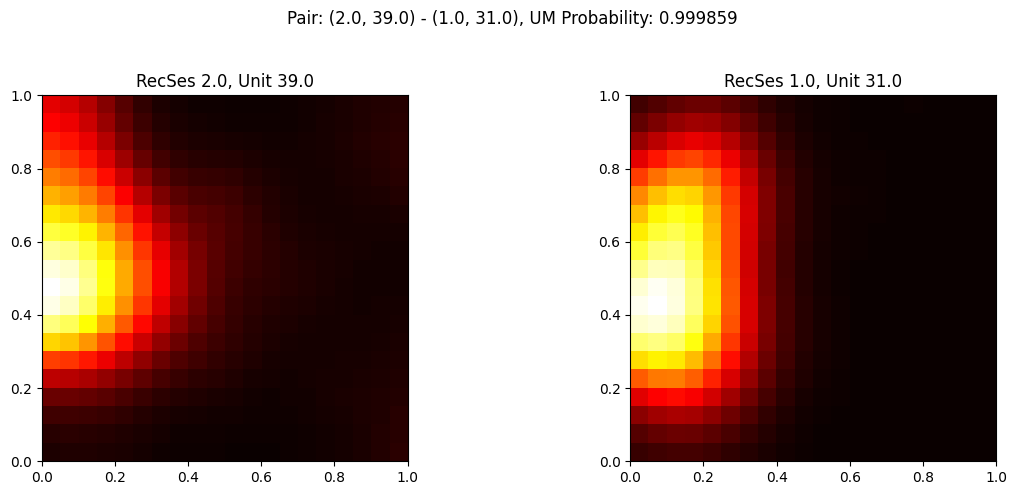

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


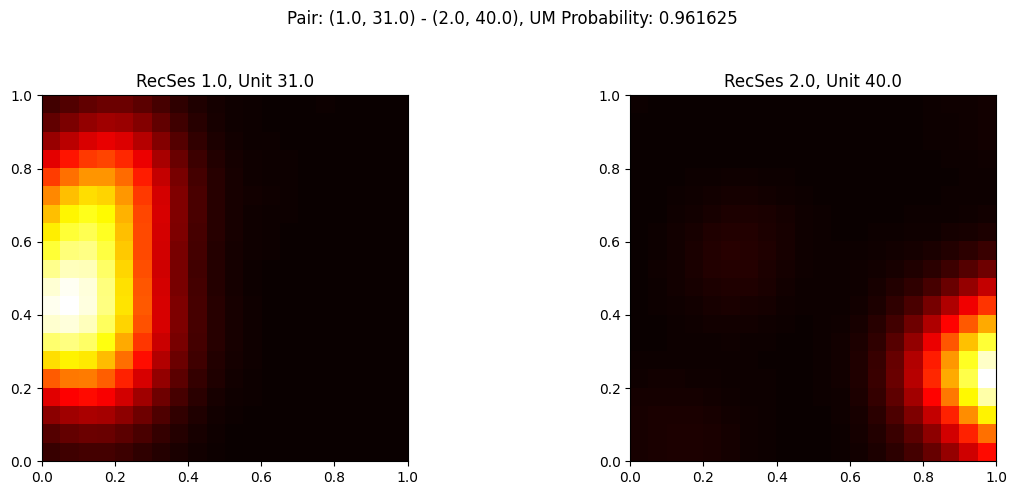

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


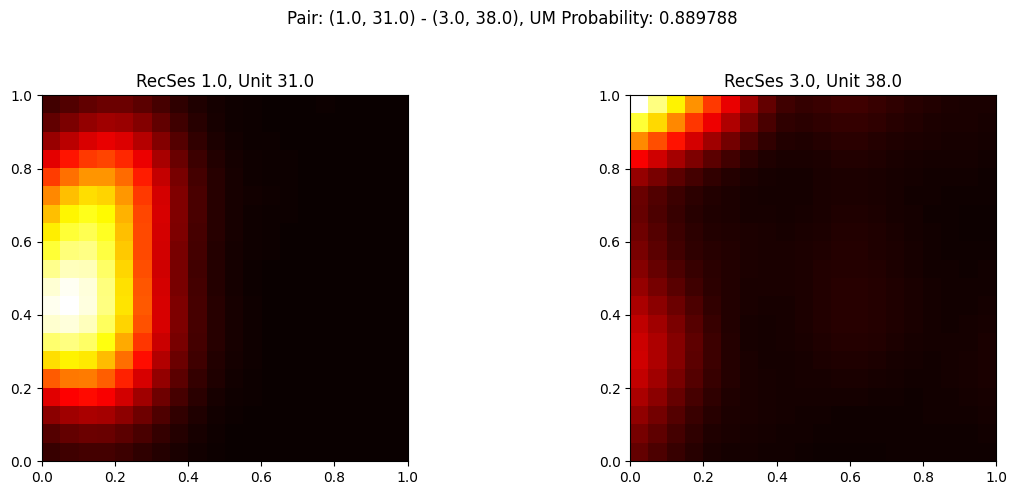

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


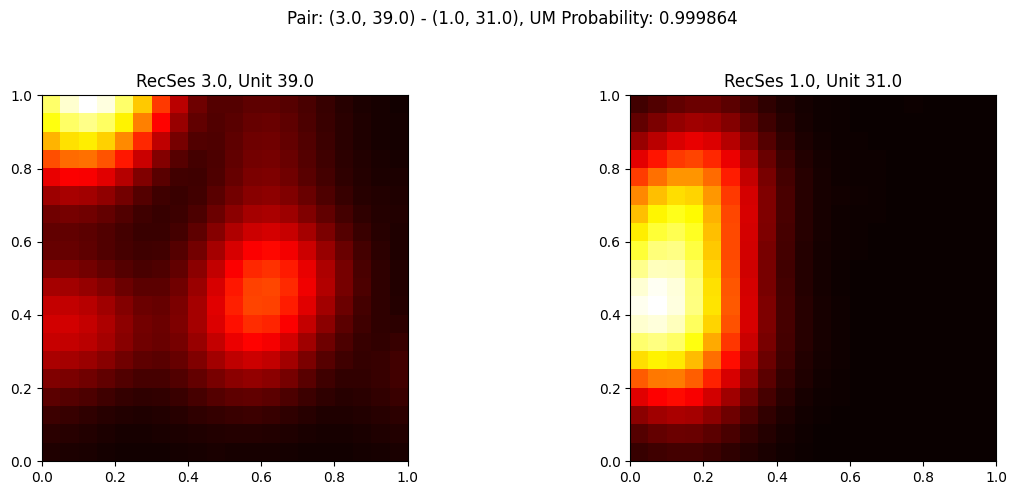

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


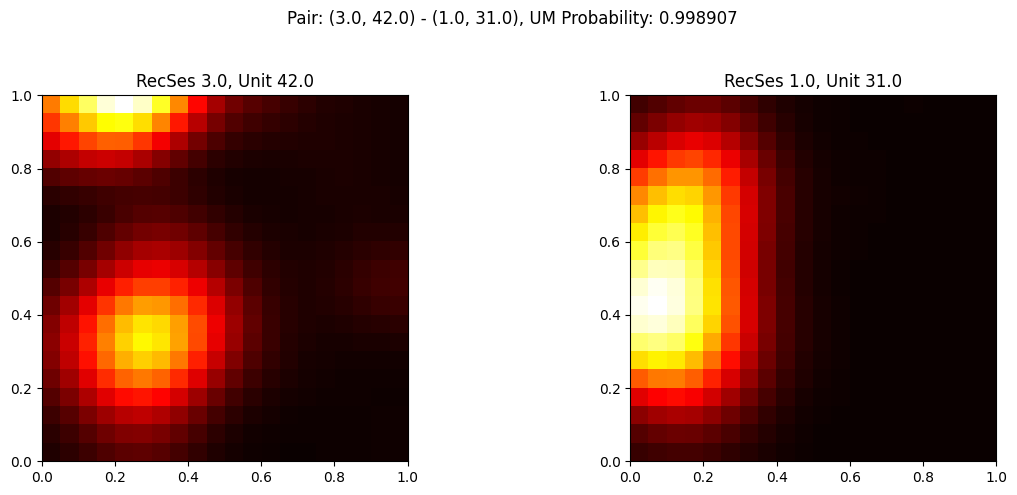

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


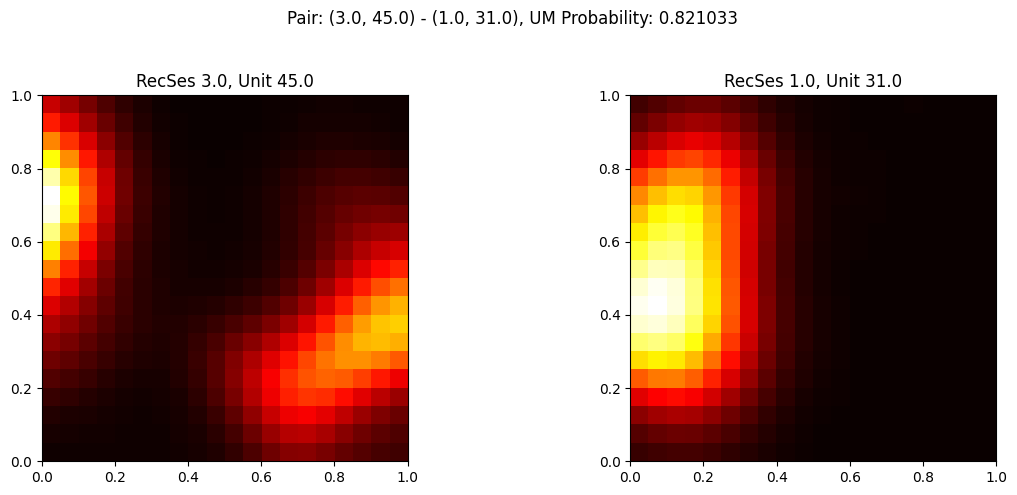

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


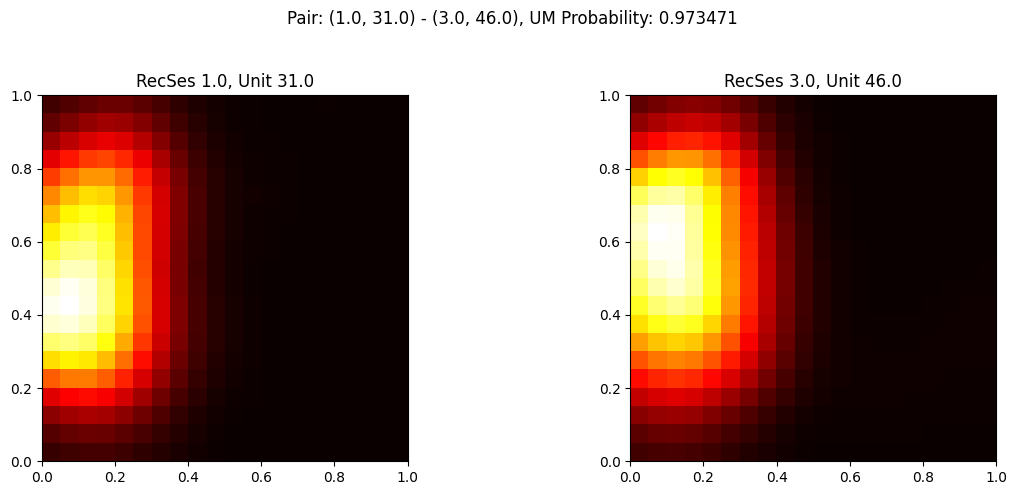

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


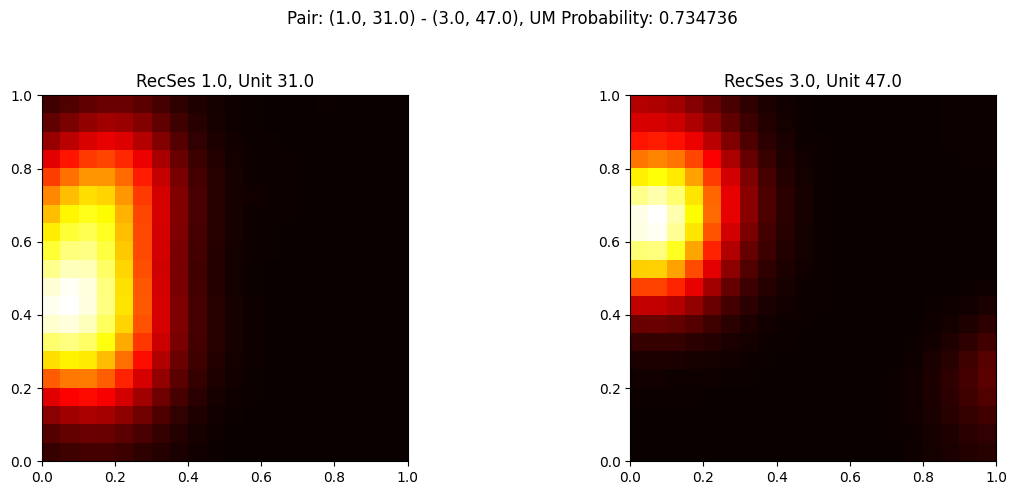

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


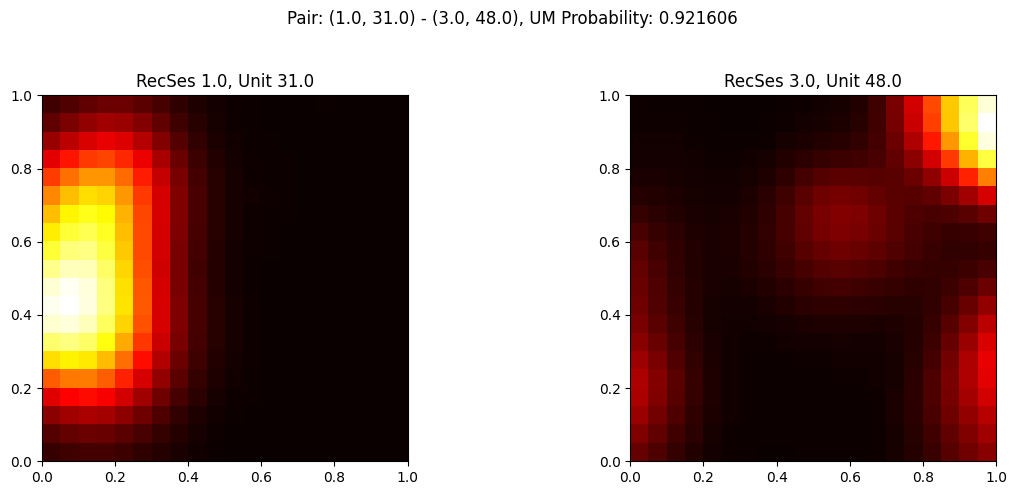

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


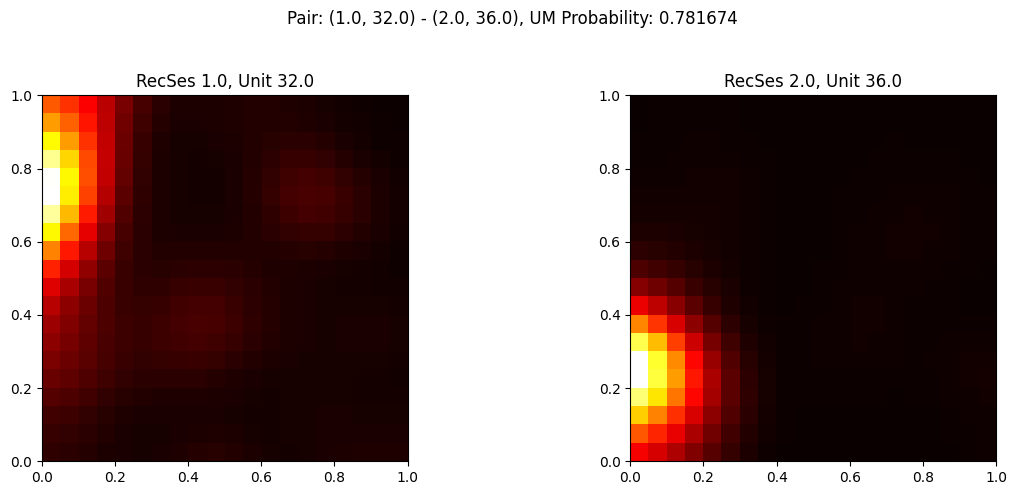

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


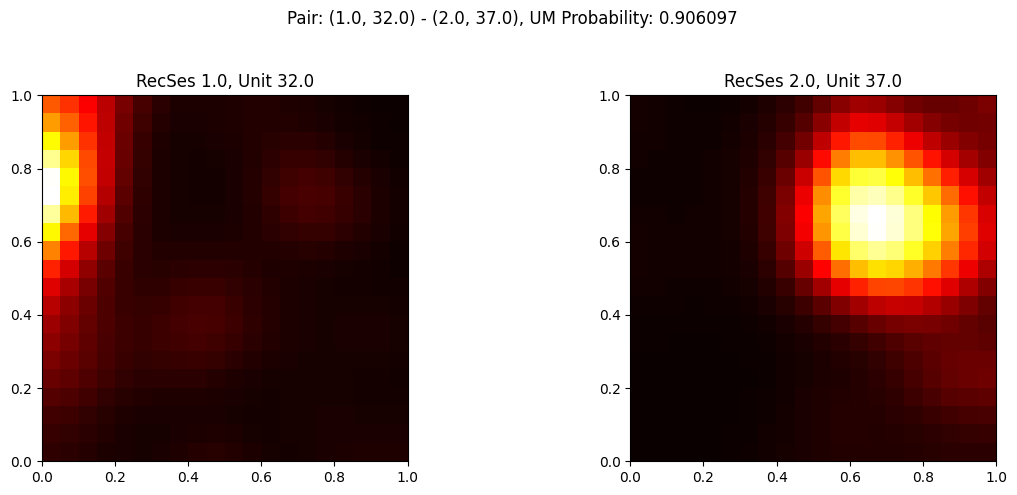

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


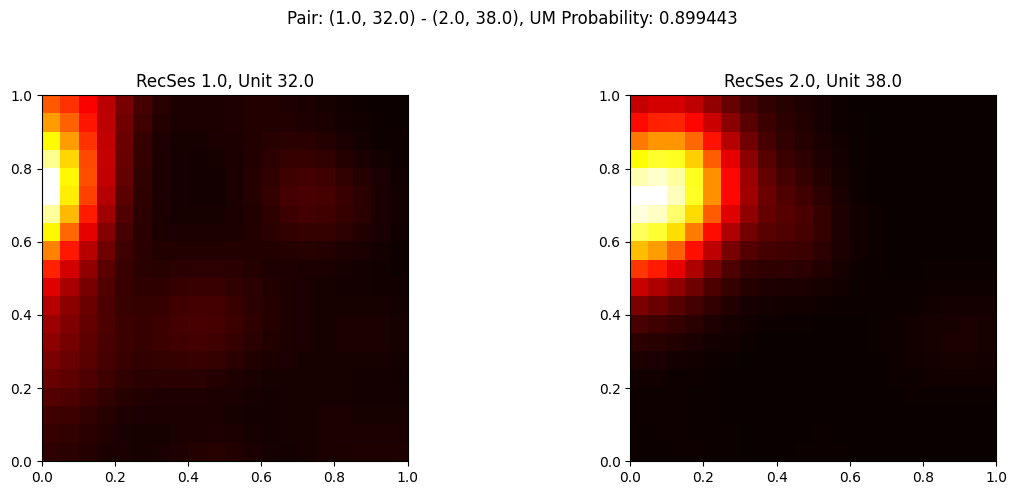

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


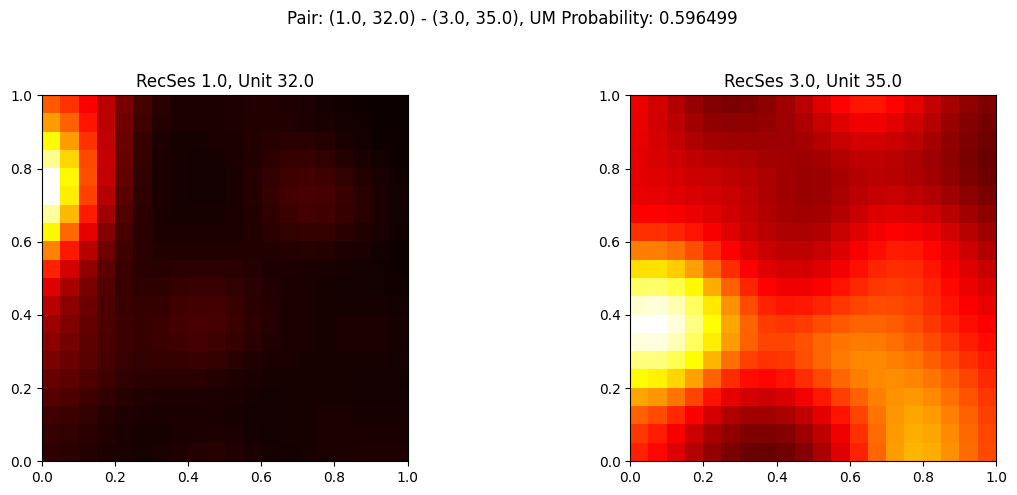

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


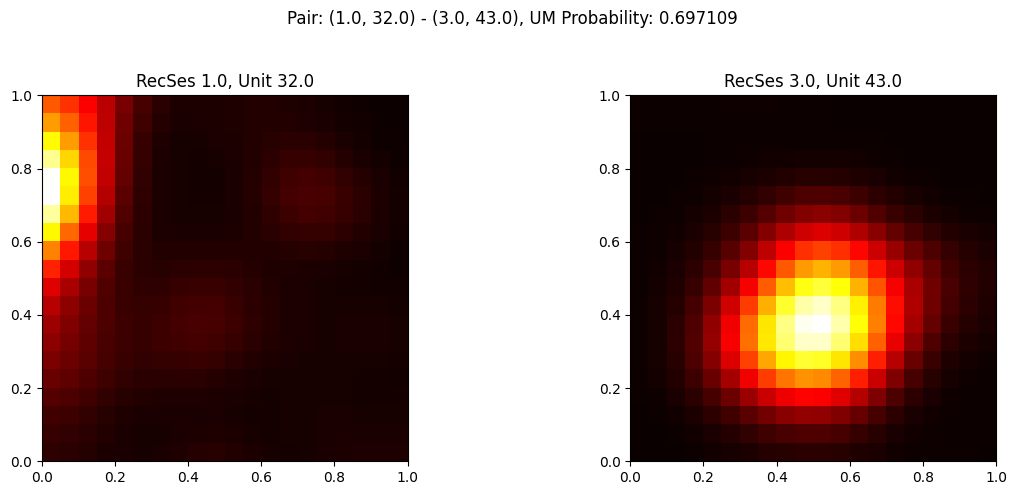

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


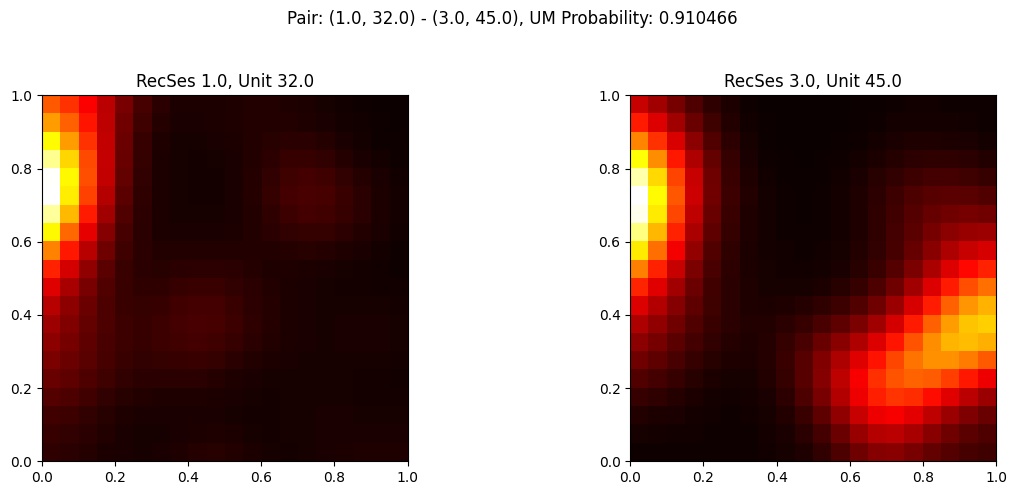

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


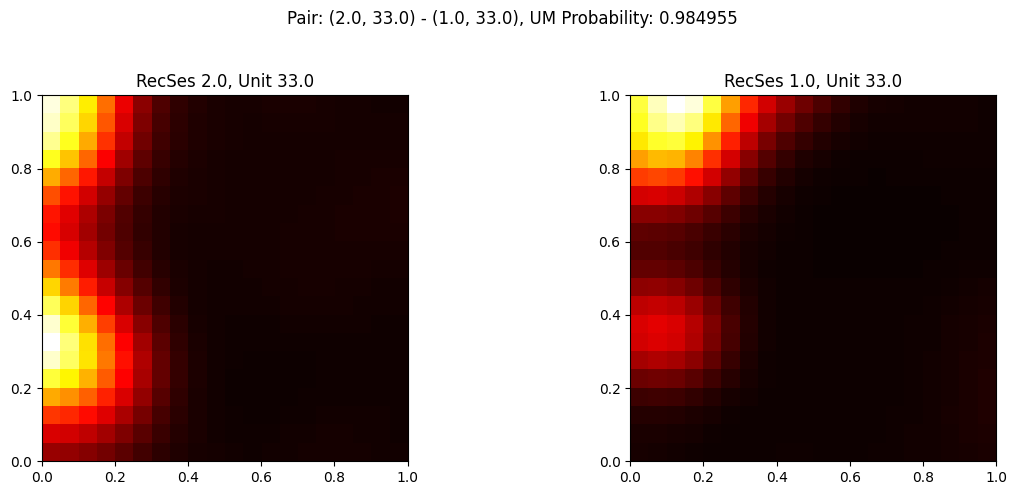

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


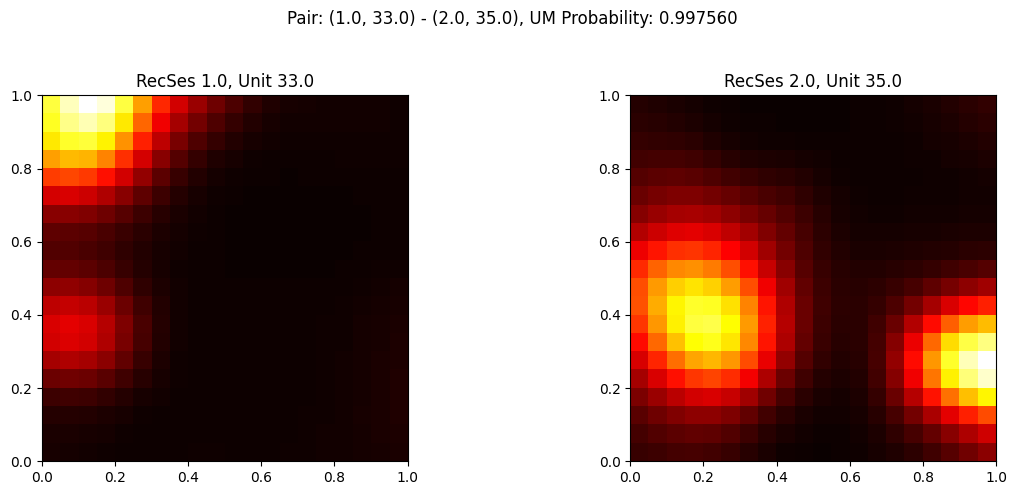

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


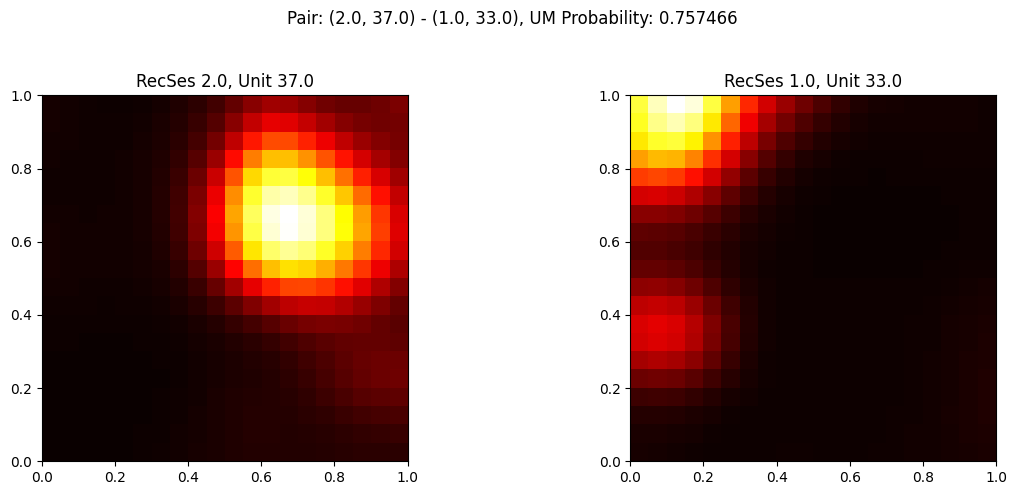

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


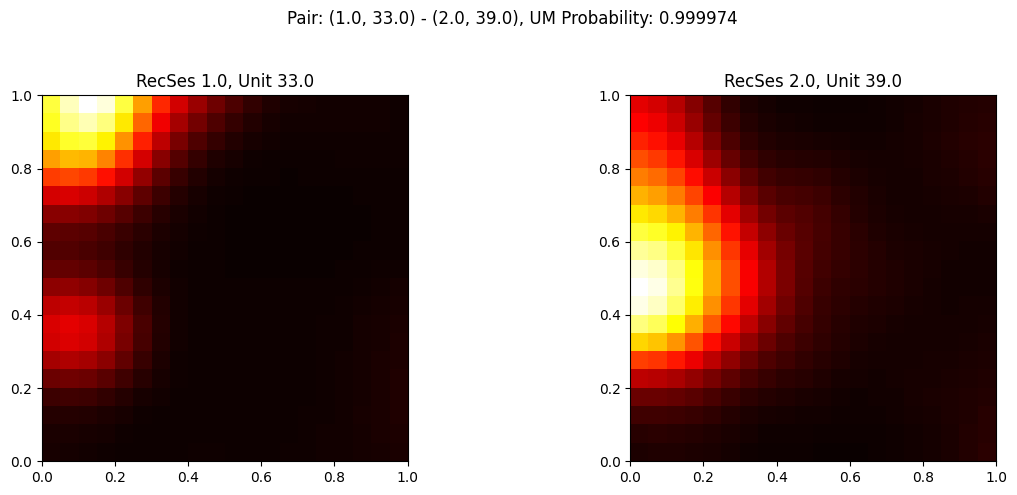

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


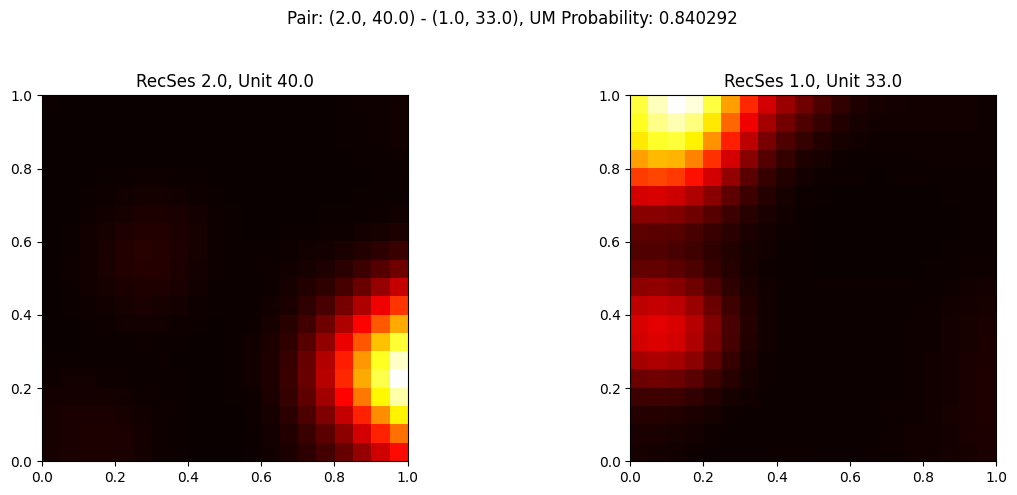

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


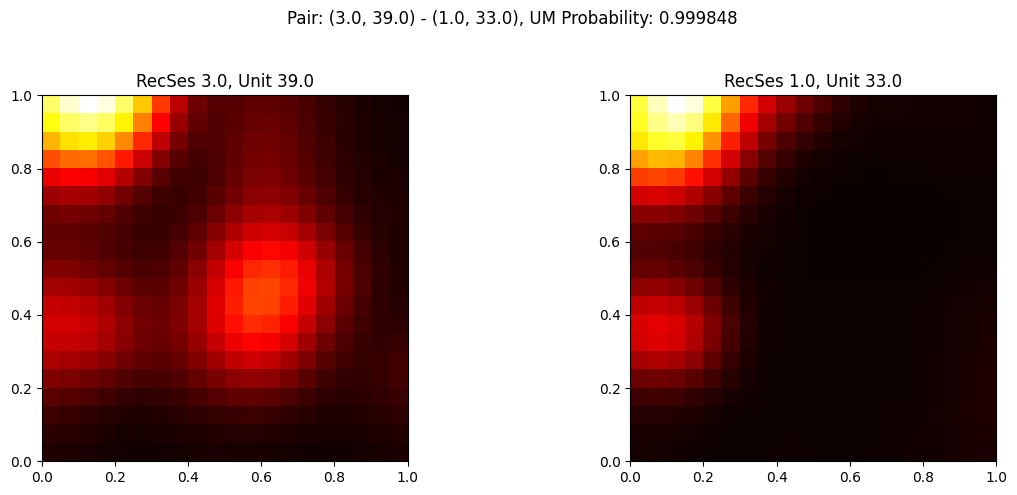

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


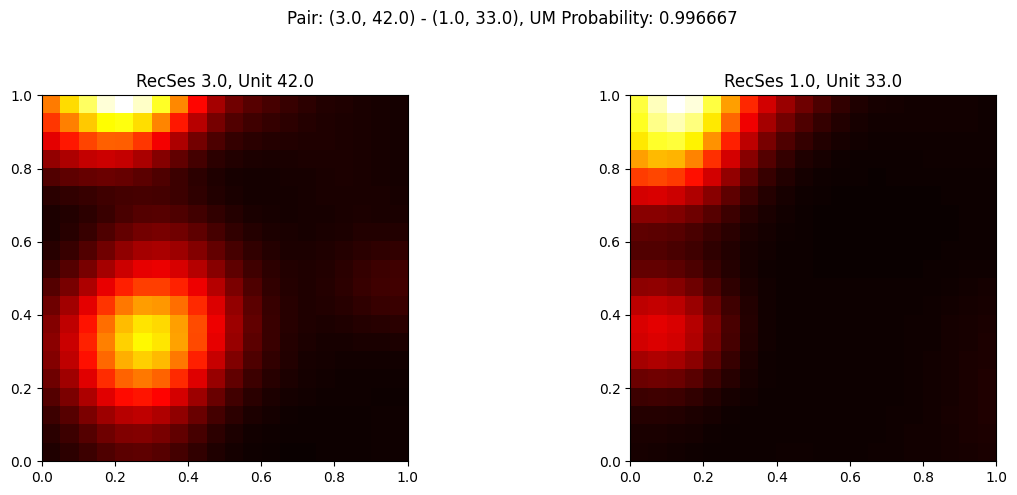

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


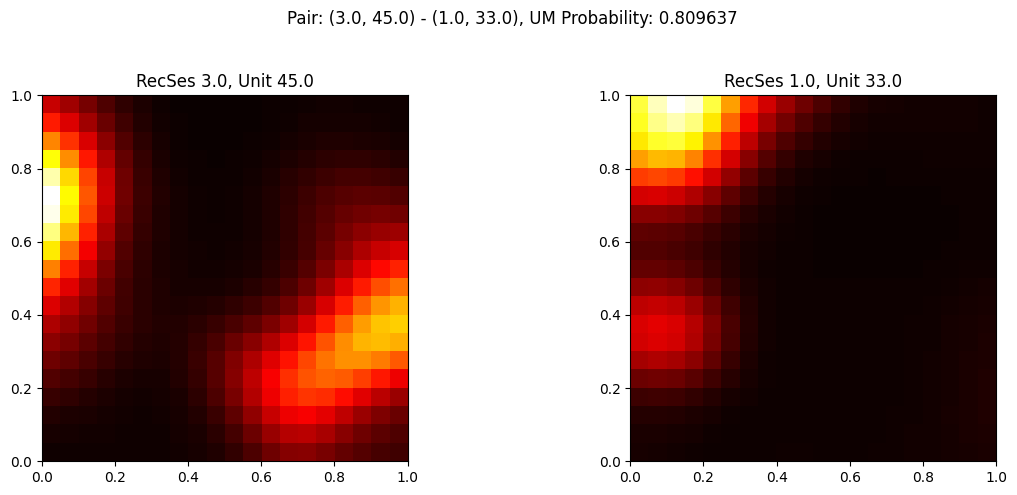

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


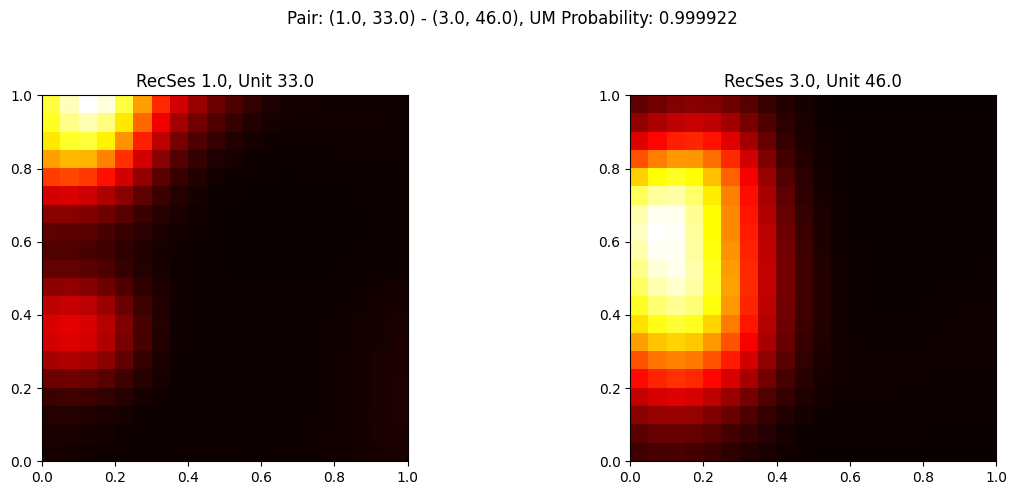

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


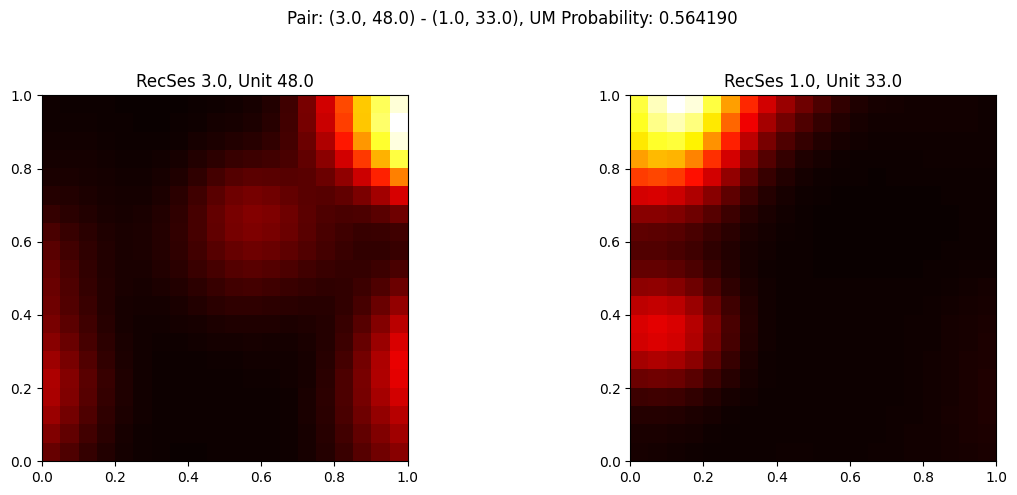

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


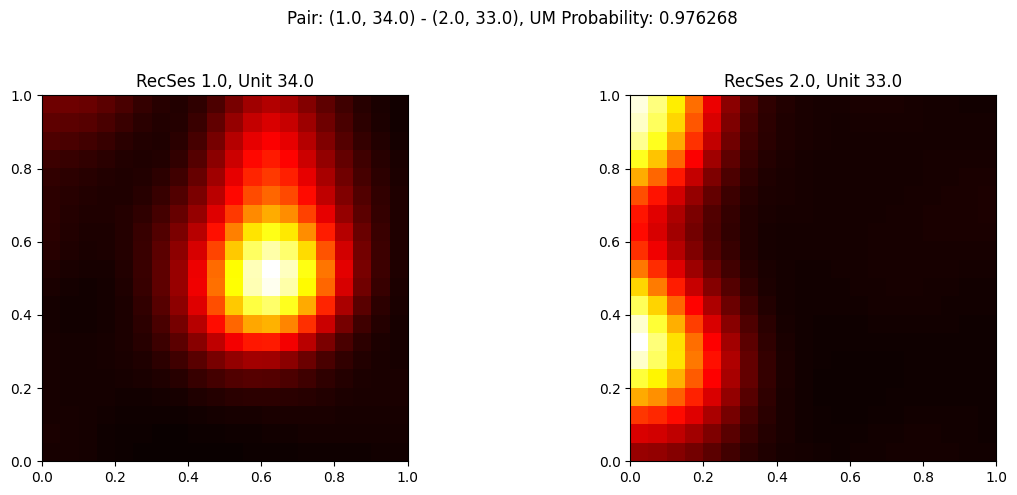

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


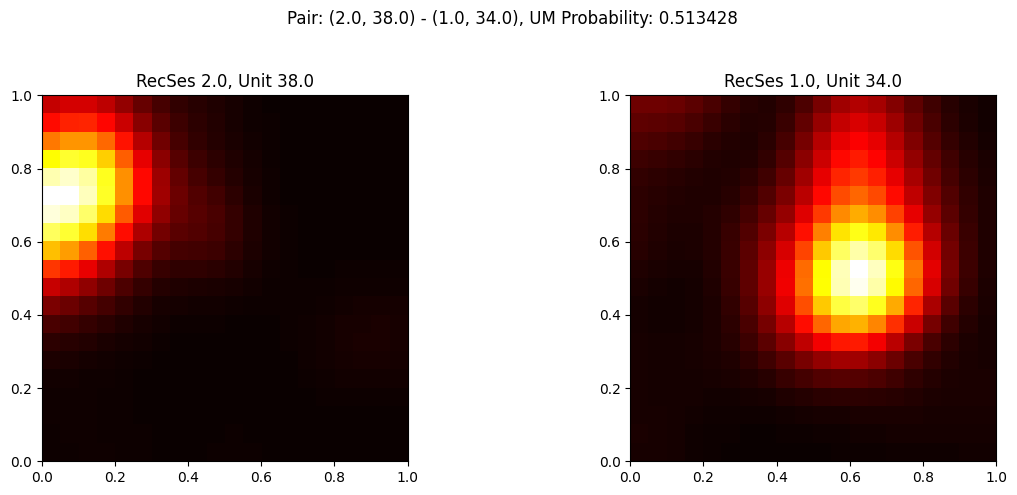

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


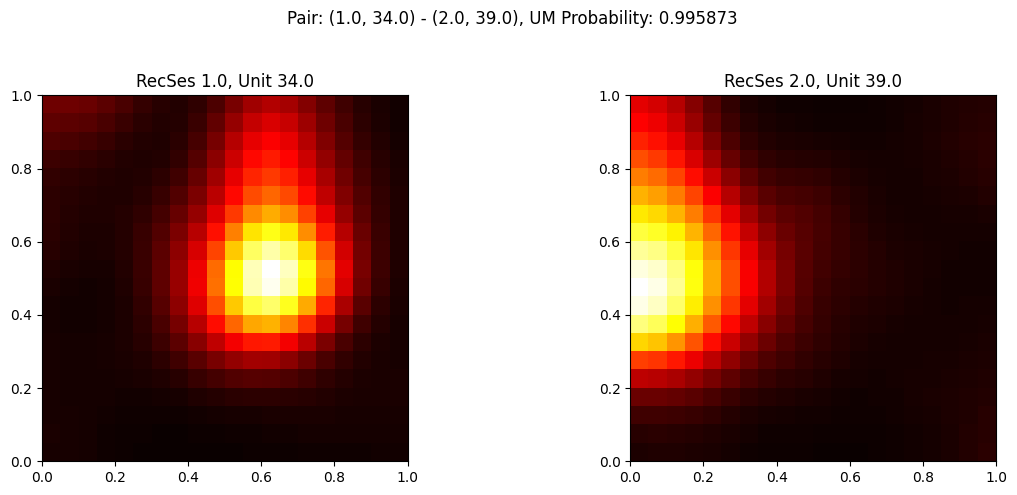

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


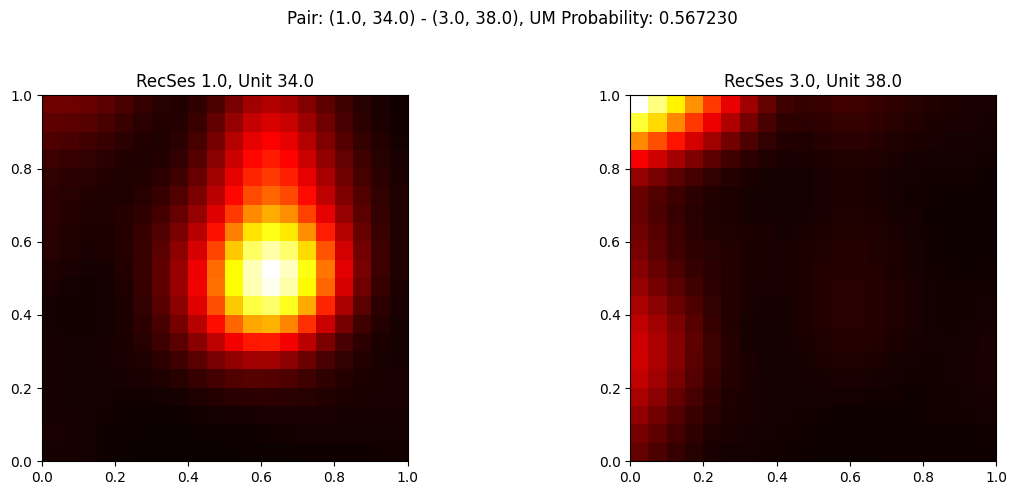

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


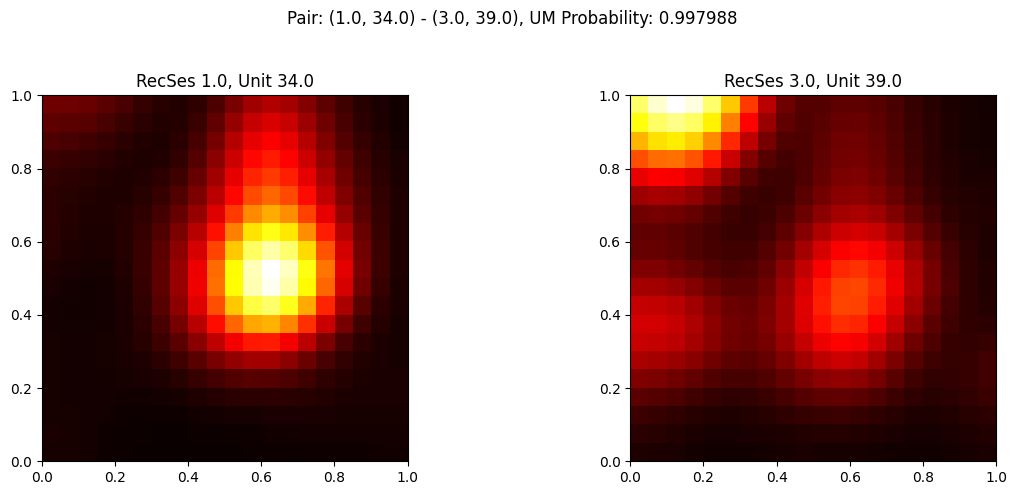

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


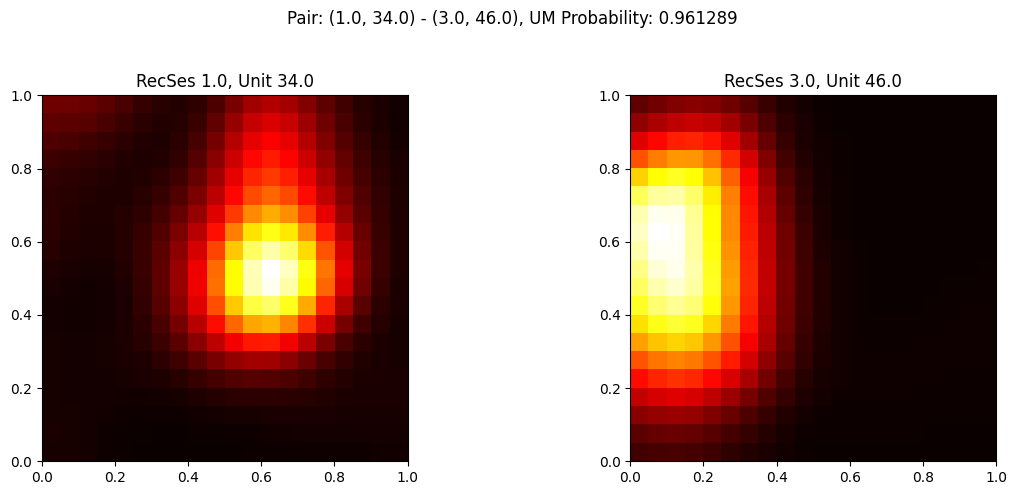

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


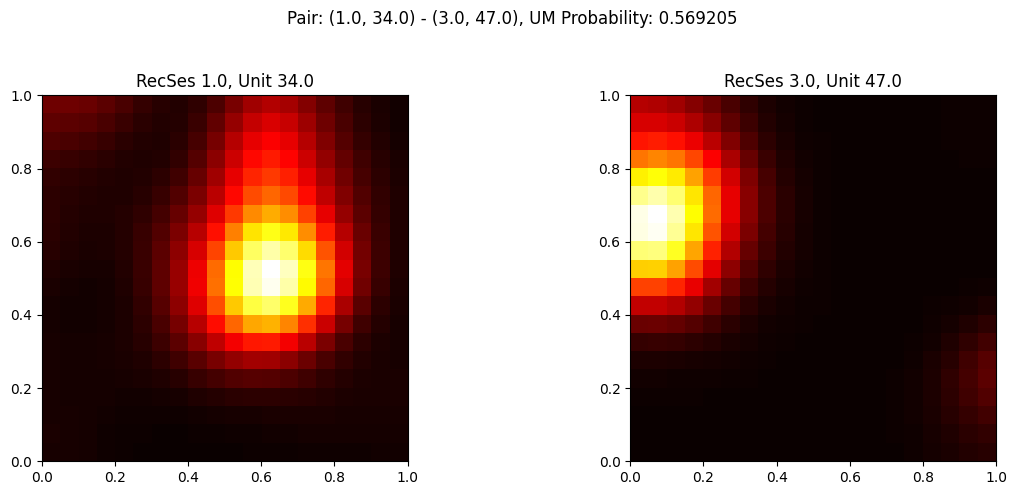

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


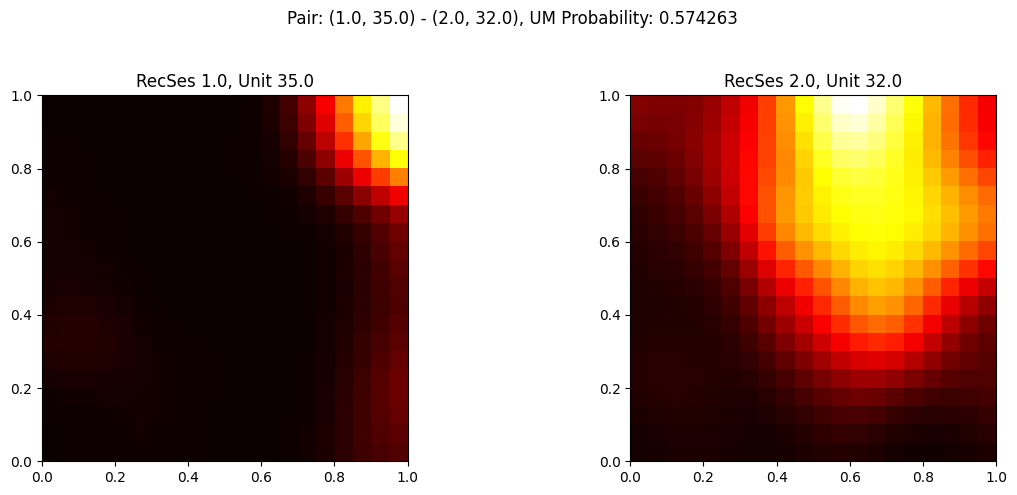

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


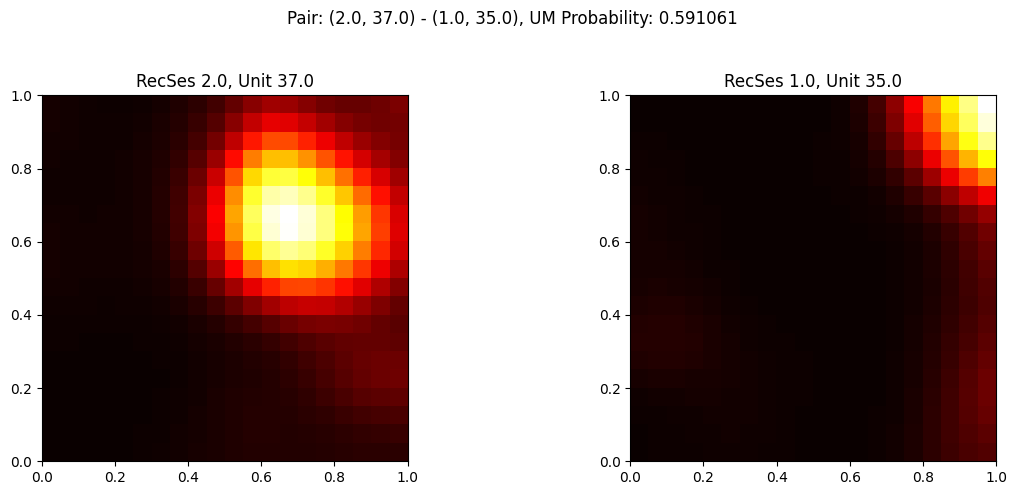

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


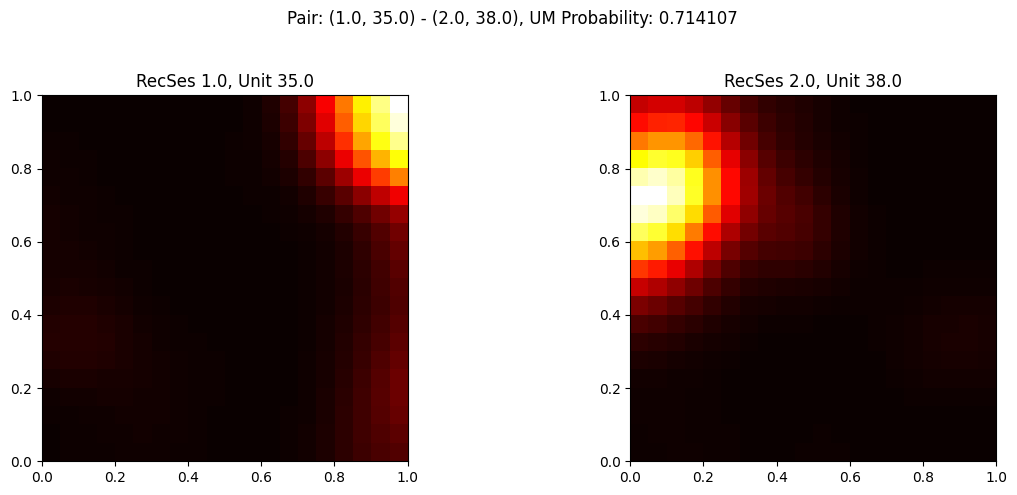

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


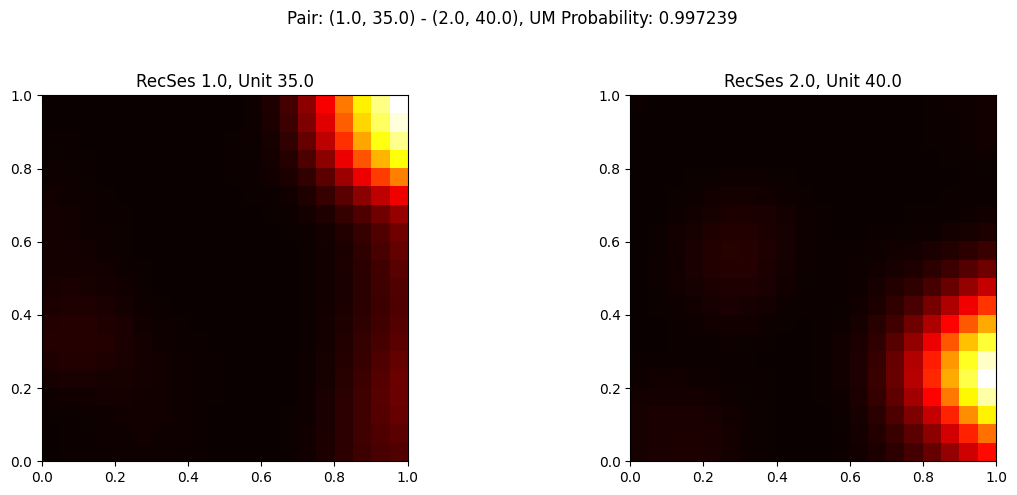

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


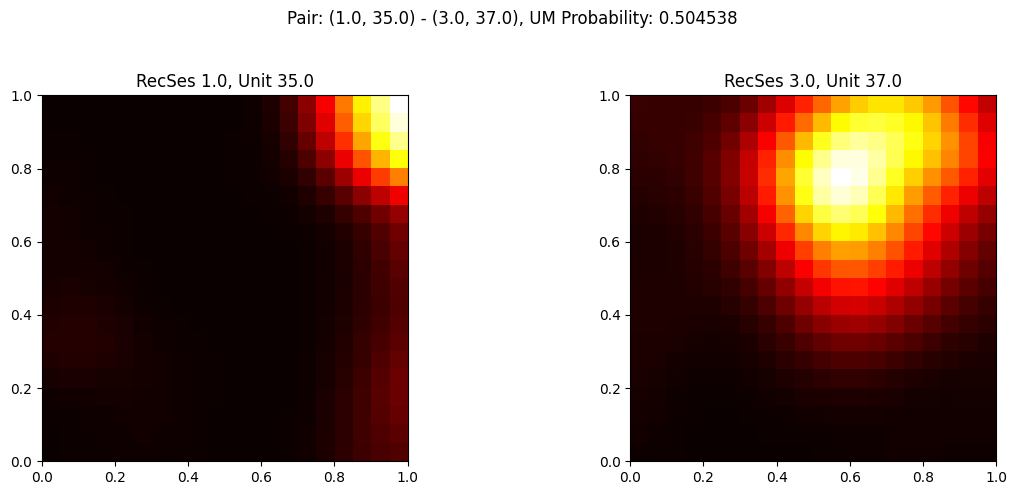

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


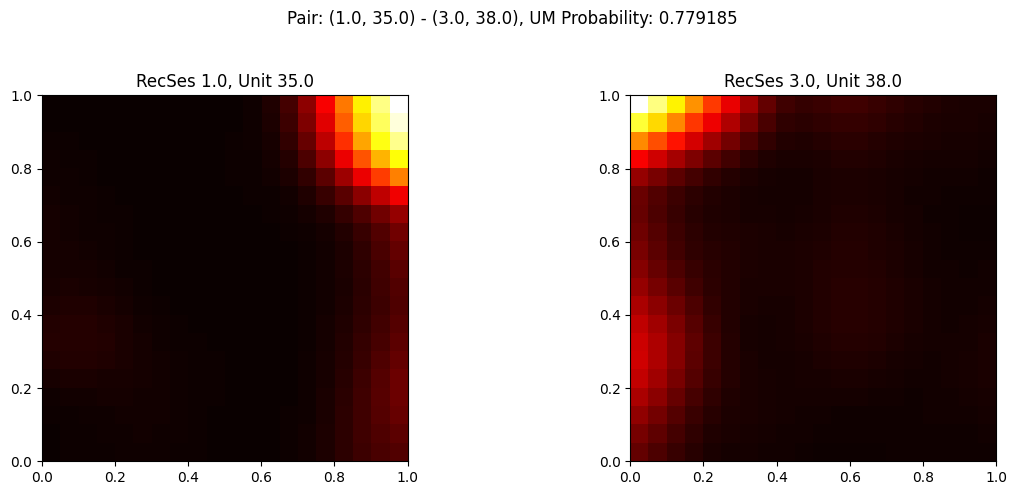

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


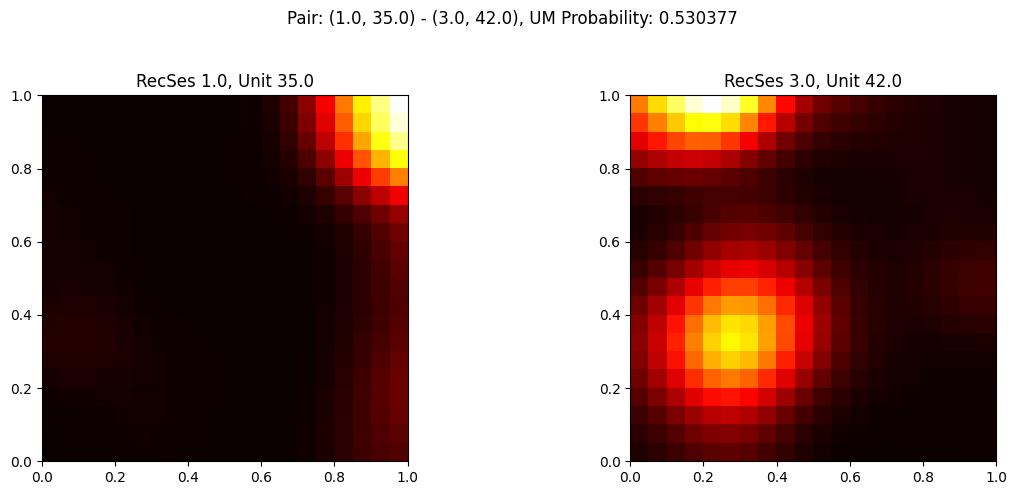

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


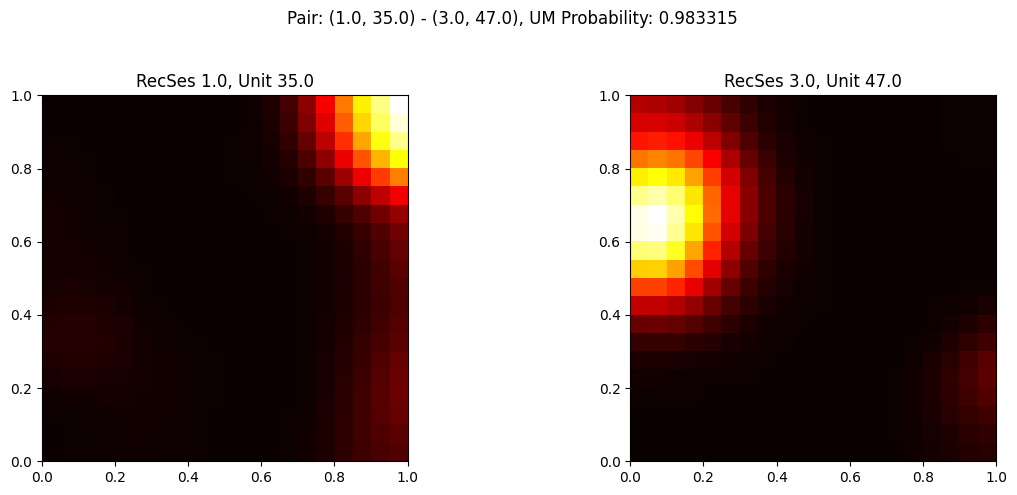

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


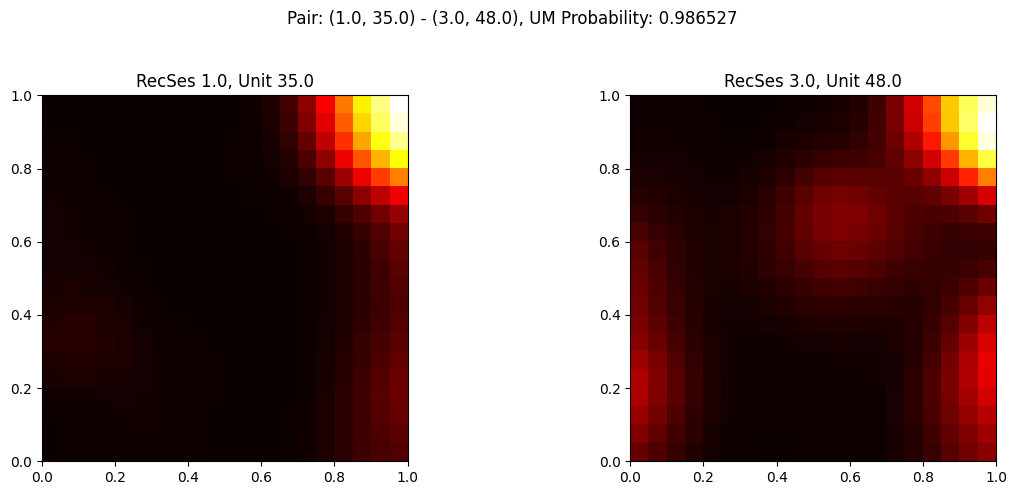

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


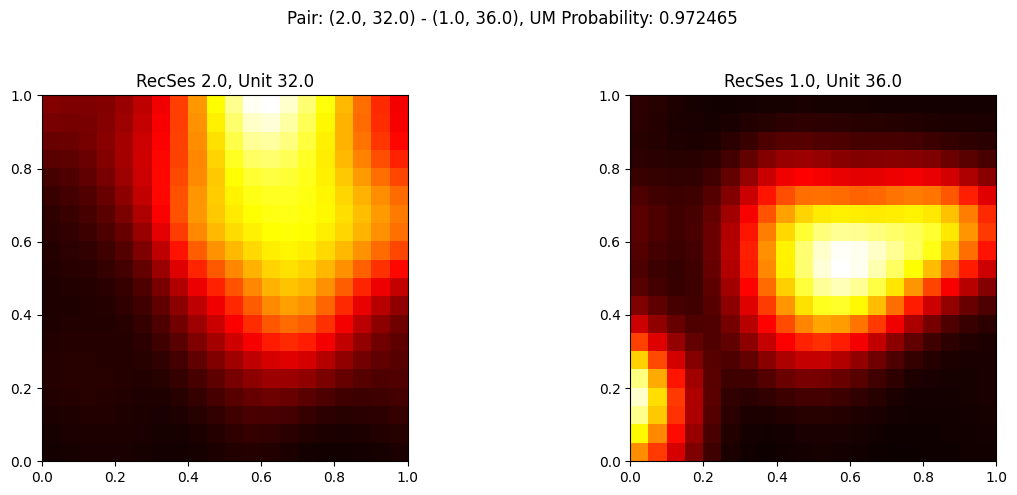

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


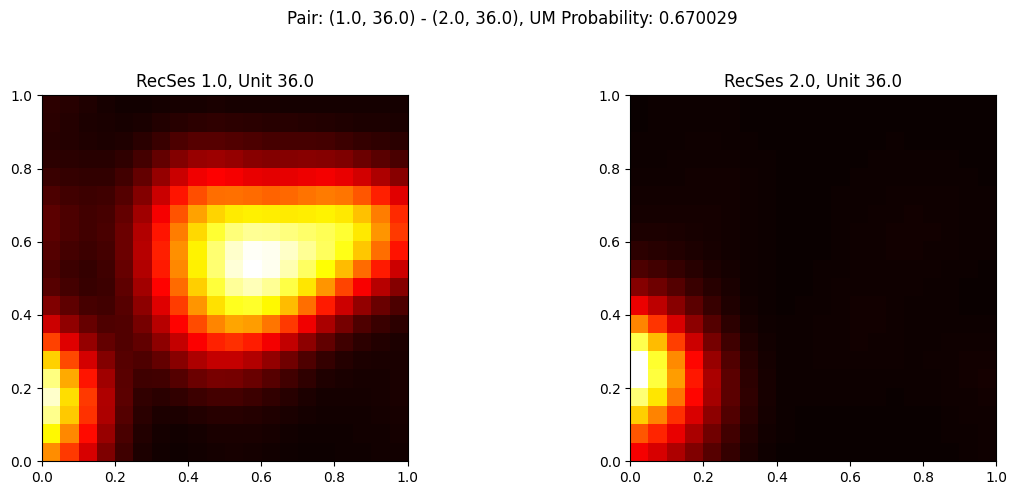

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


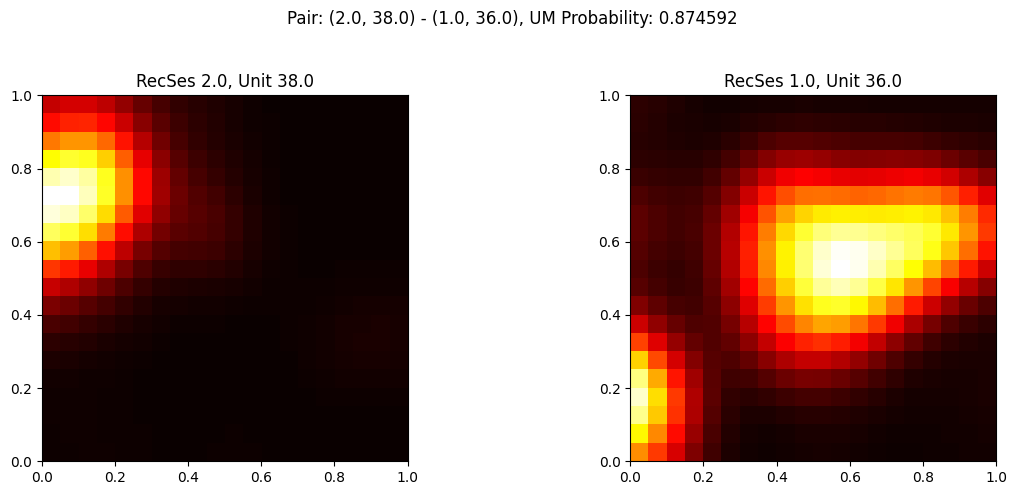

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


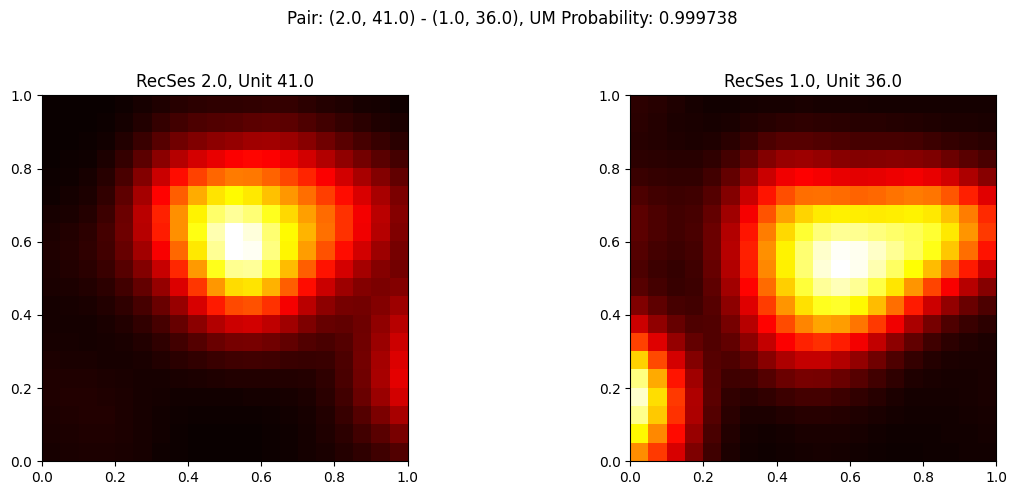

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


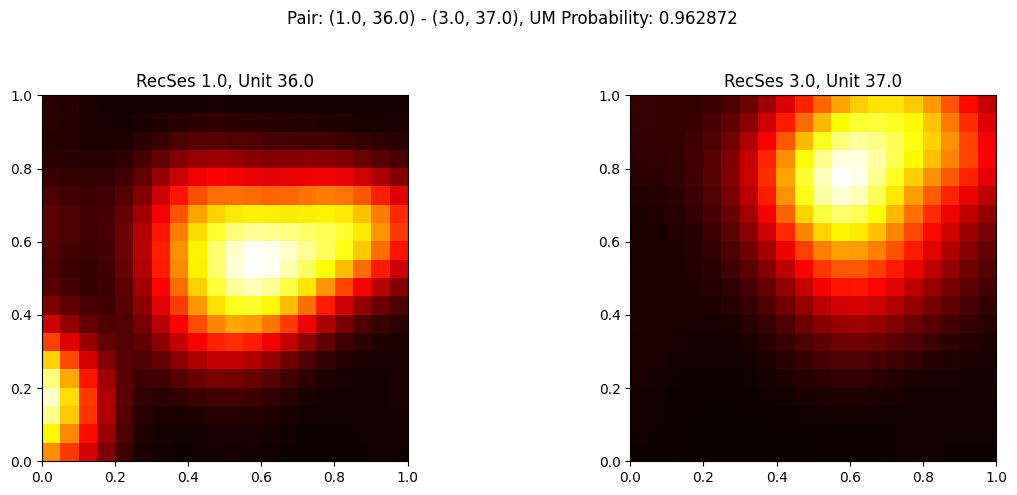

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


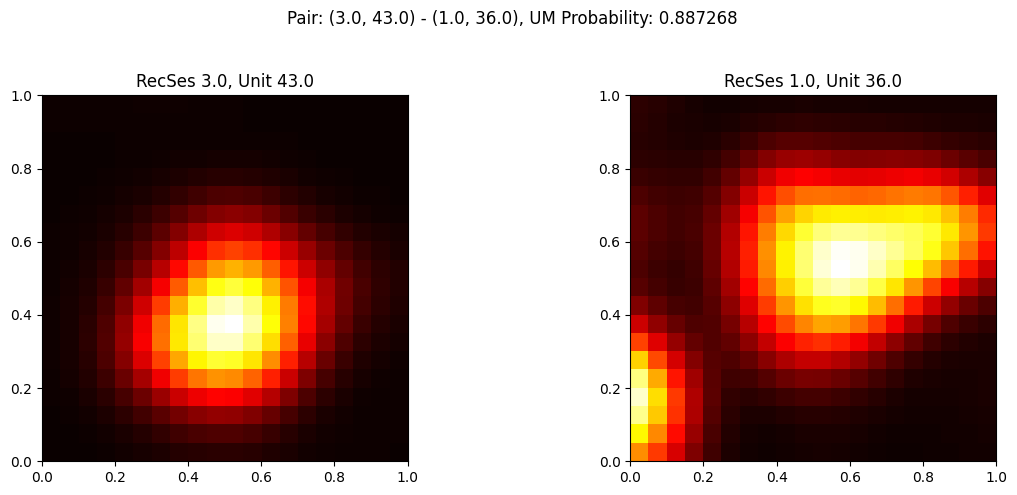

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


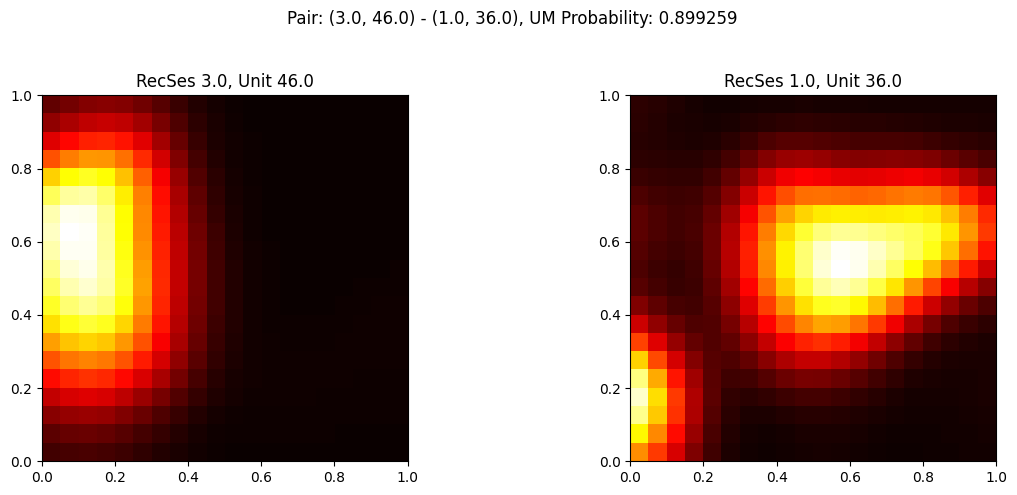

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


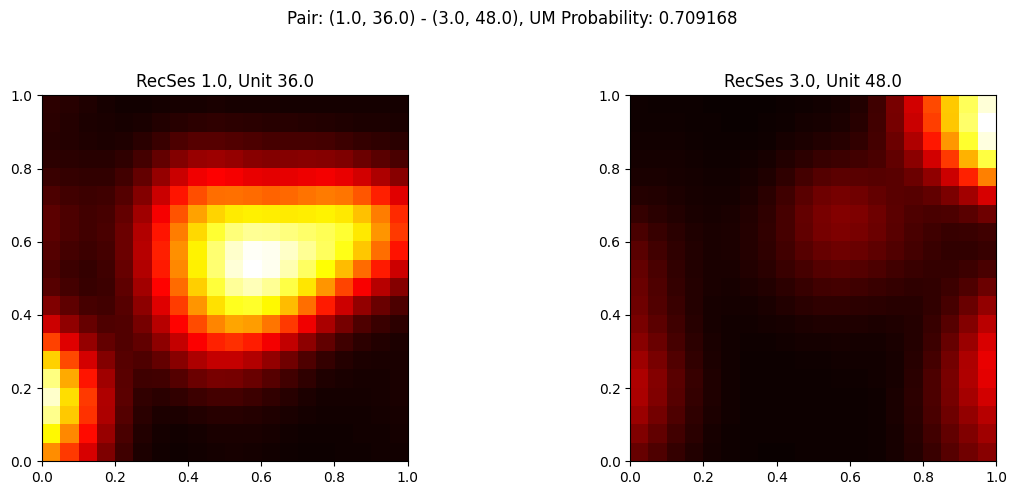

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


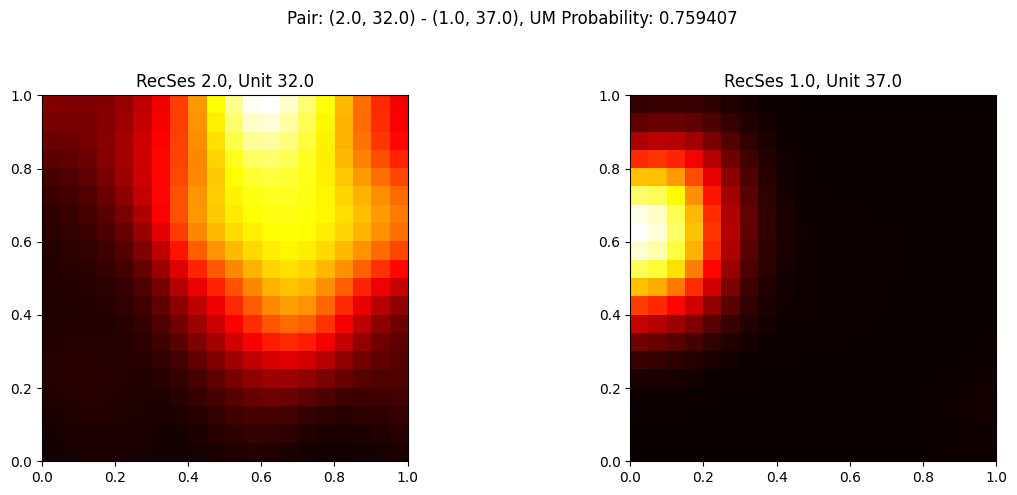

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


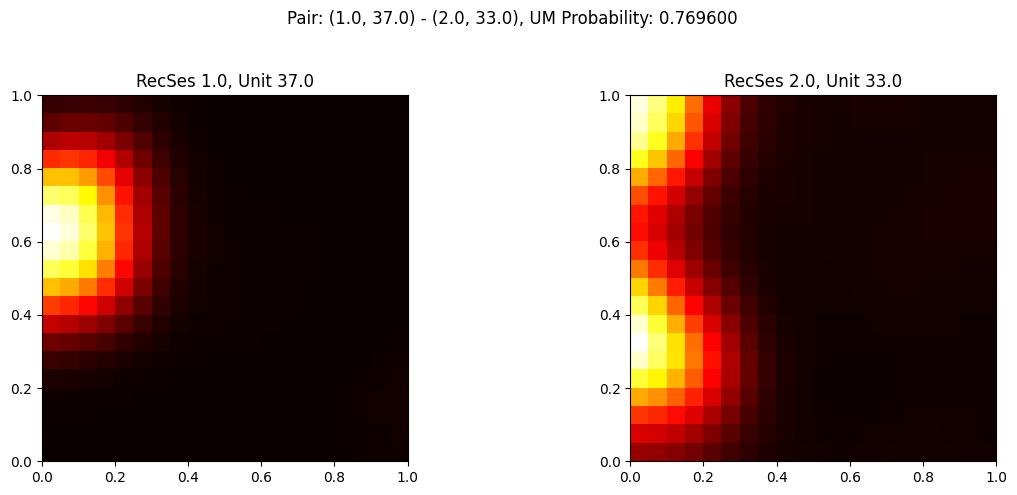

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


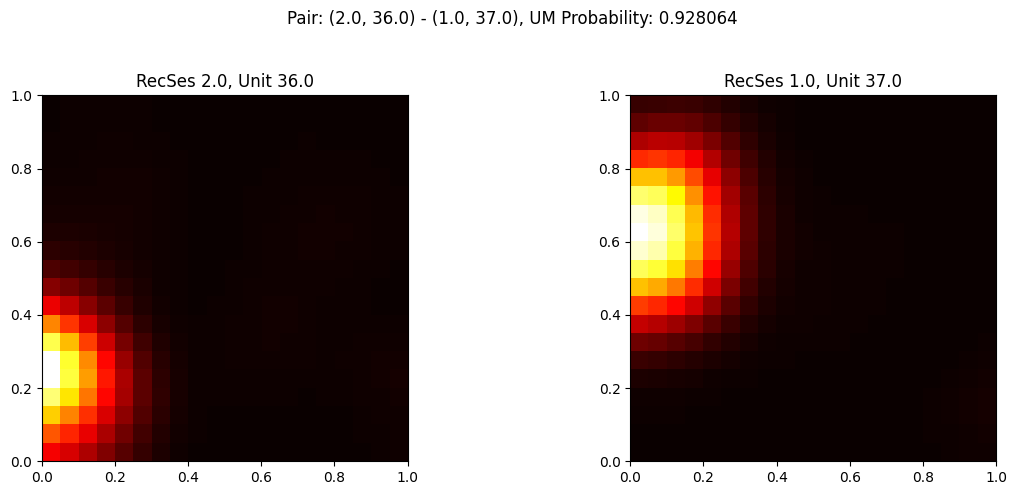

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


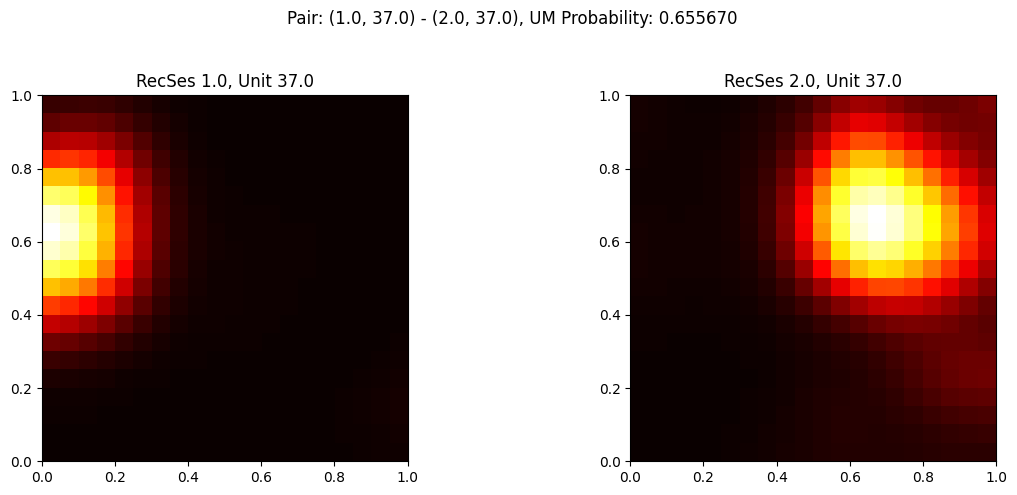

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


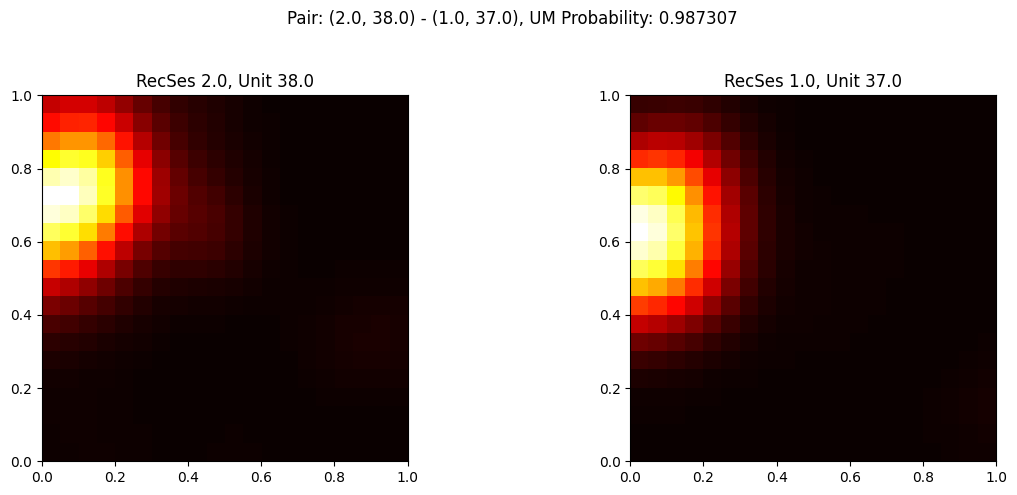

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


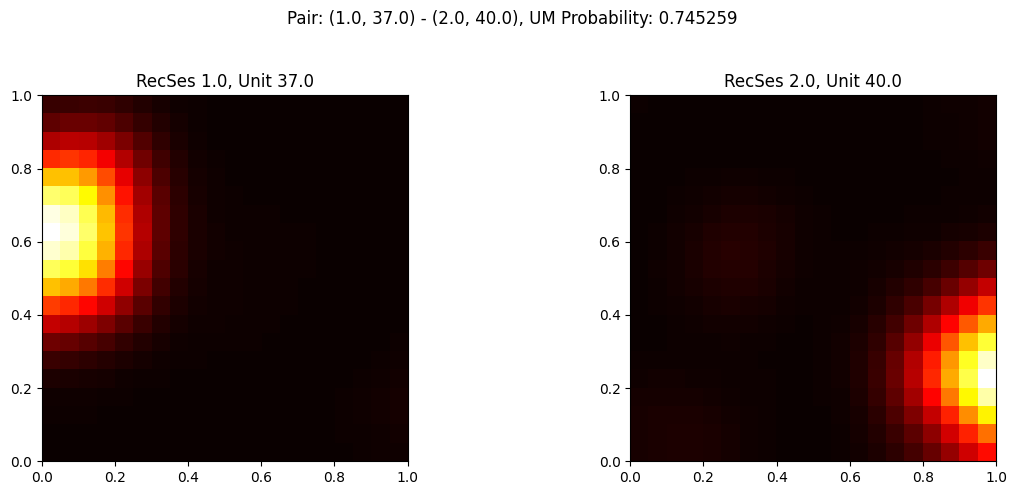

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


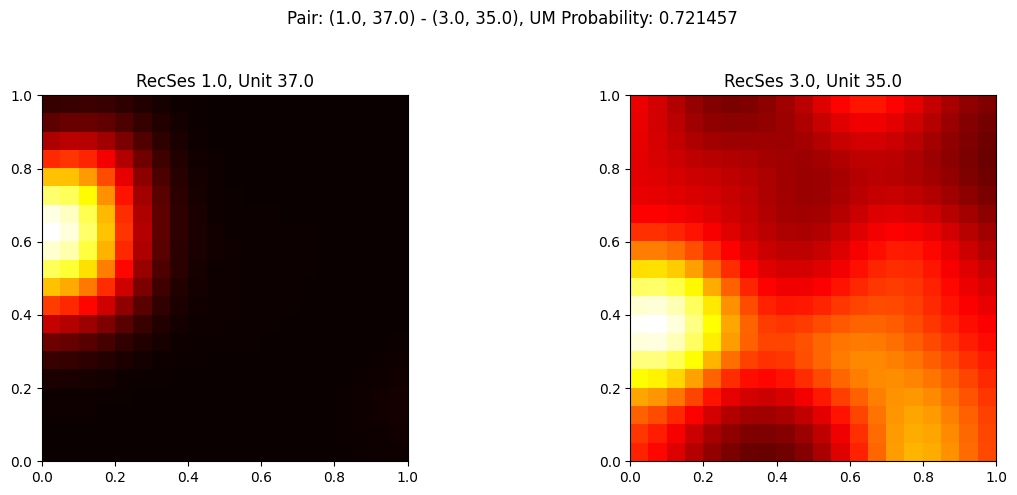

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


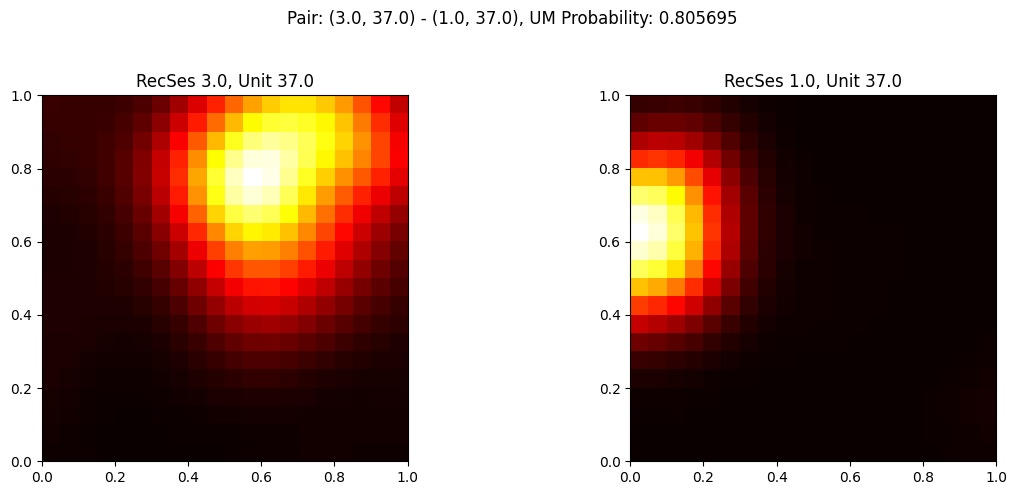

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


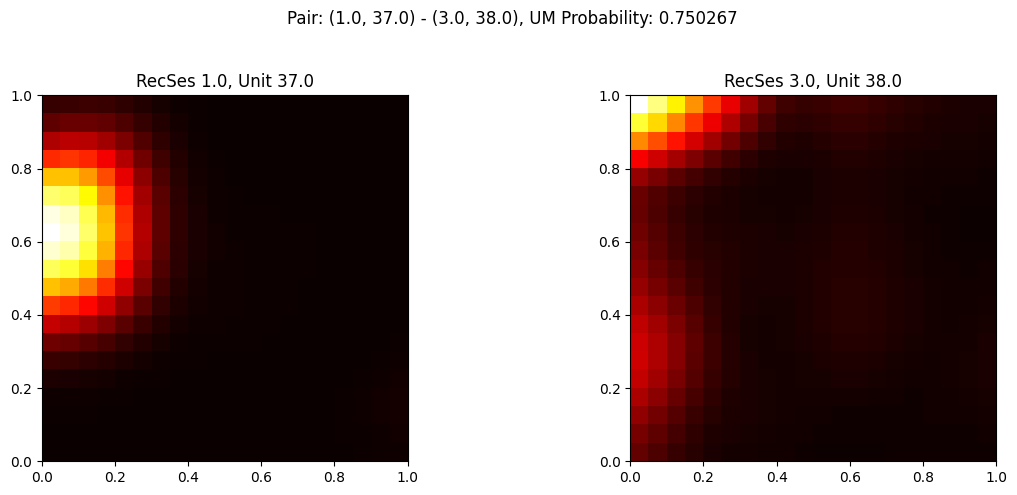

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


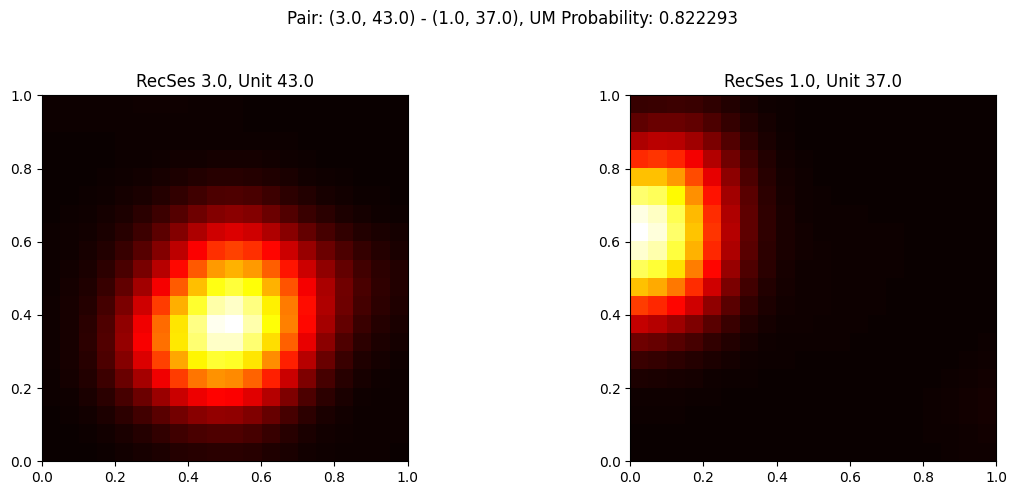

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


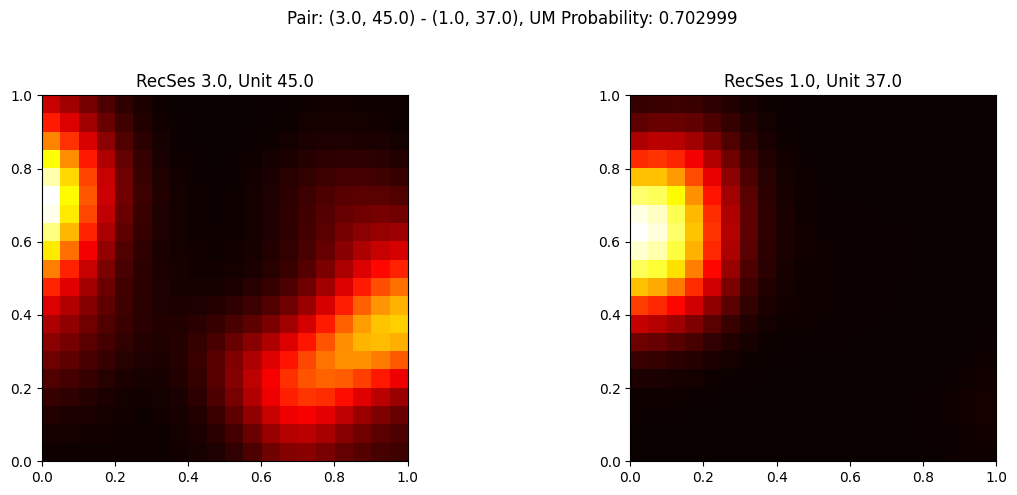

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


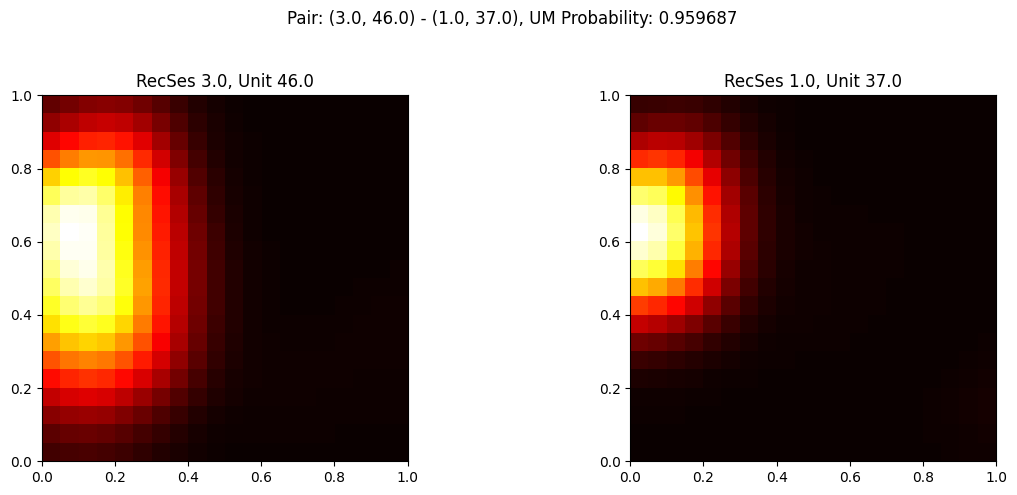

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


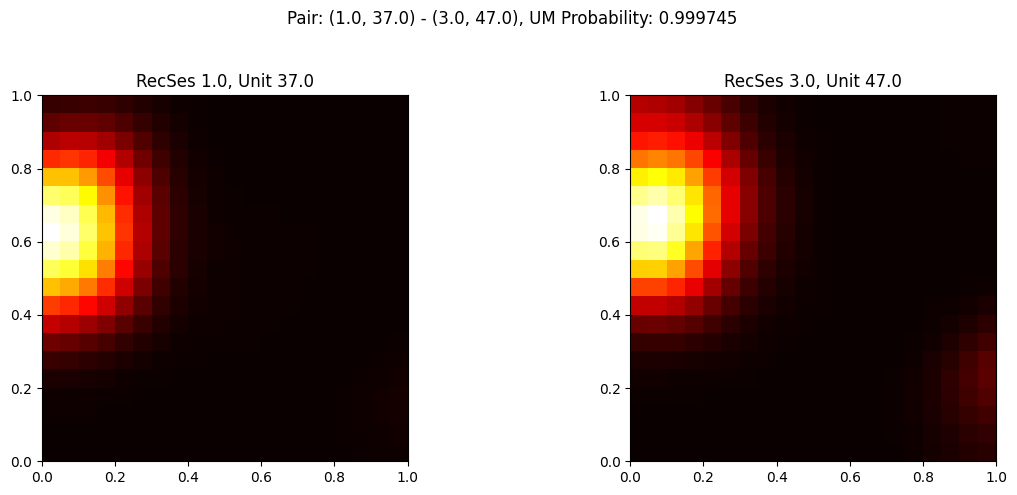

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


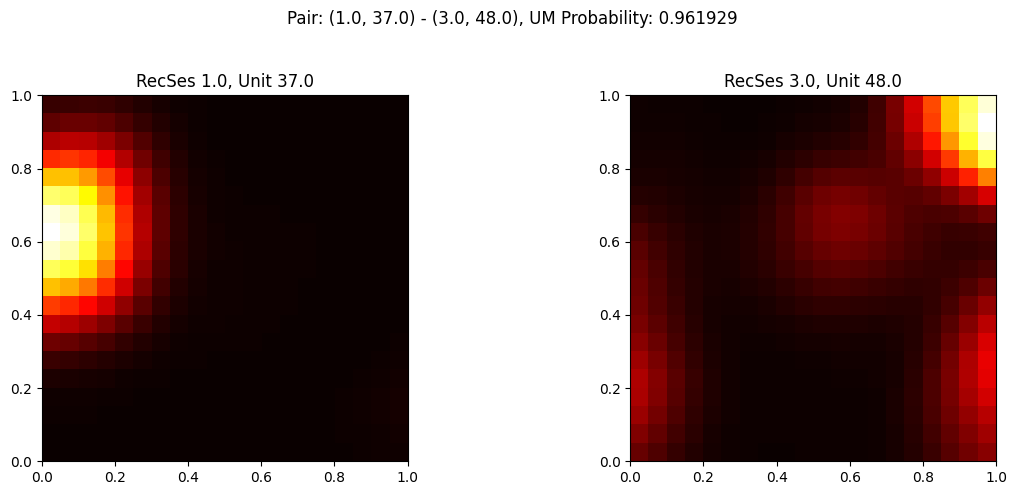

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


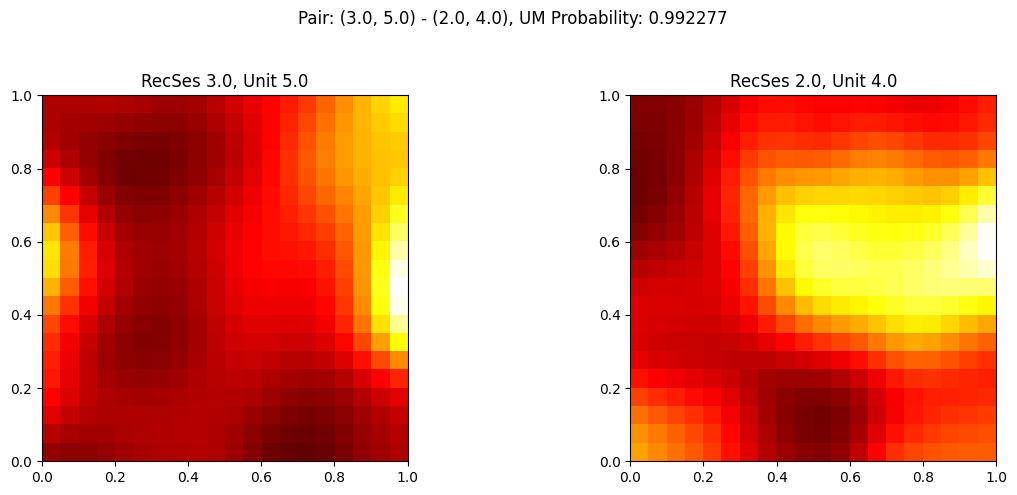

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


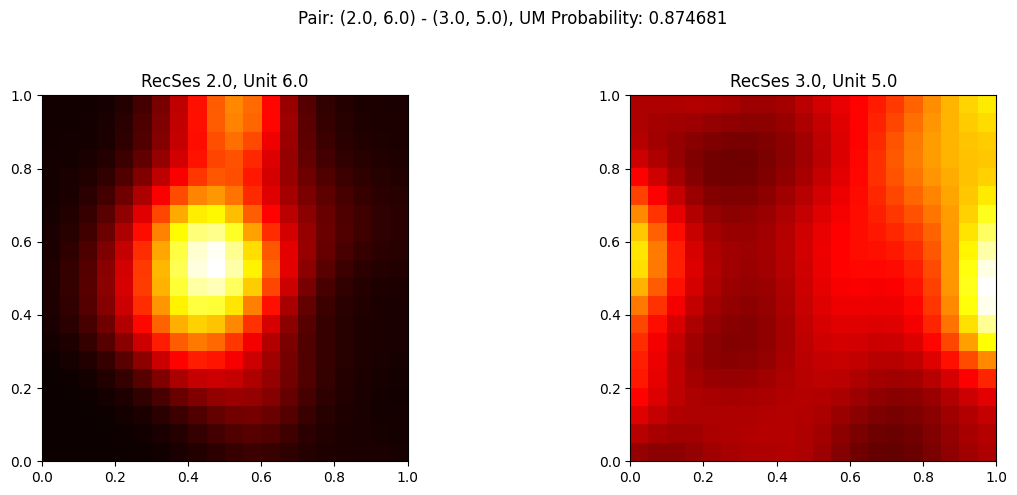

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


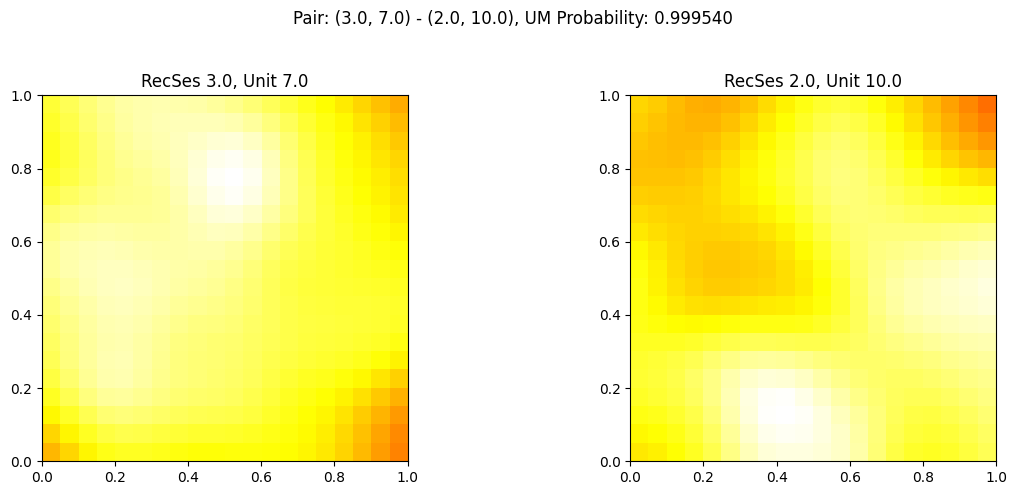

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


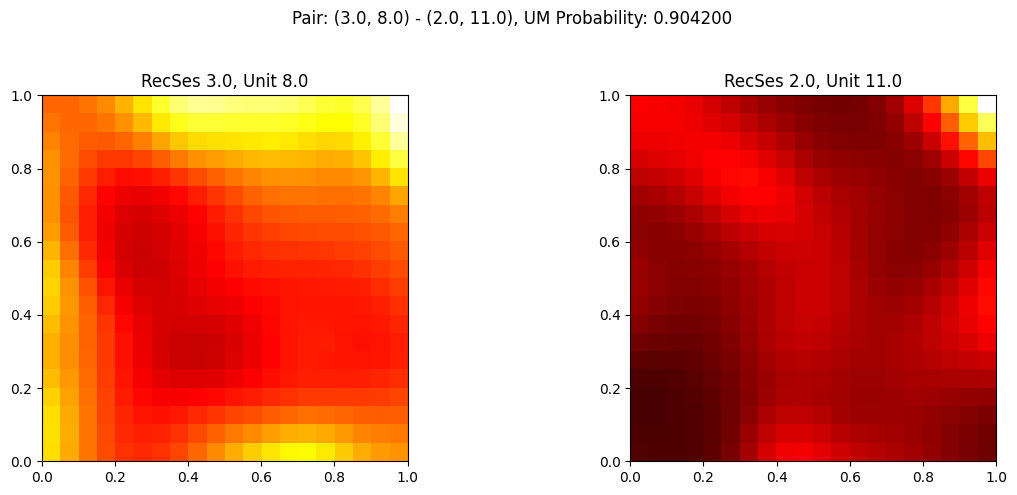

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


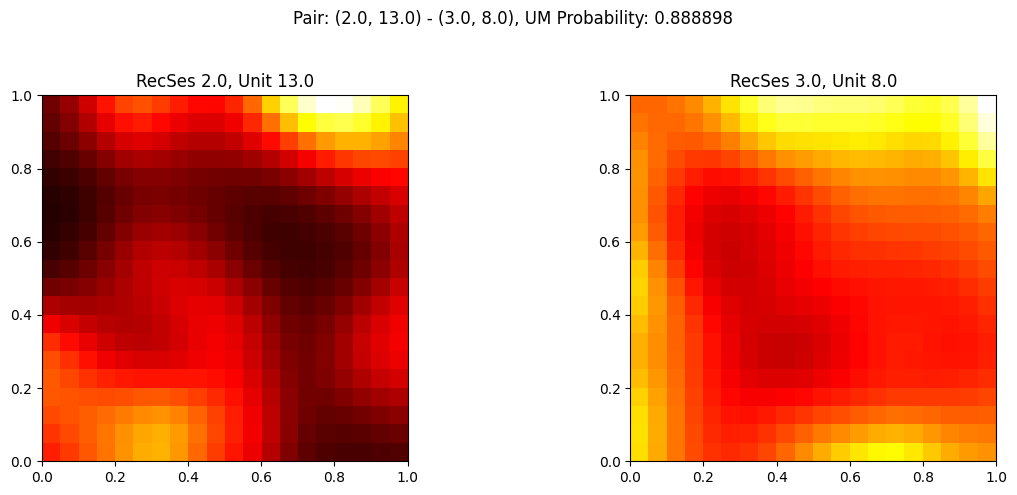

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


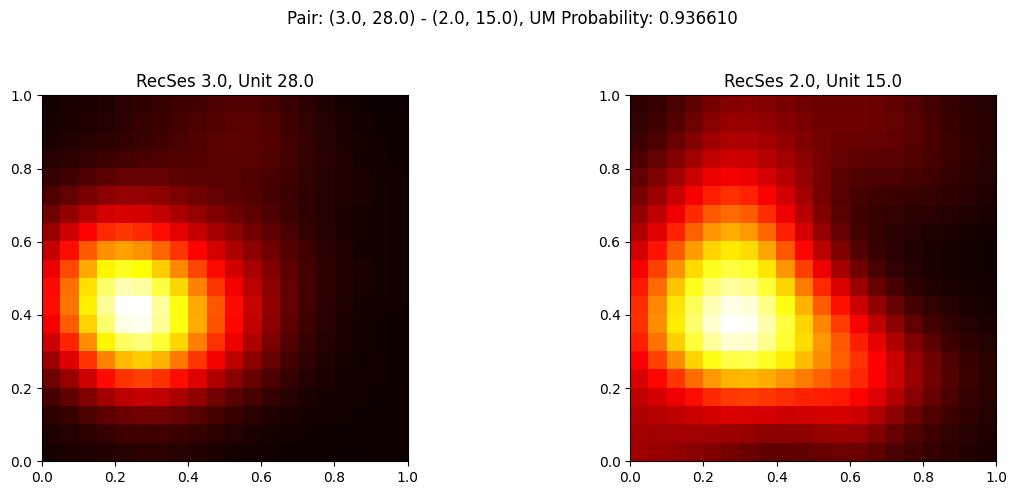

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


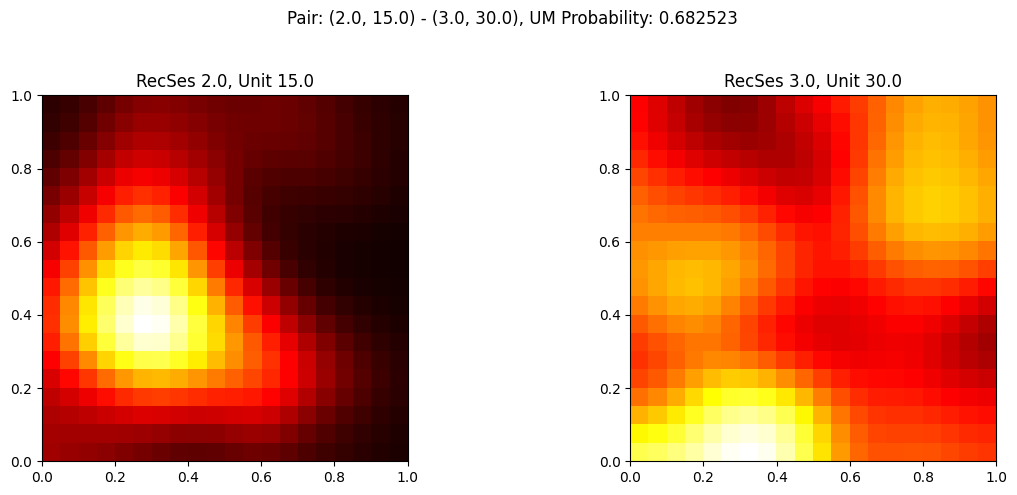

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


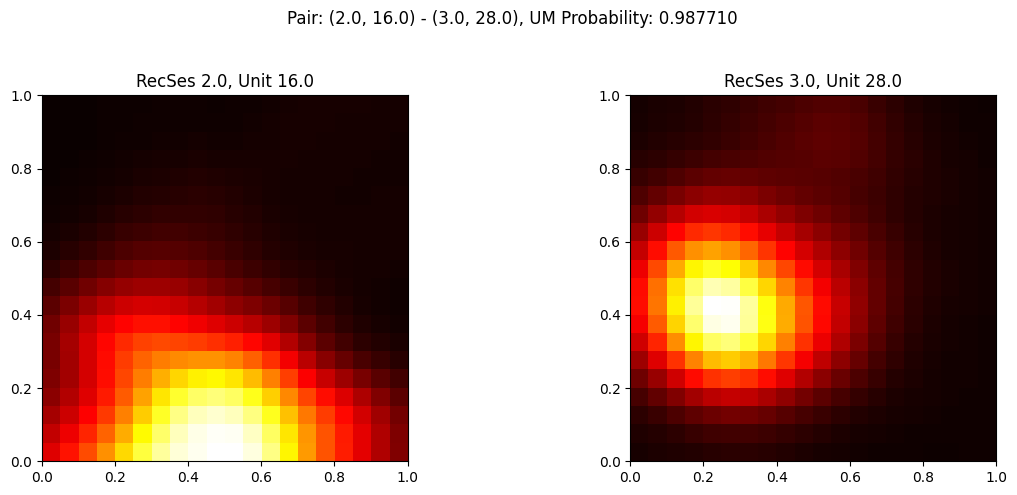

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


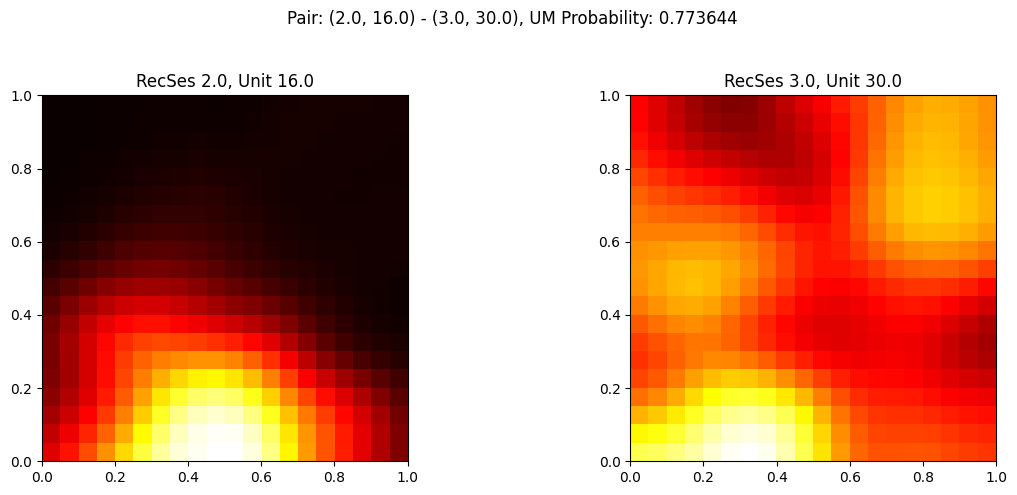

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


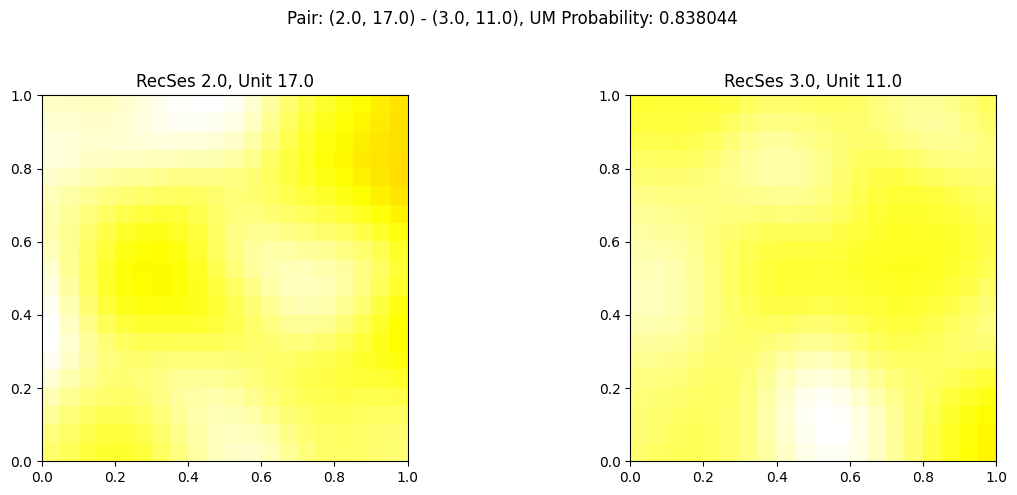

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


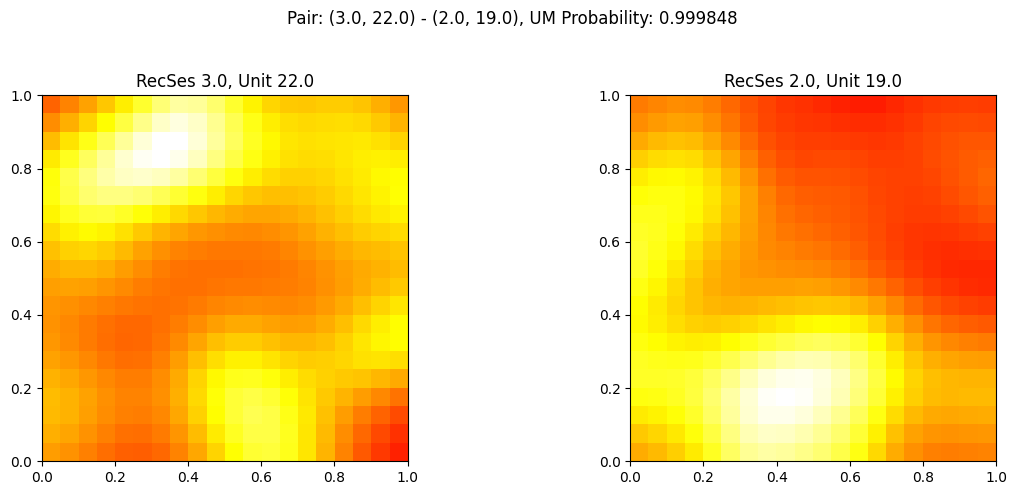

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


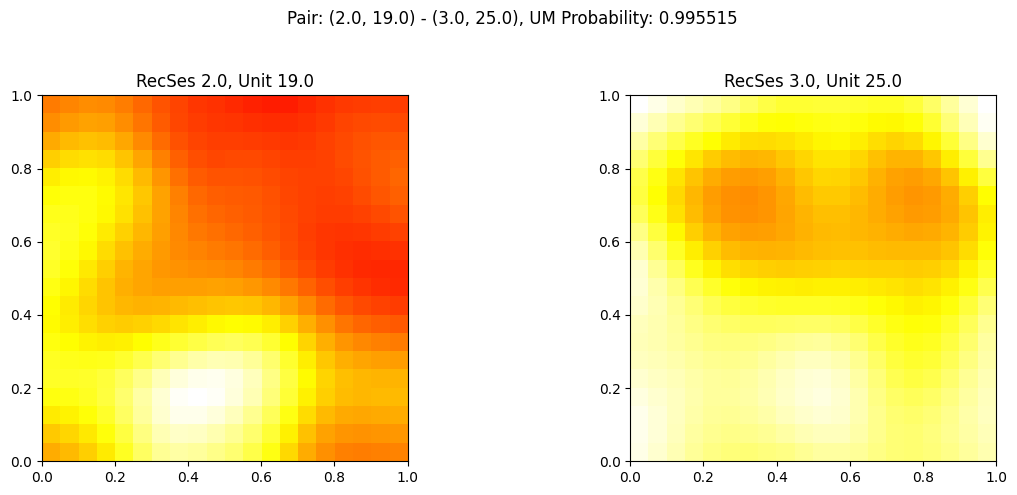

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


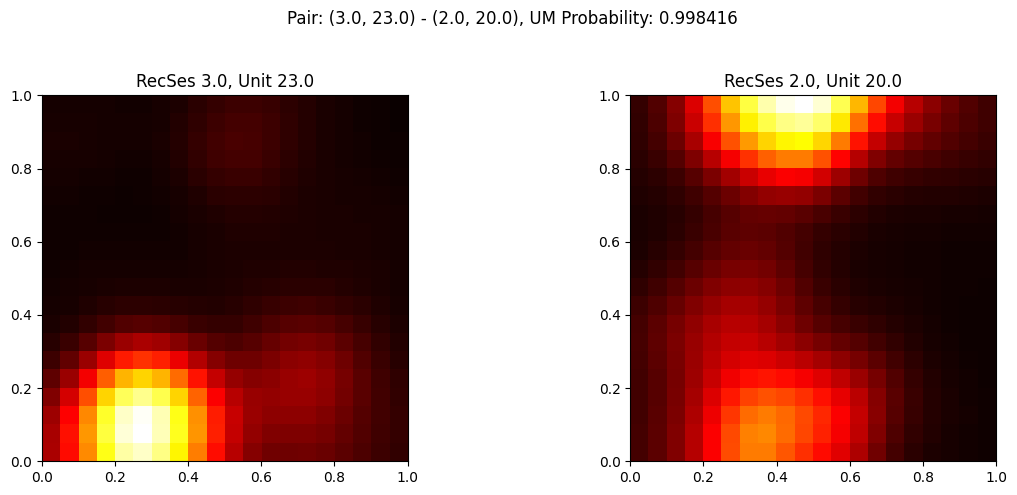

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


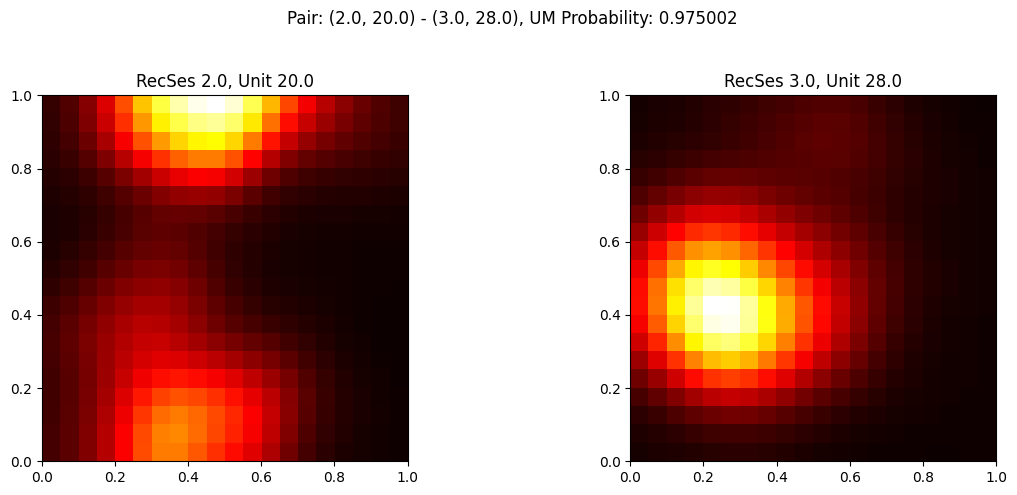

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


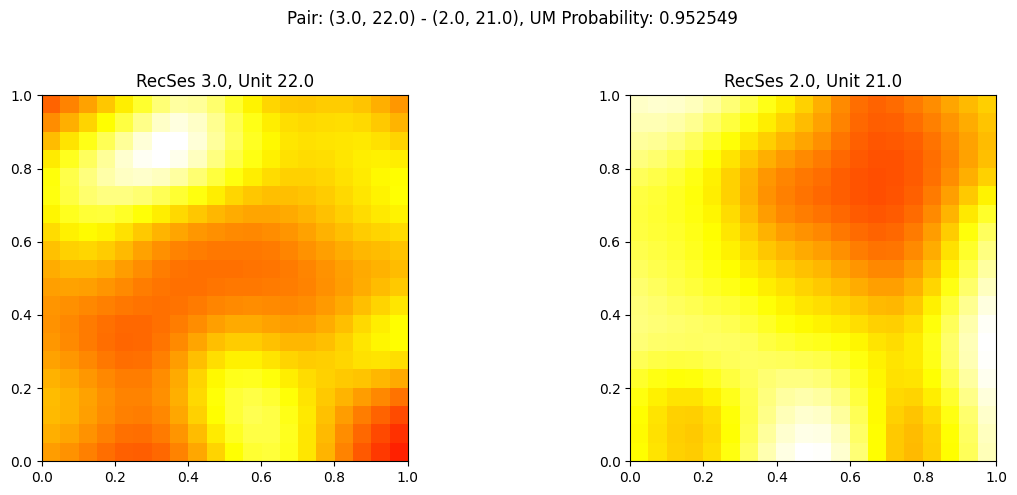

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


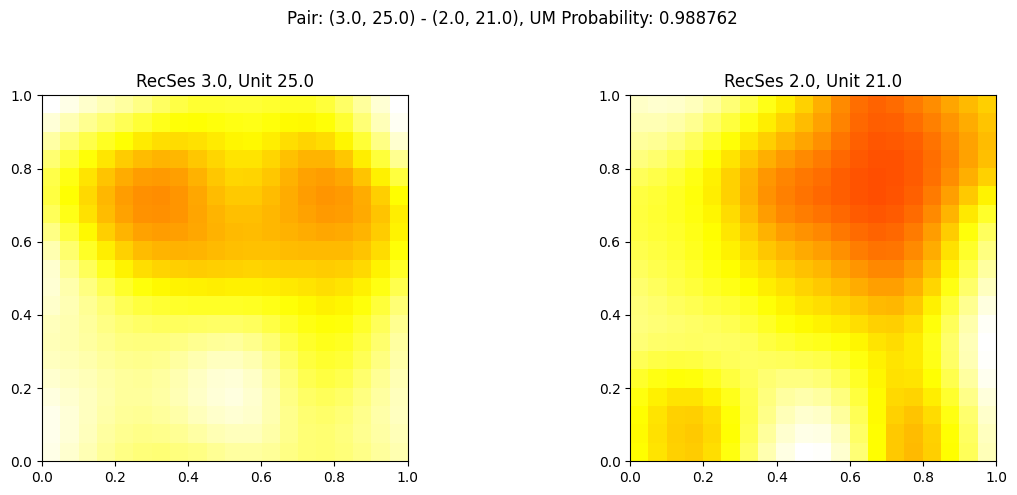

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


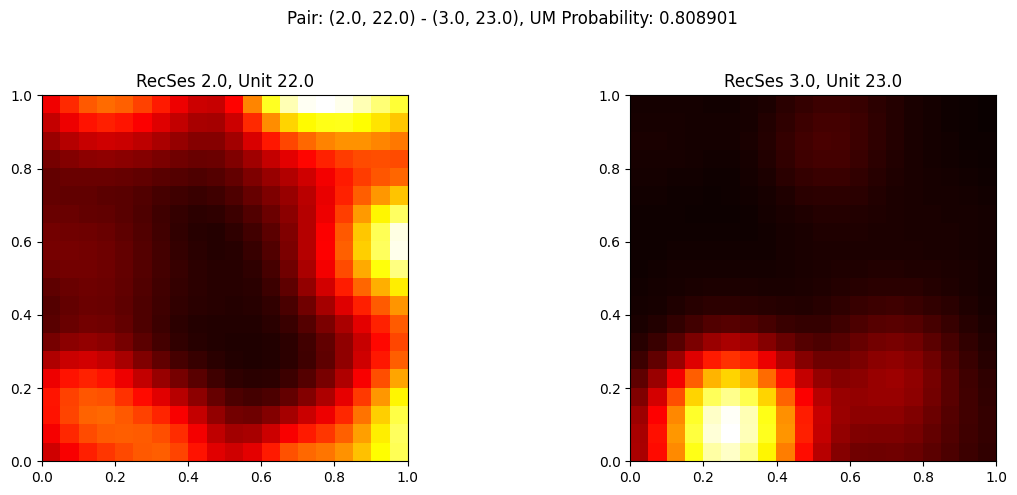

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


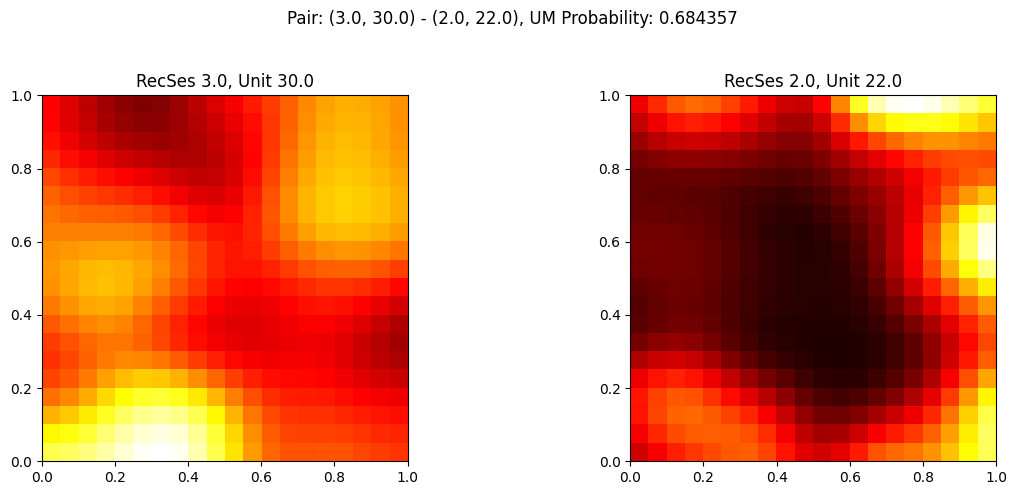

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


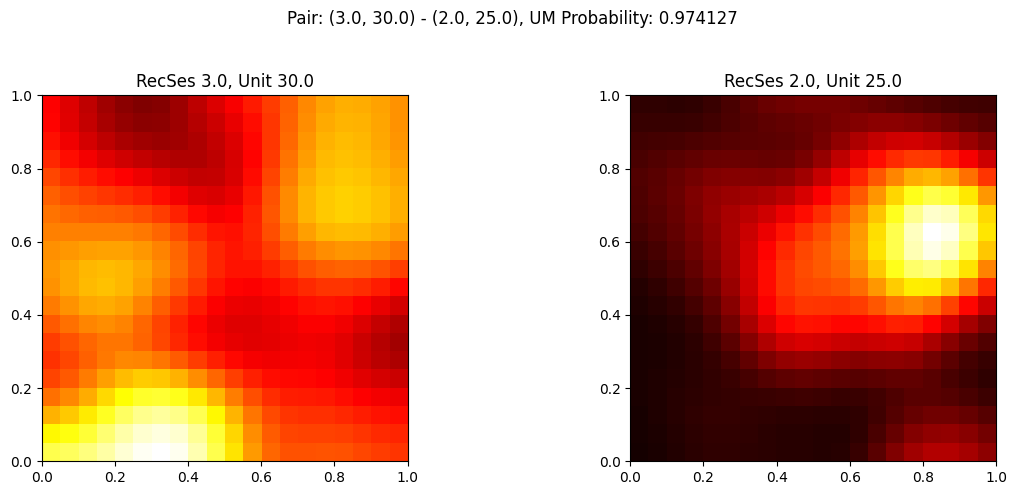

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


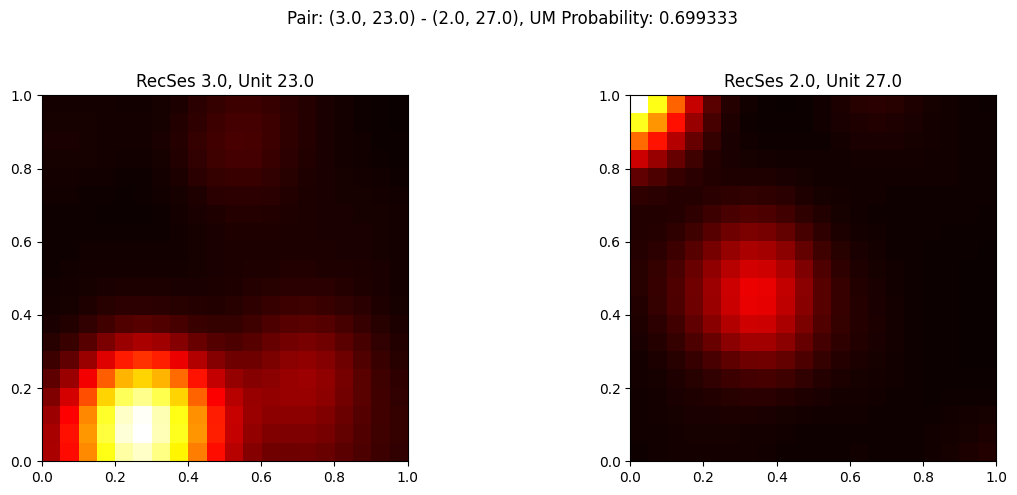

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


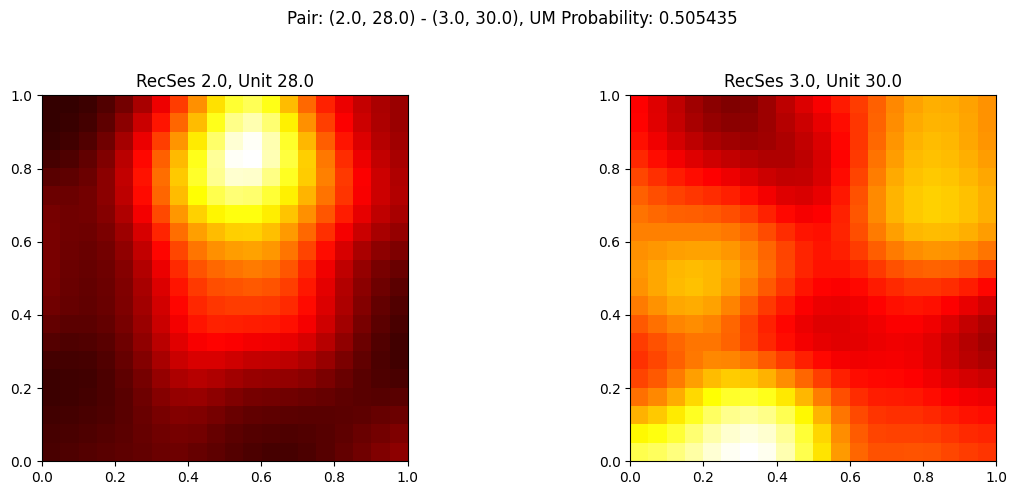

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


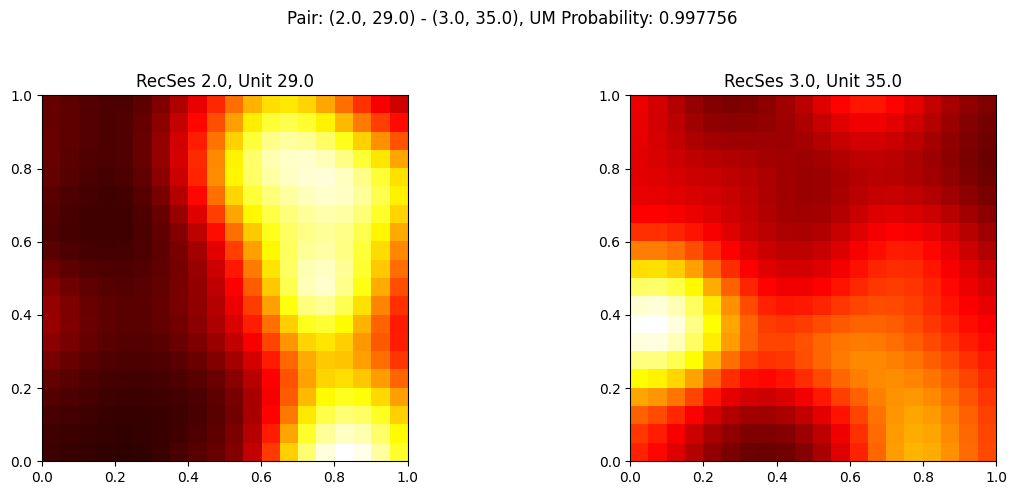

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


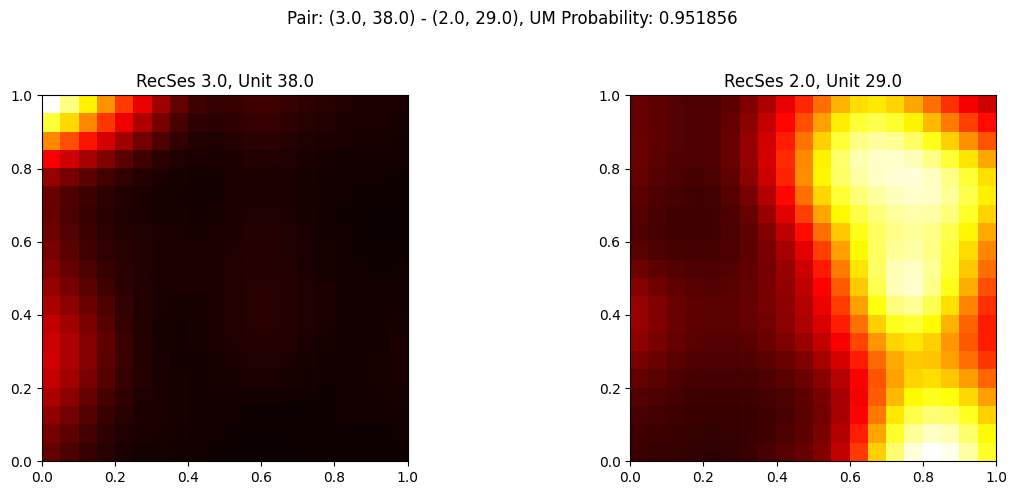

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


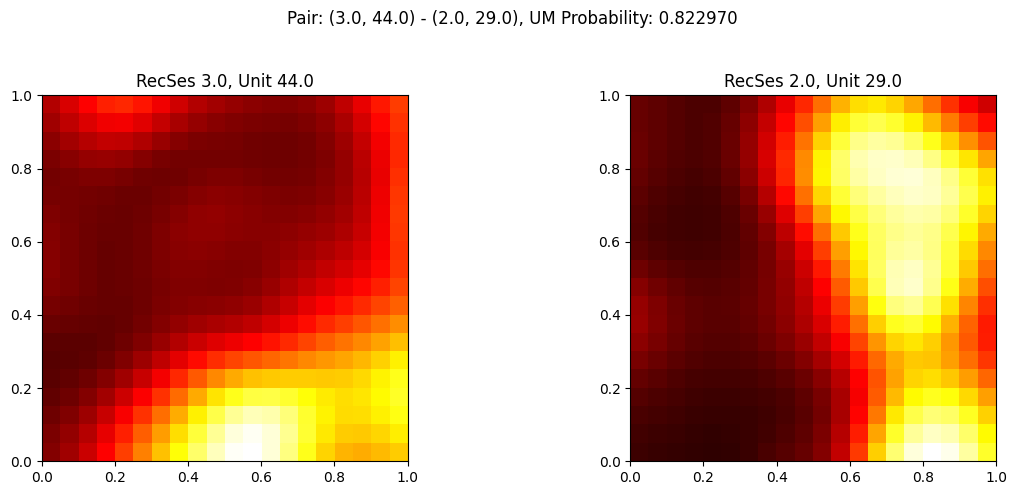

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


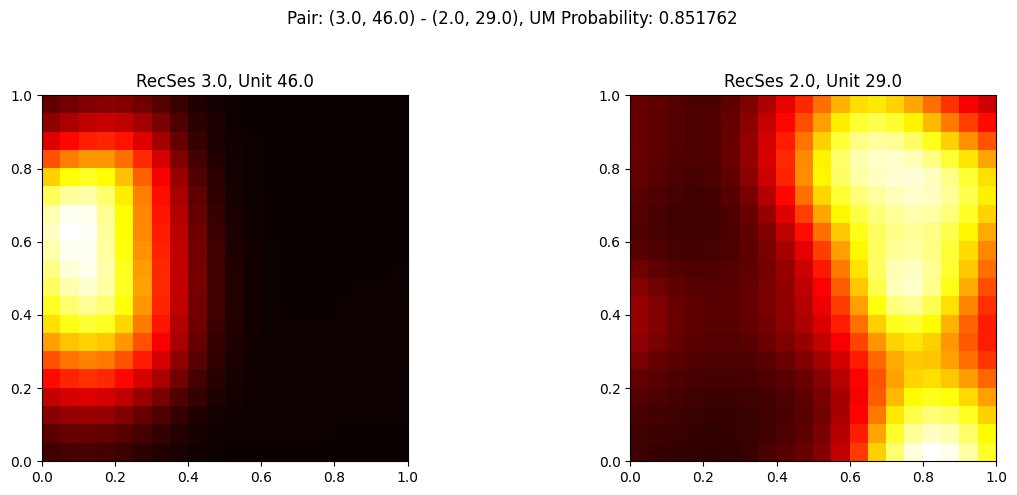

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


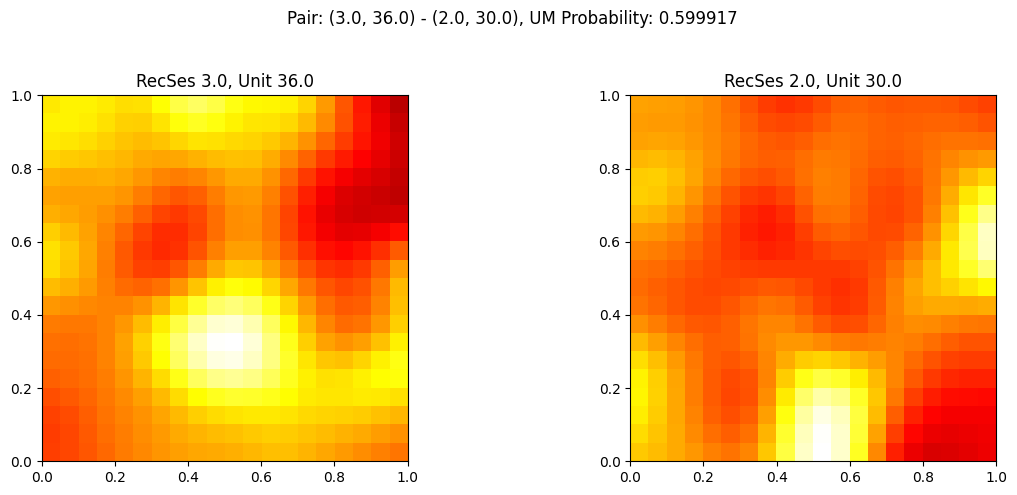

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


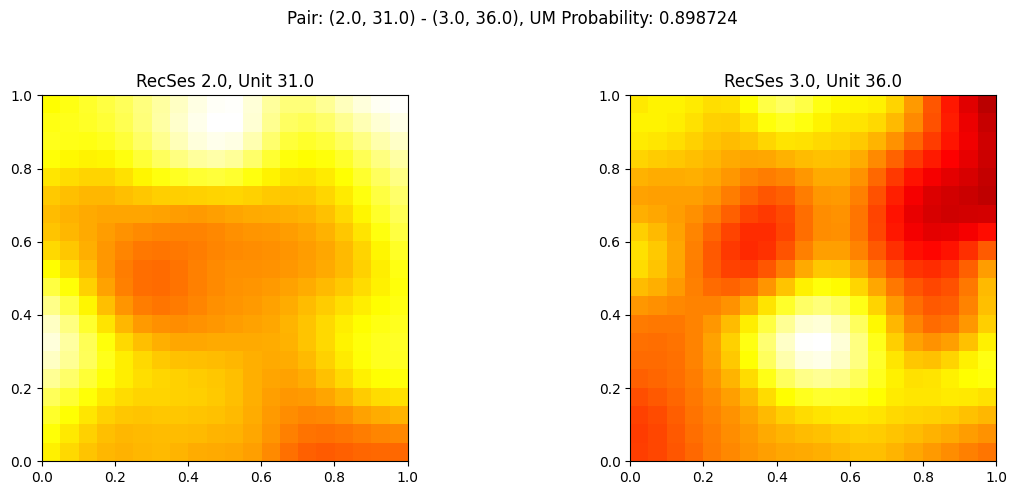

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


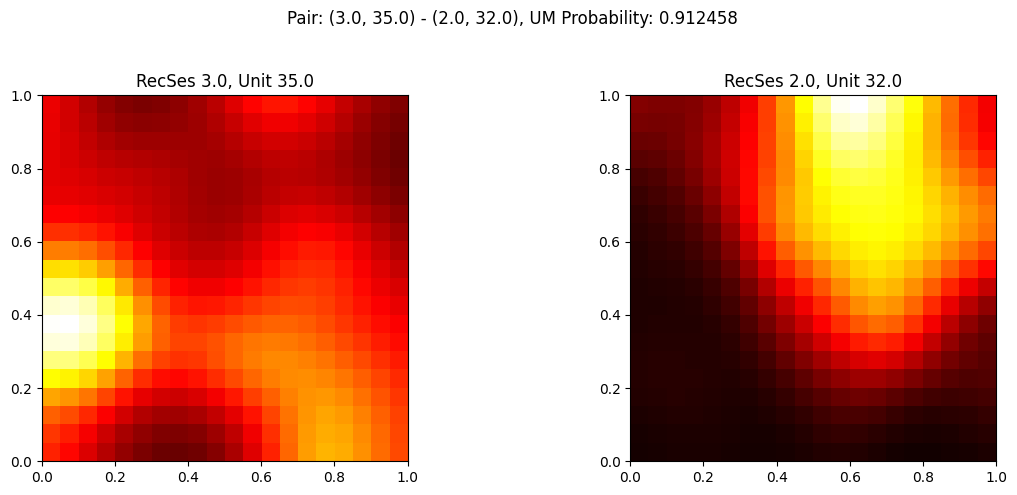

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


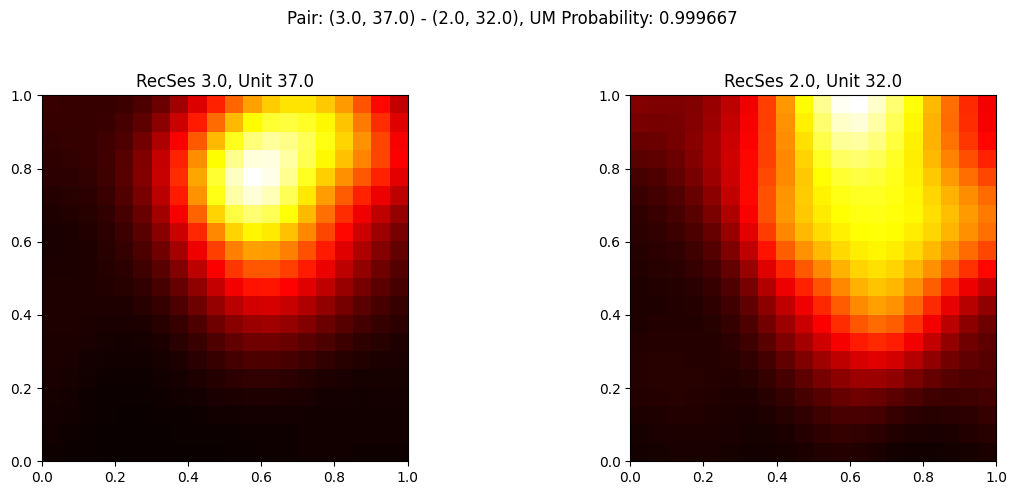

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


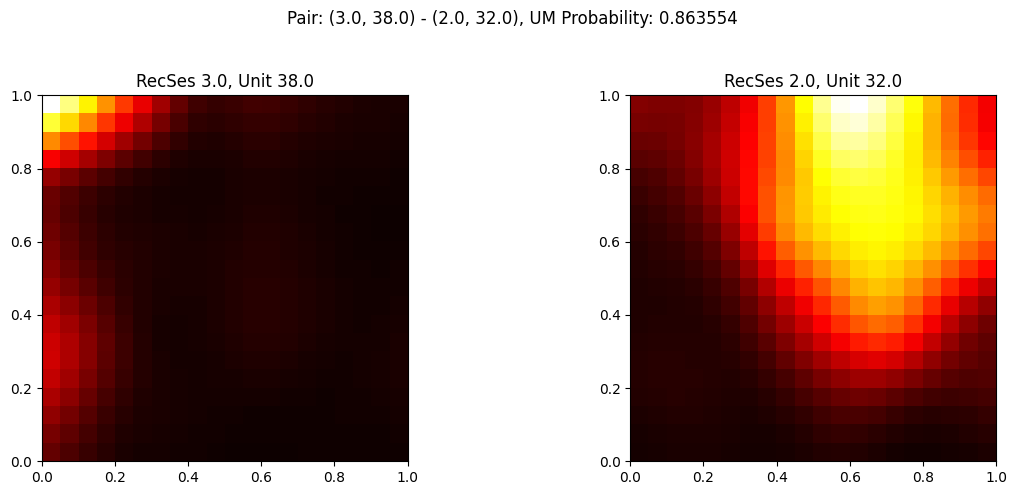

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


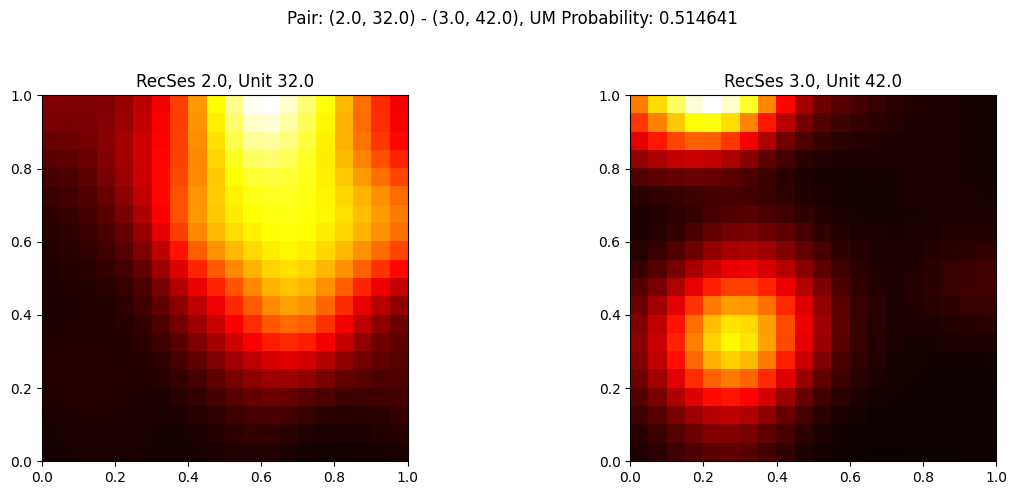

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


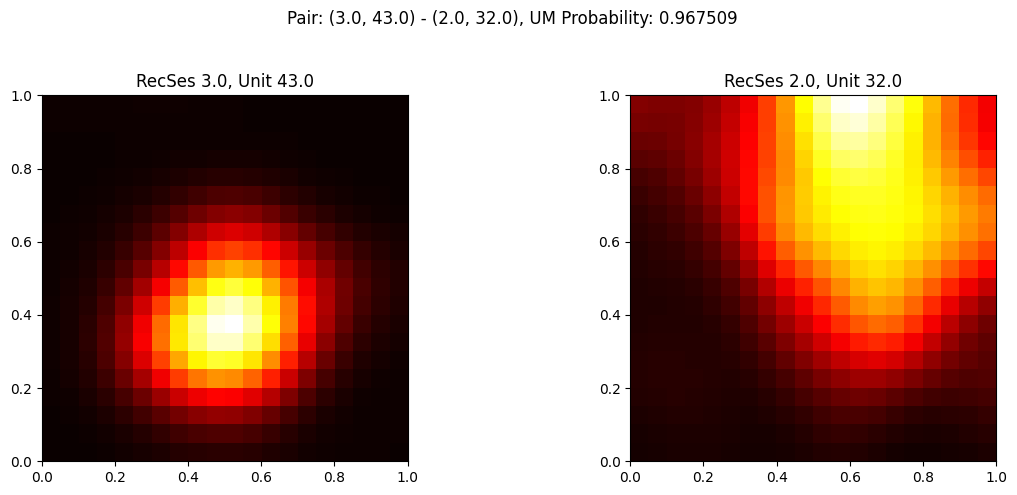

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


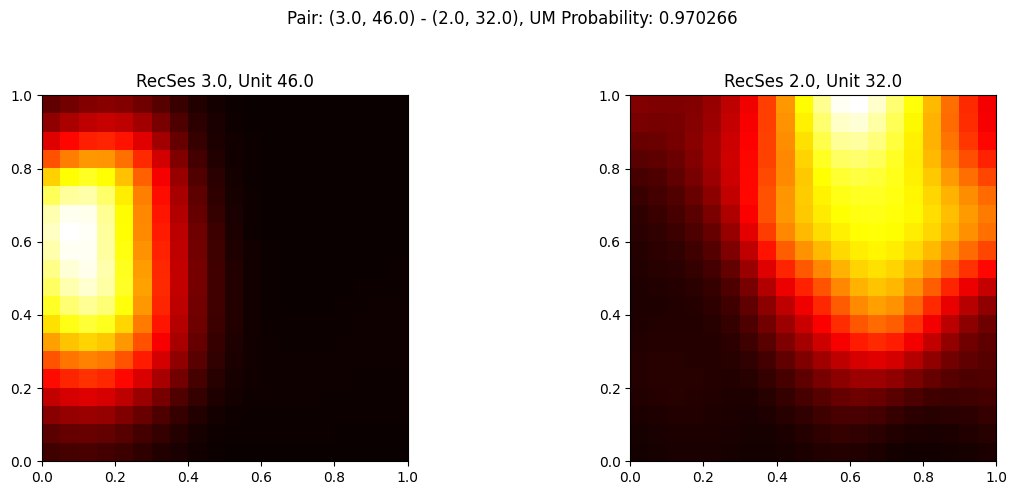

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


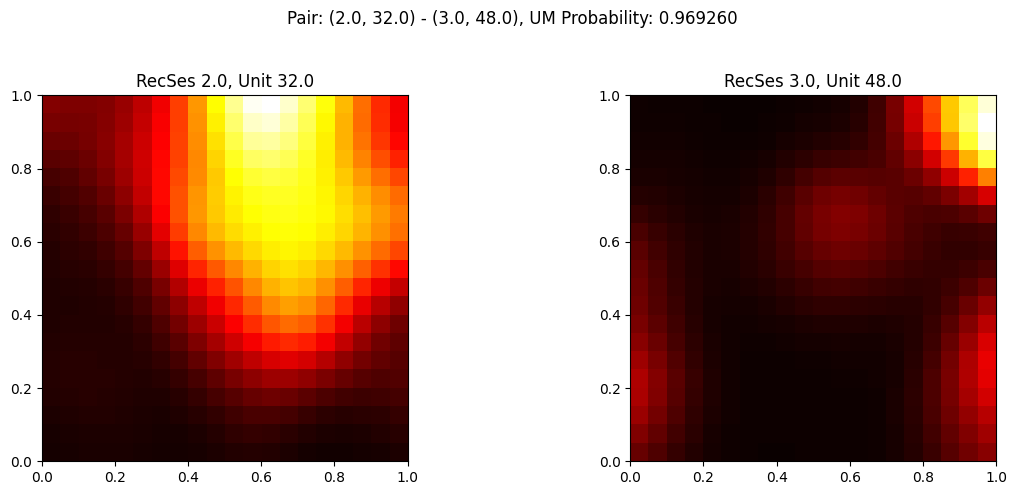

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


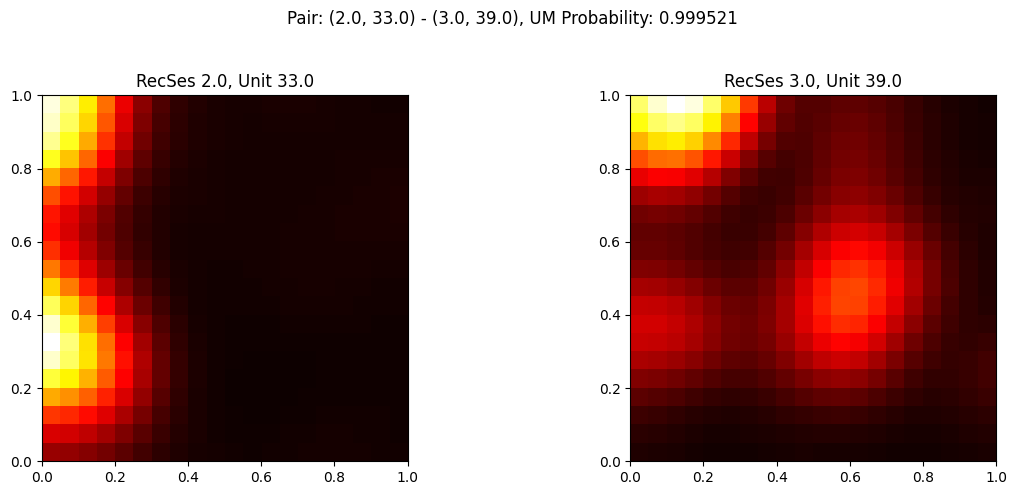

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


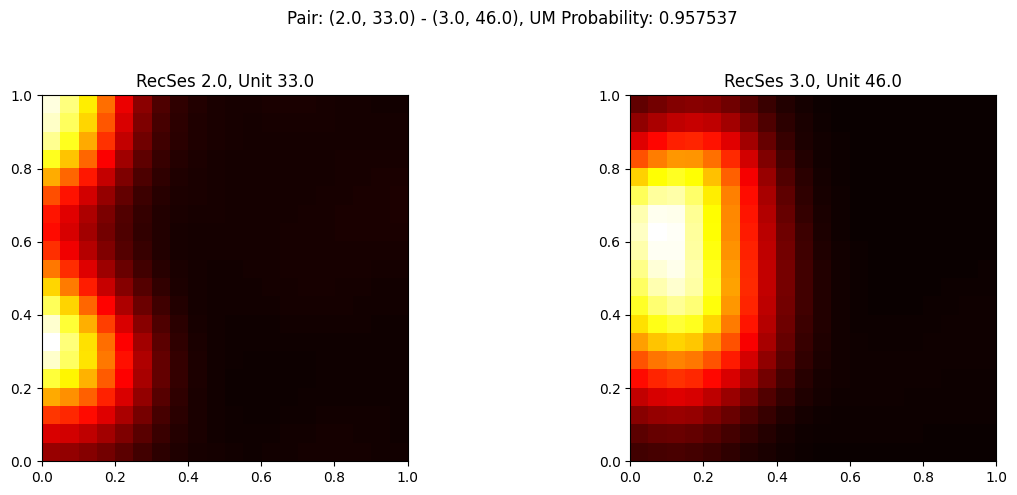

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


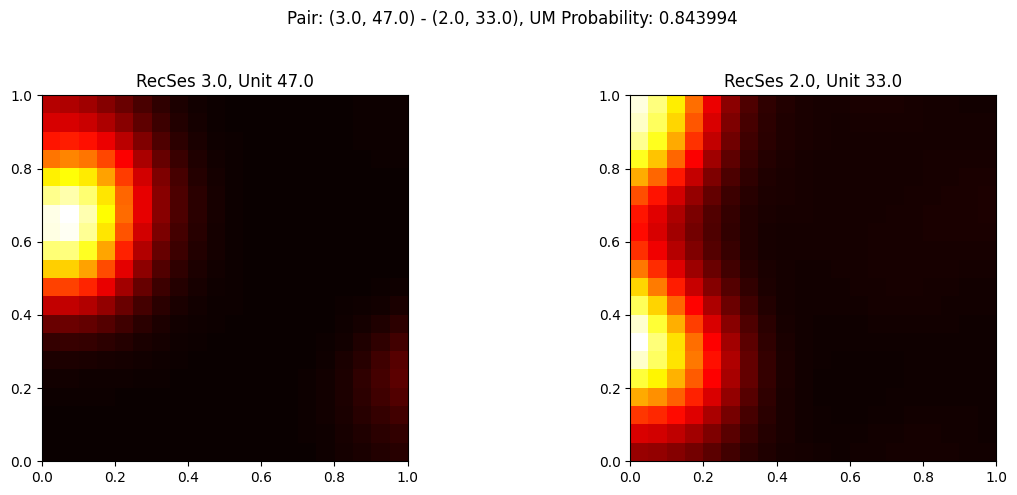

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


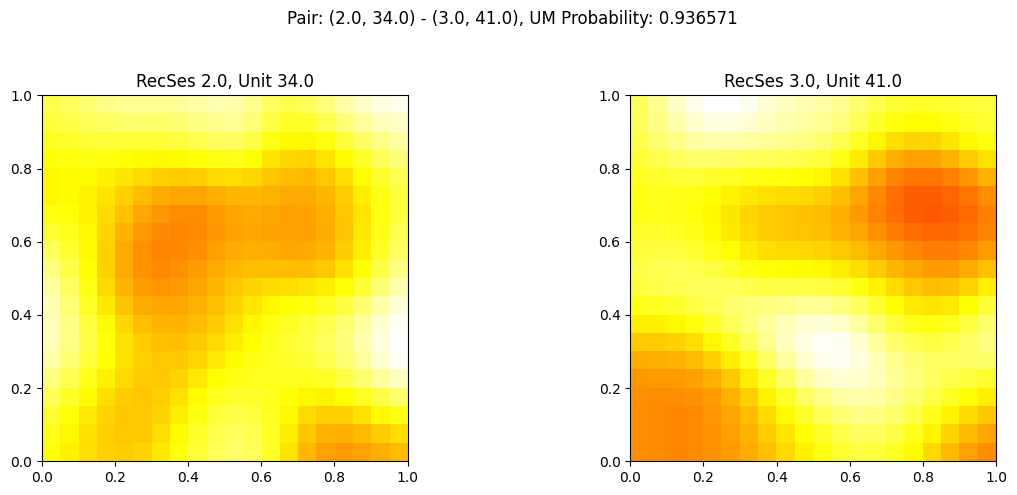

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


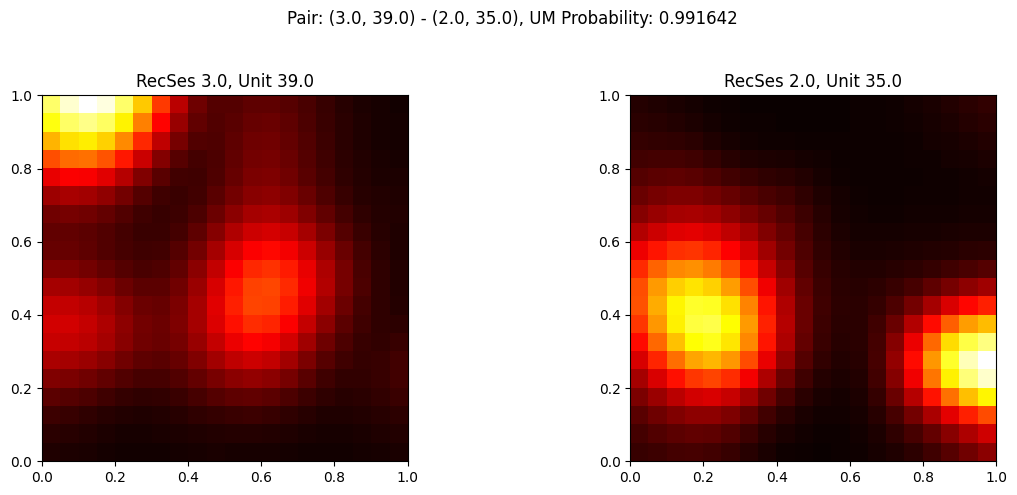

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


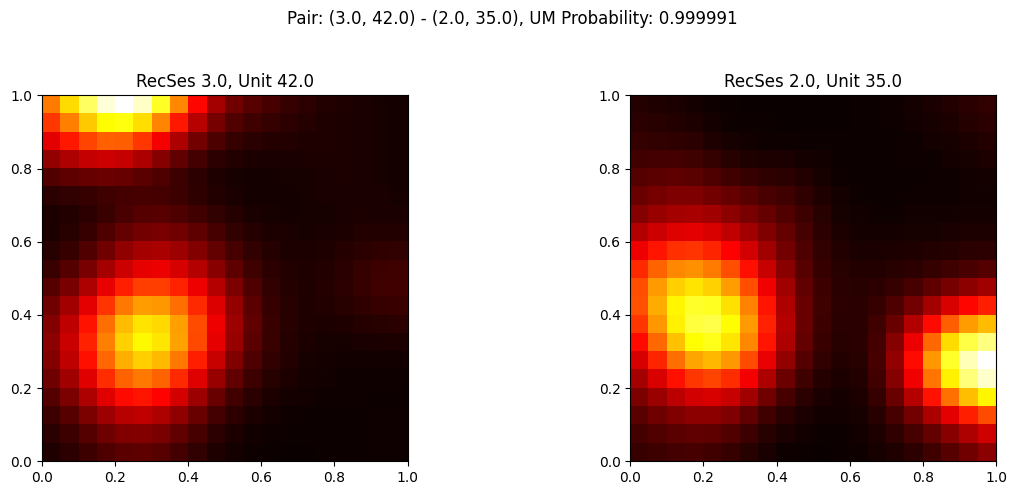

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


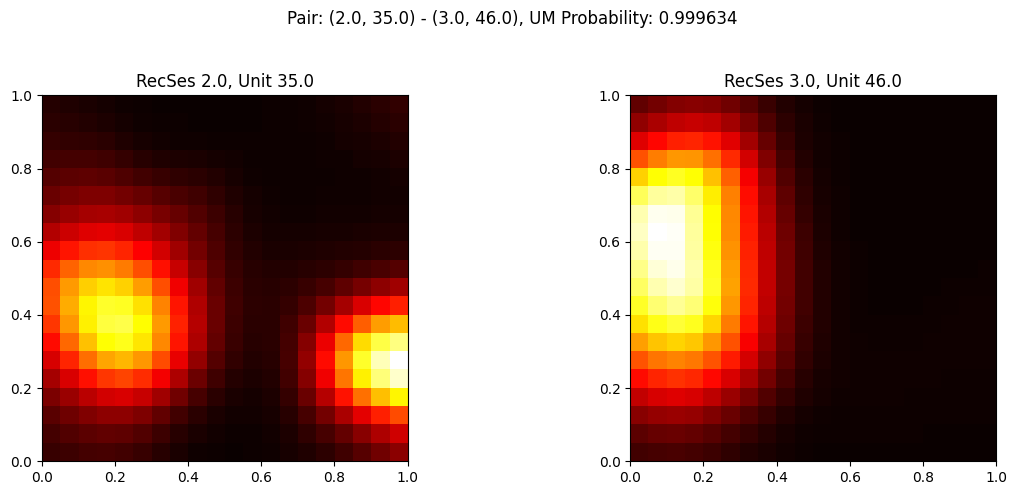

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


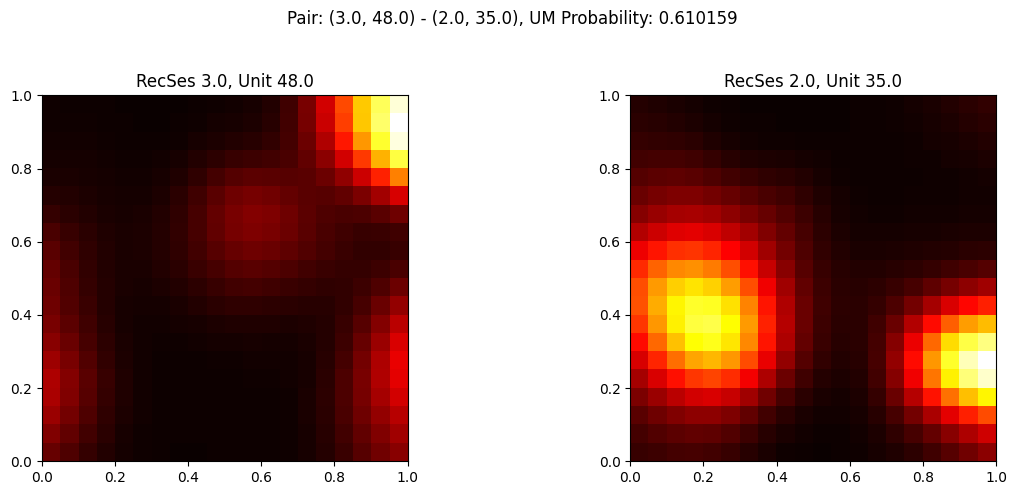

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


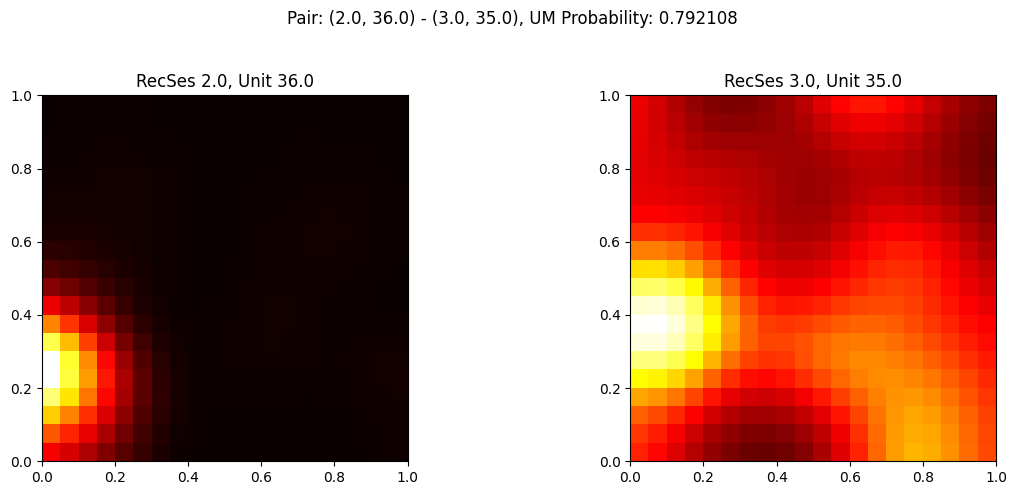

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


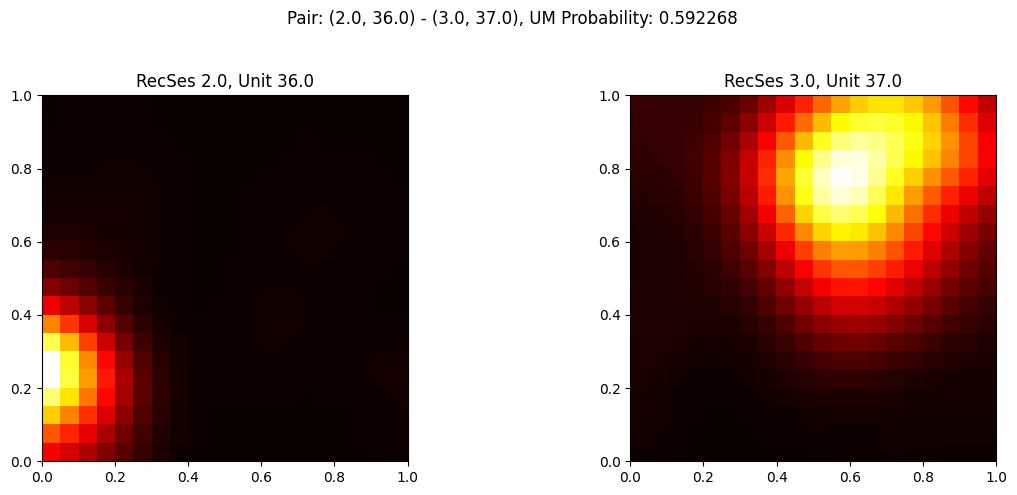

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


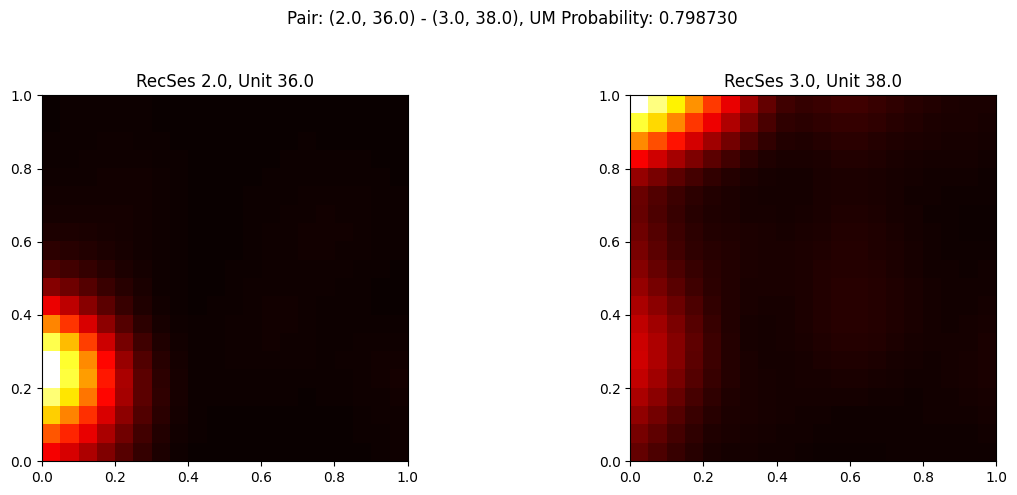

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


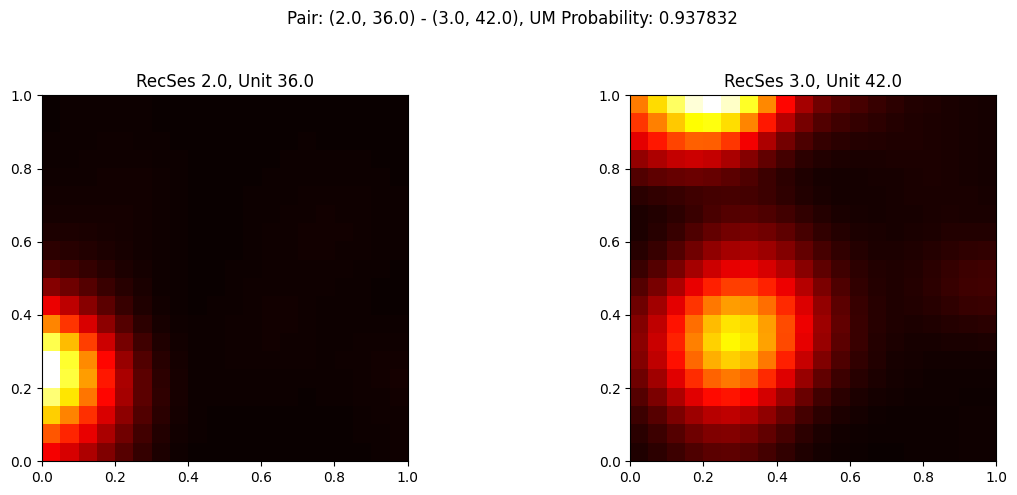

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


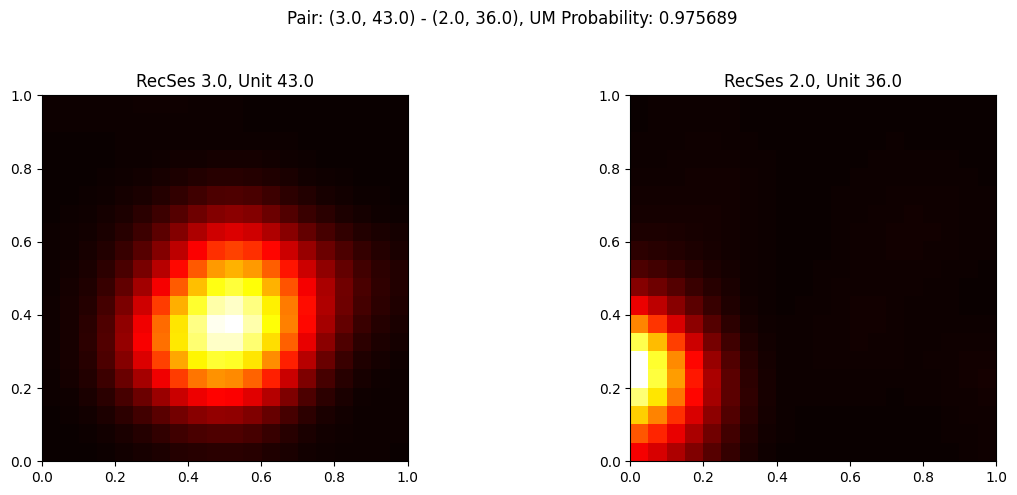

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


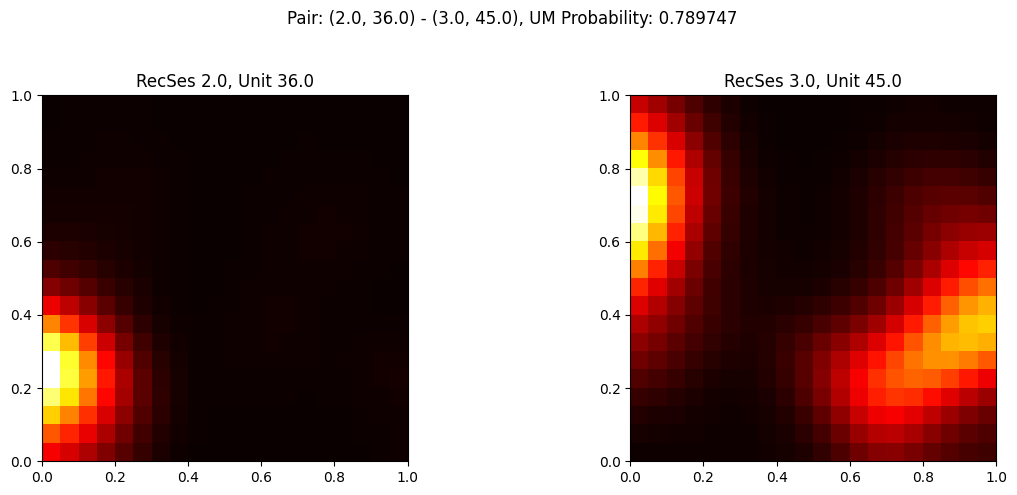

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


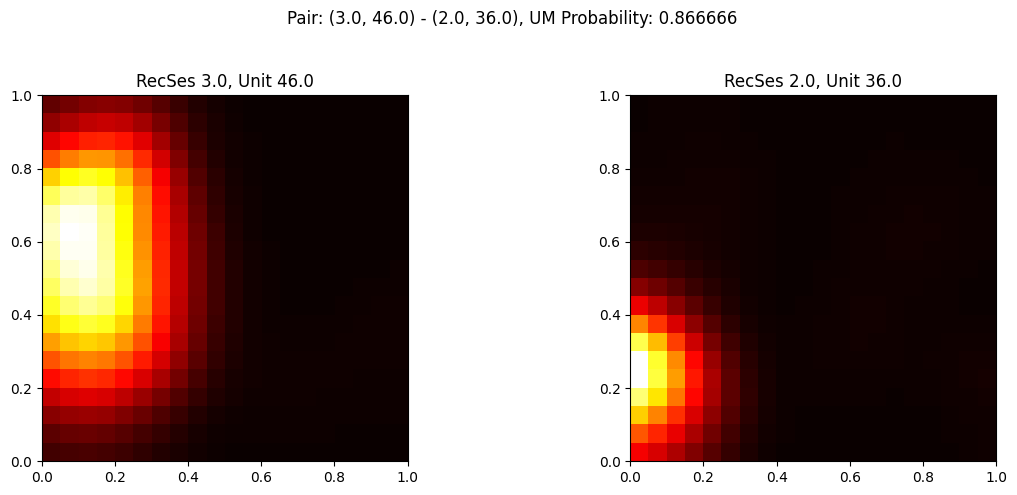

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


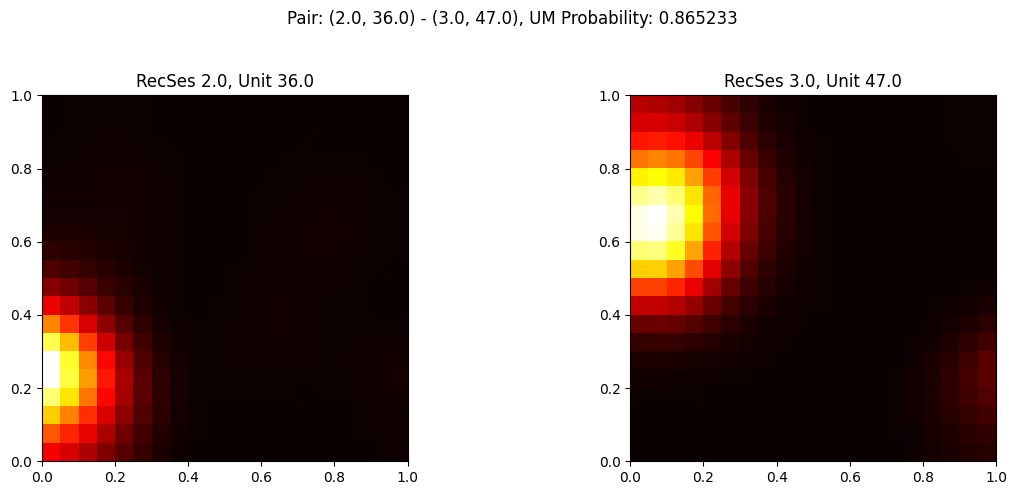

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


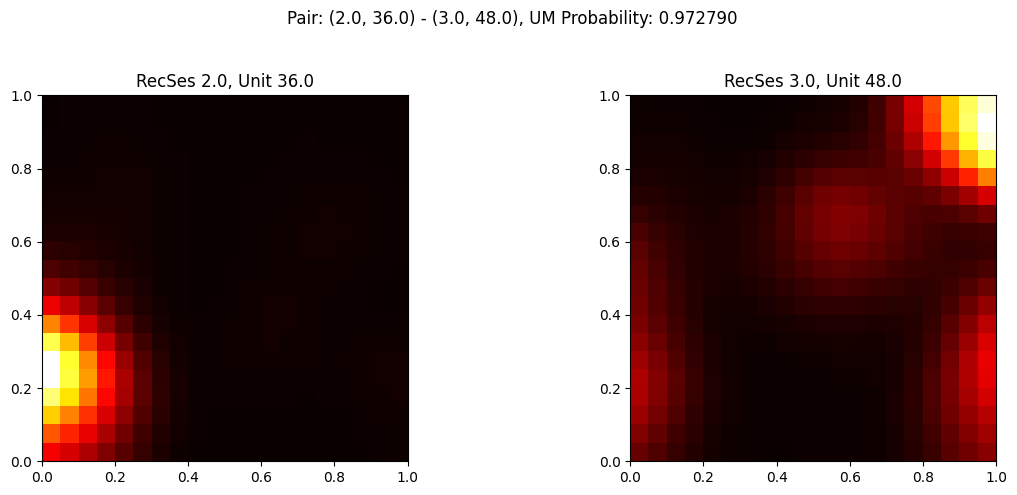

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


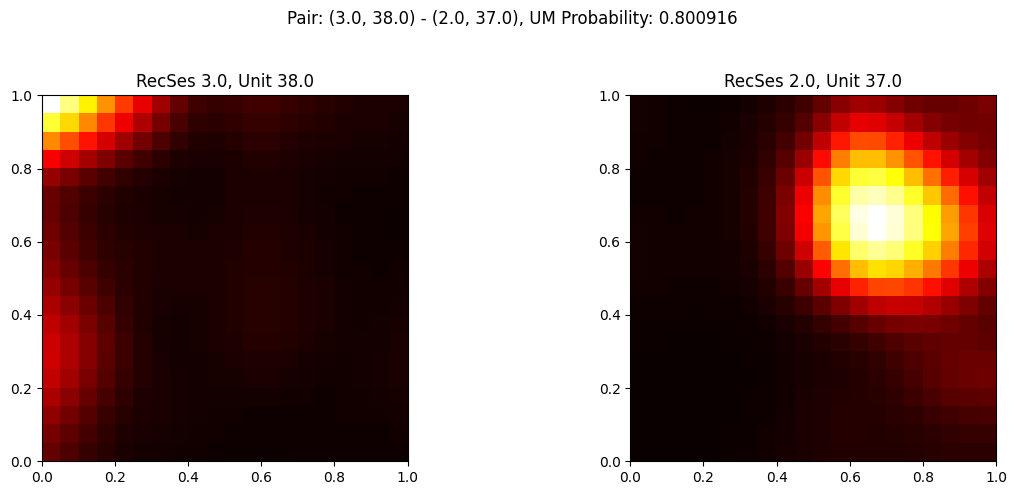

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


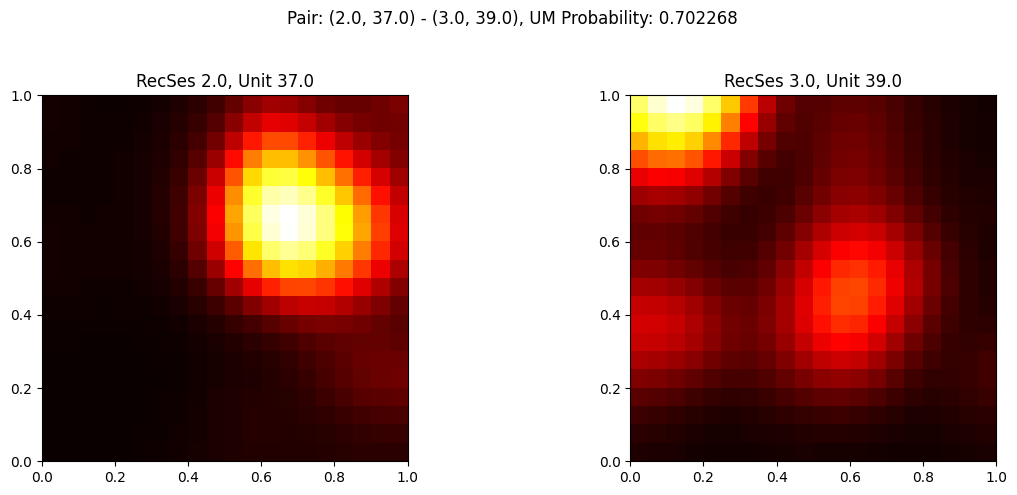

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


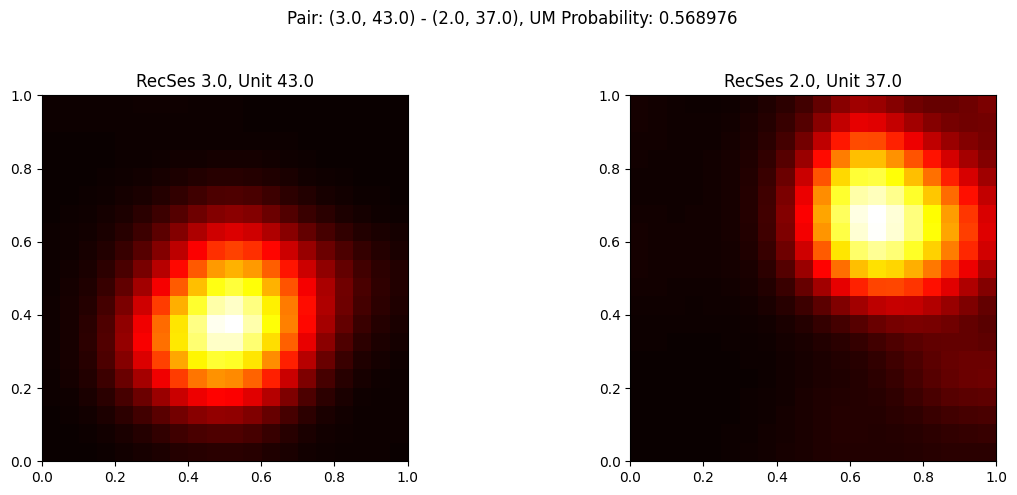

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


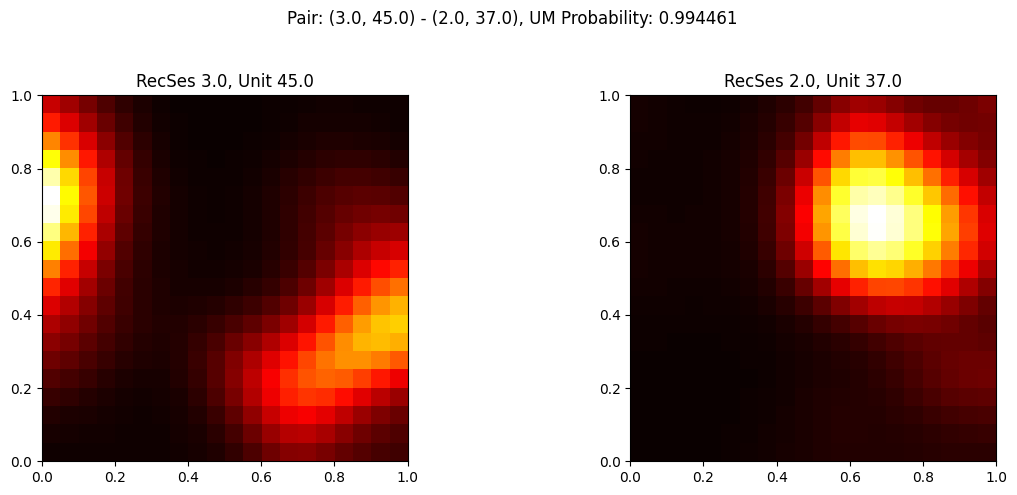

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


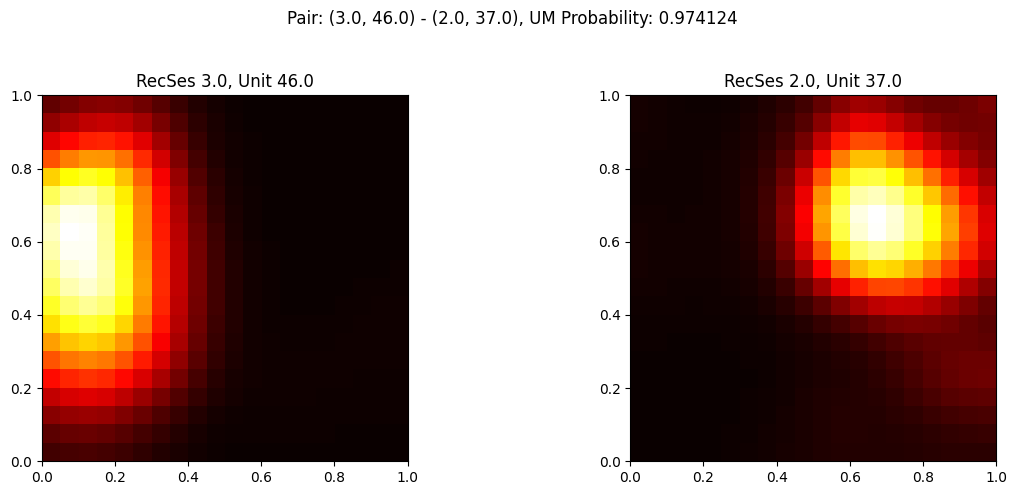

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


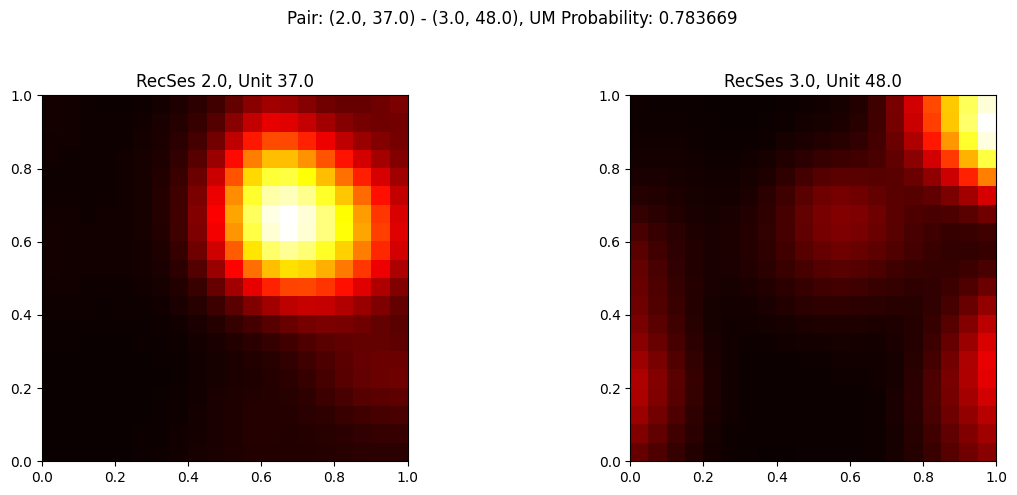

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


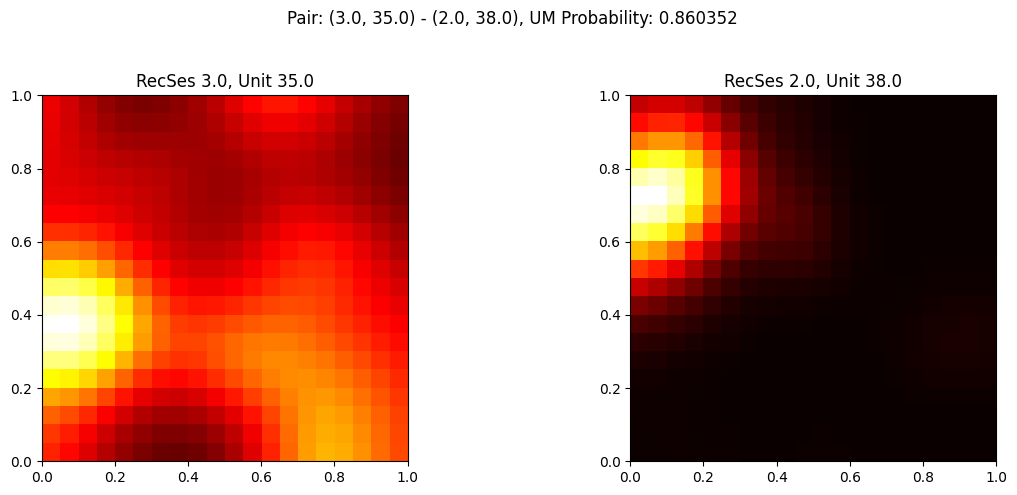

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


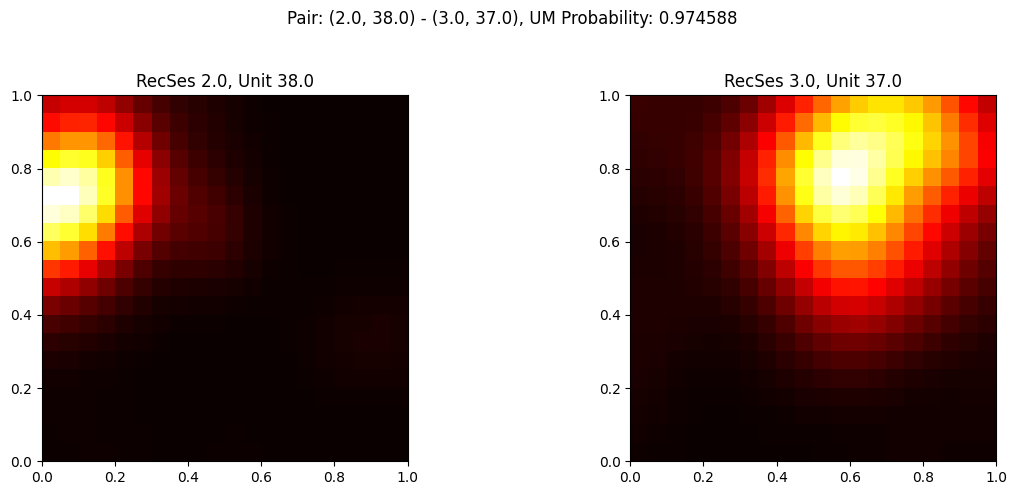

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


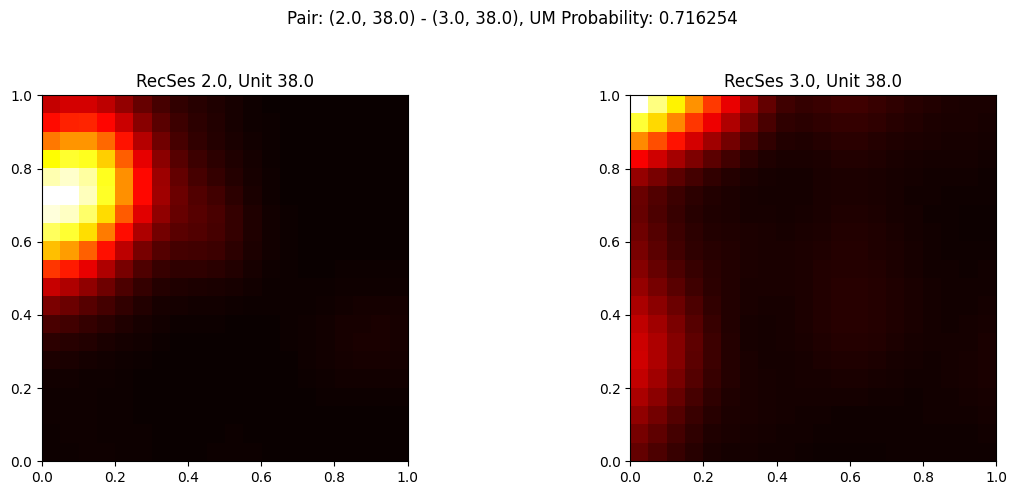

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


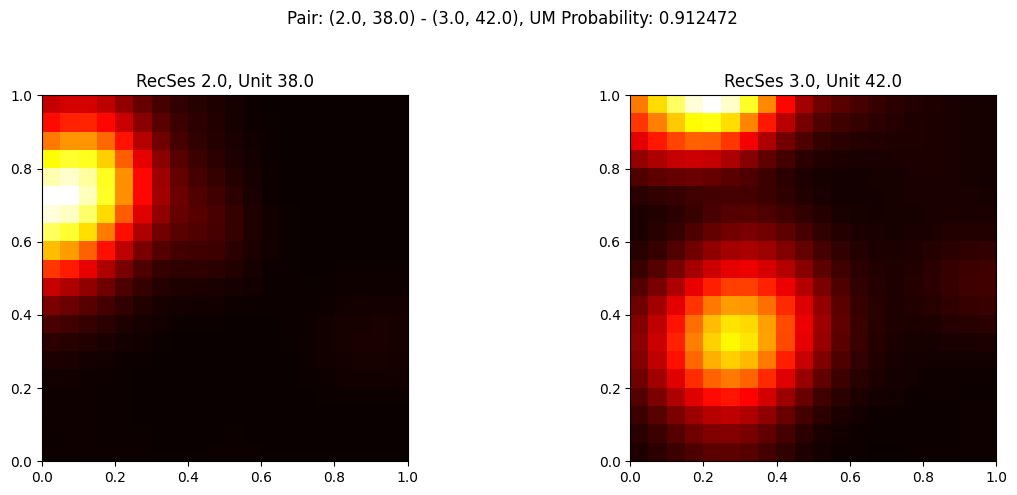

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


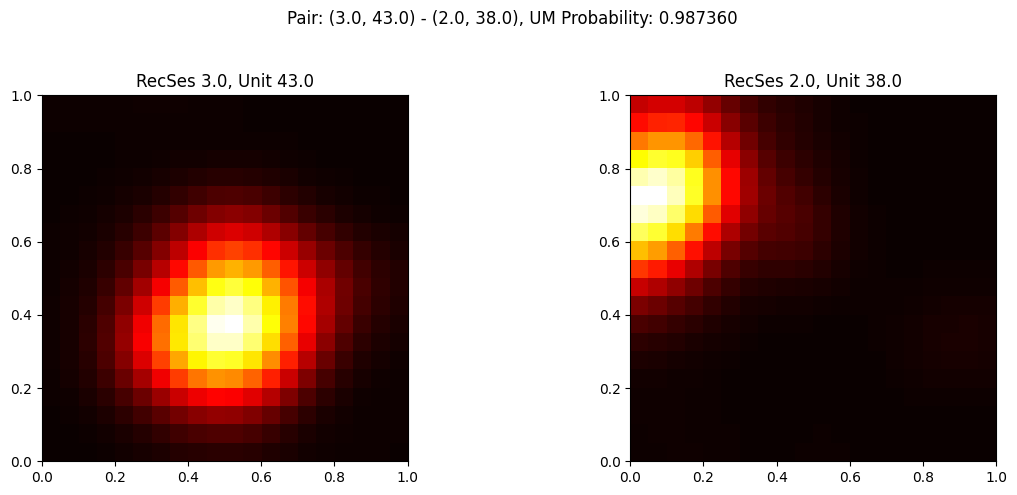

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


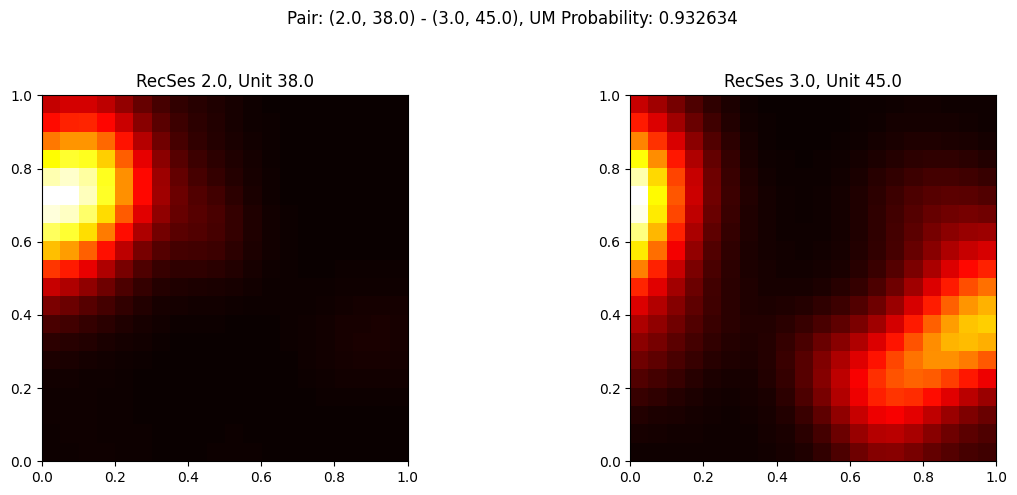

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


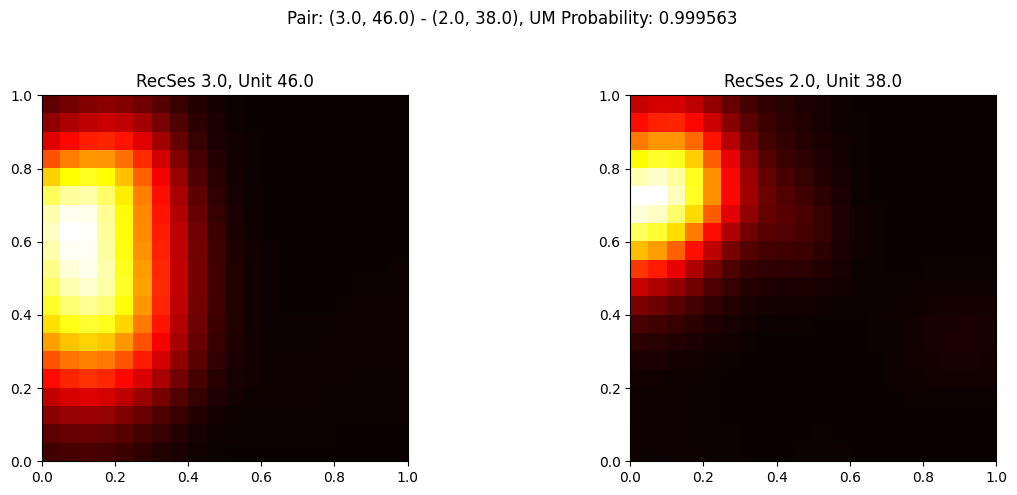

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


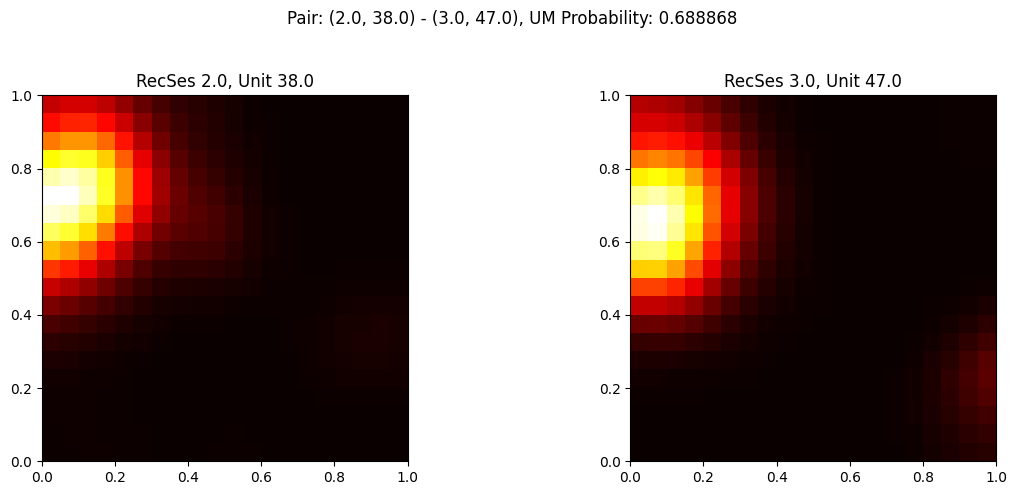

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


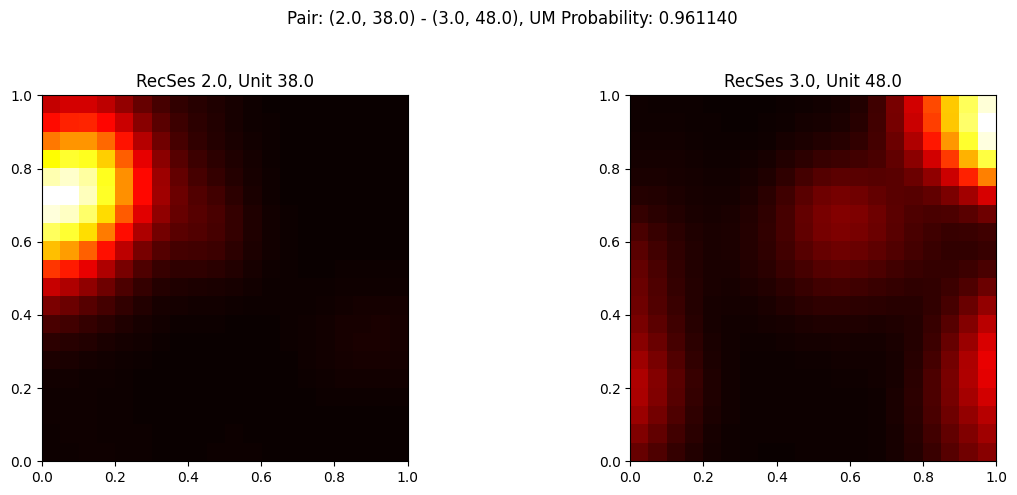

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


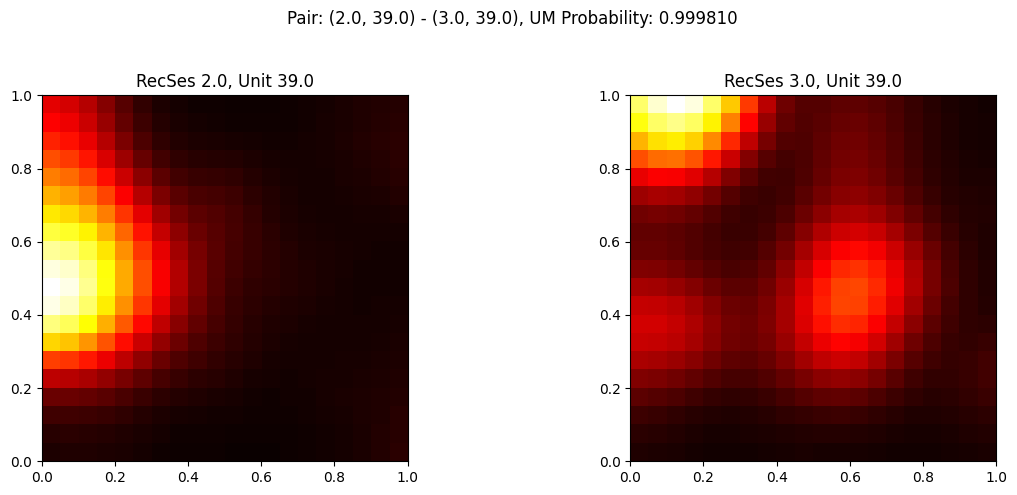

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


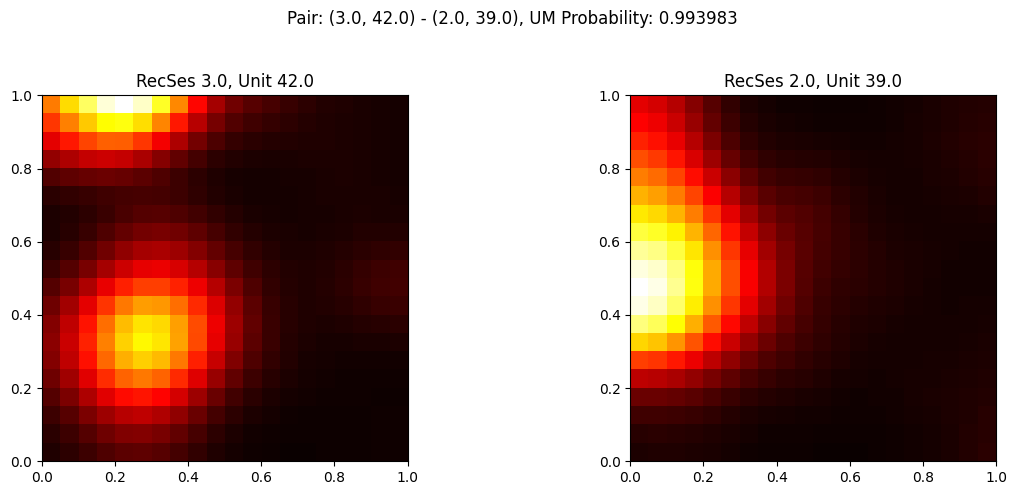

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


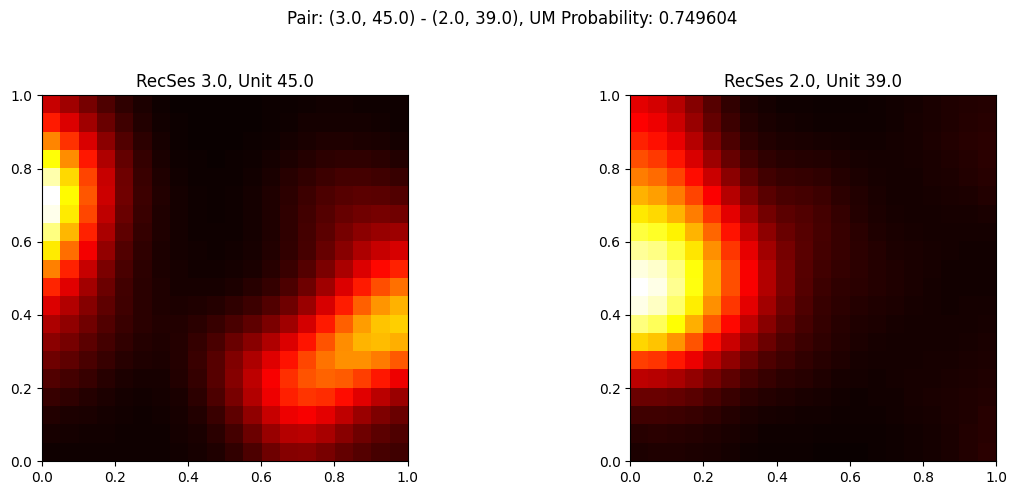

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


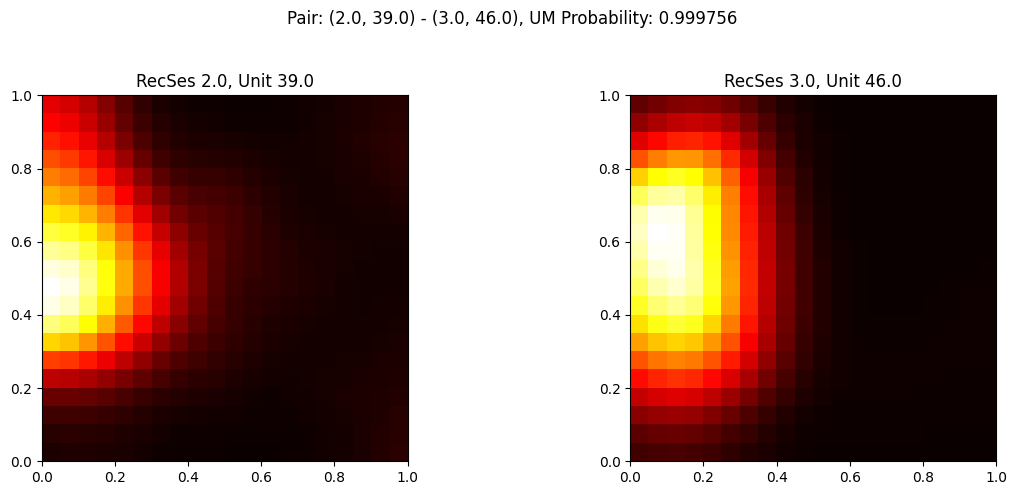

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


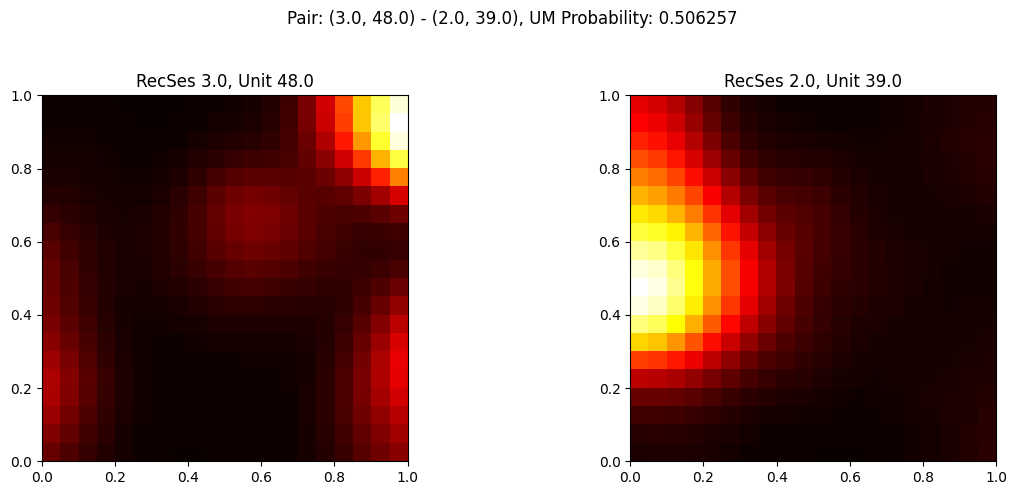

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


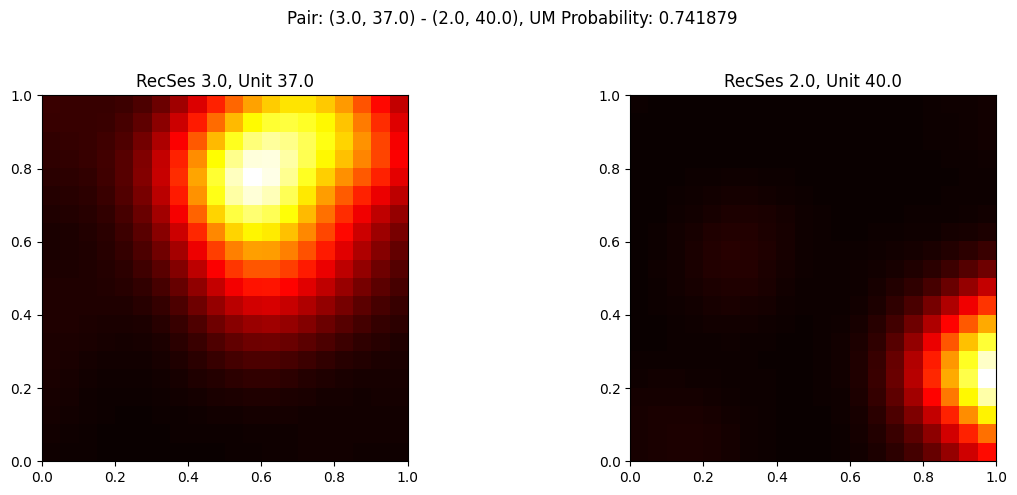

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


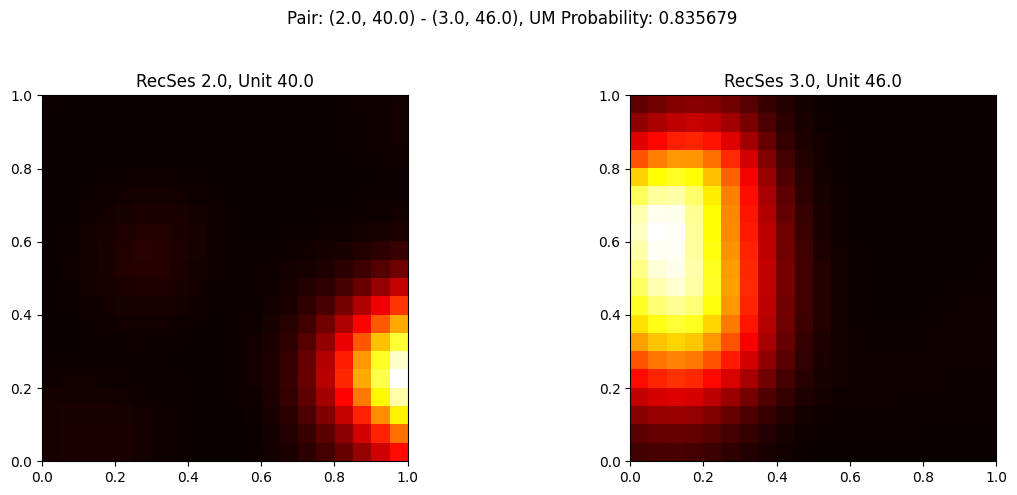

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


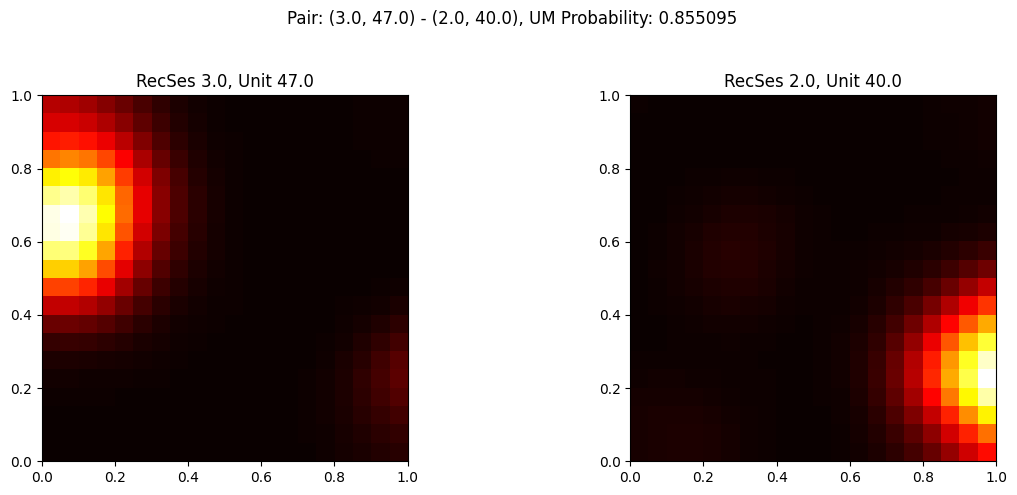

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


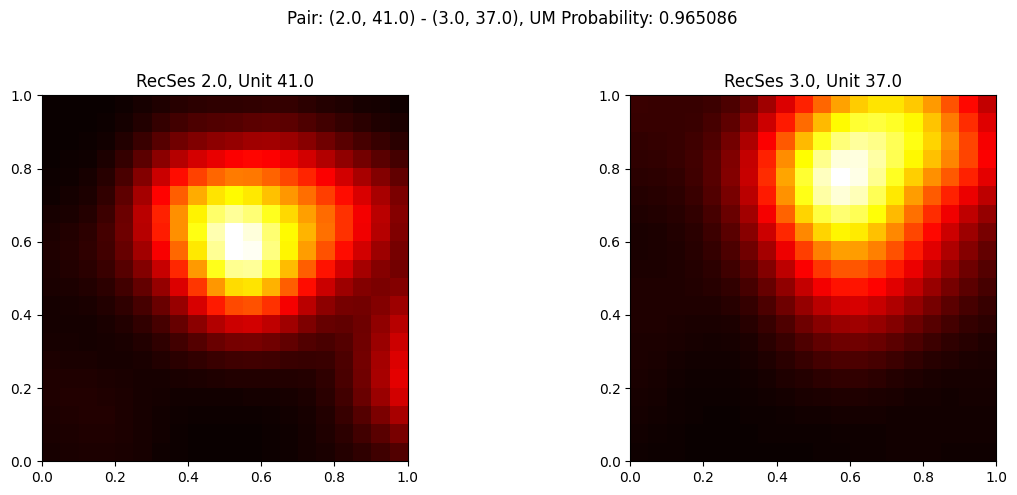

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


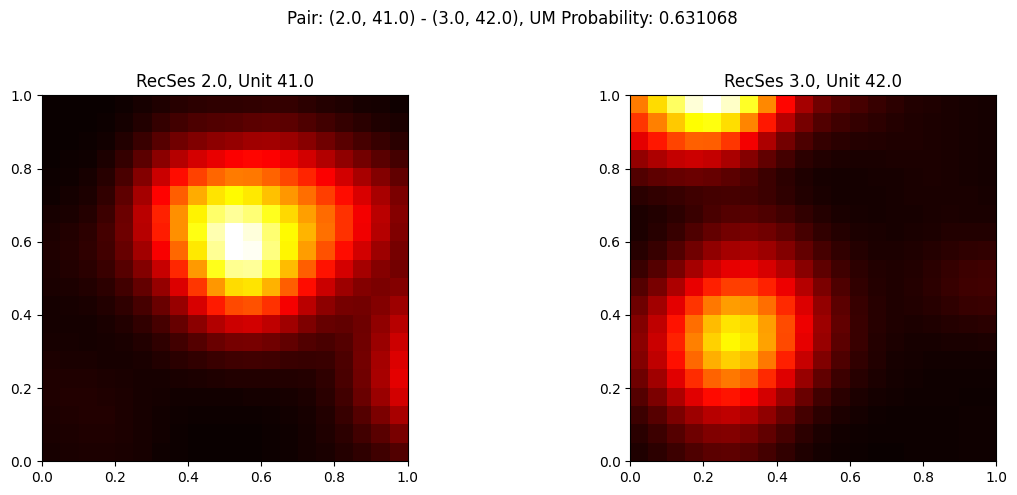

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


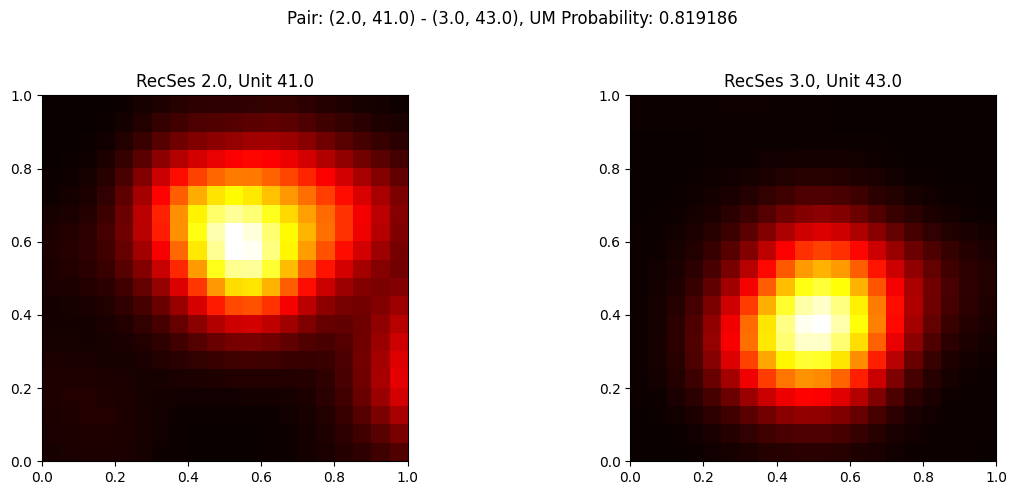

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


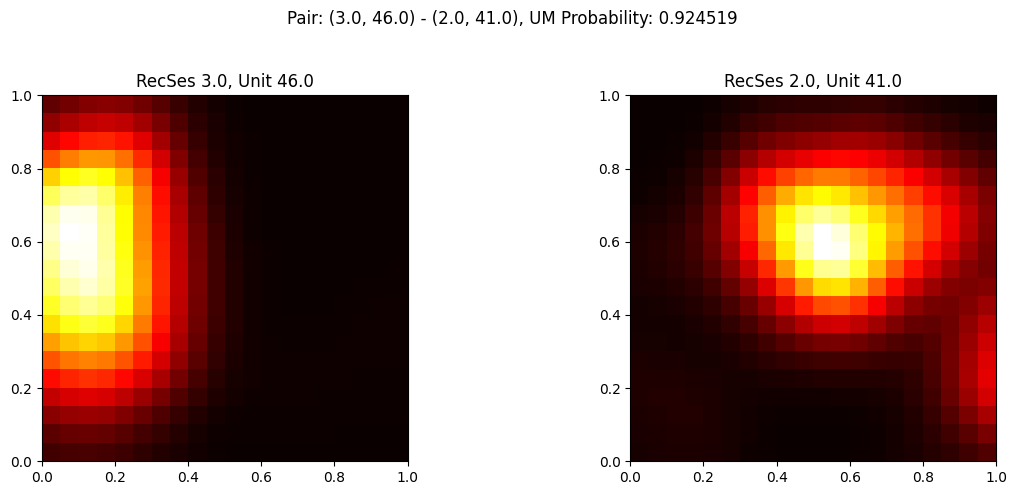

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ) or (isinstance(key, str) and (key in self.metadata_index)):


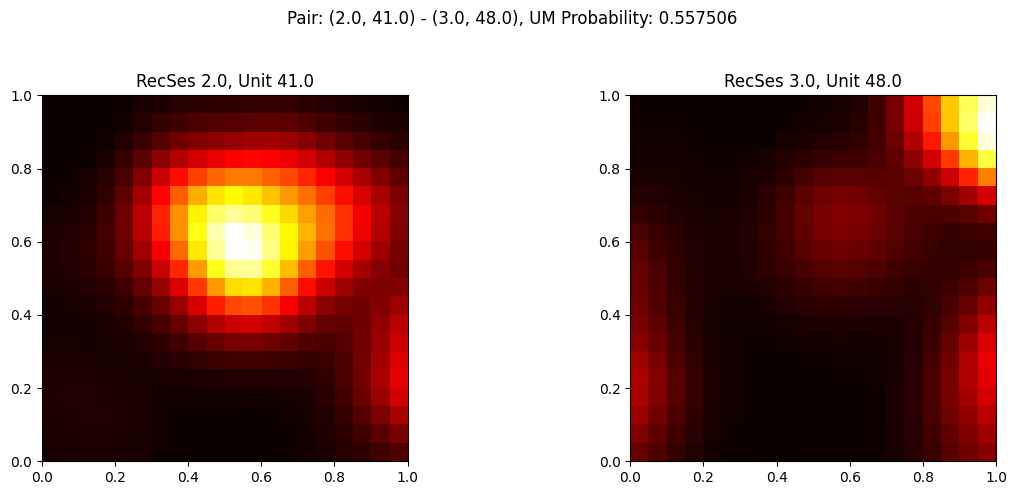

所有匹配对的 place cell 图已生成！


In [13]:
# 数据映射
session_data = {
    1: npdata1,
    2: npdata2,
    3: npdata3
}
for index, row in result_df.iterrows():
    id1, id2 = row['ID1'], row['ID2']
    rec_ses1, rec_ses2 = row['RecSes 1'], row['RecSes 2']
    prob = row['UM Probabilities']
    
    # 获取对应的数据集
    data1 = session_data[rec_ses1]
    data2 = session_data[rec_ses2]
    
    # 创建子图：一行两列
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 绘制第一个 place cell (RecSes 1, ID1)
    #plt.sca(ax1)
    plot_place_cells(data1, unit_num=id1,ax=ax1)
    ax1.set_title(f'RecSes {rec_ses1}, Unit {id1}')
    
    # 绘制第二个 place cell (RecSes 2, ID2)
    #plt.sca(ax2)
    plot_place_cells(data2, unit_num=id2,ax=ax2)
    ax2.set_title(f'RecSes {rec_ses2}, Unit {id2}')
    
    # 添加总标题
    fig.suptitle(f'Pair: ({rec_ses1}, {id1}) - ({rec_ses2}, {id2}), UM Probability: {prob:.6f}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # 显示图像
    plt.show()

print("所有匹配对的 place cell 图已生成！")